## Init

In [5]:
import pickle
with open('GRACE_data_release.pickle', 'rb') as handle:
    D = pickle.load(handle)

In [6]:
#method_dict

method_dict={

"randomk_mem_ratio=0.01": "Randk(0.01)", 
"randomk_mem_ratio=0.1": "Randk(0.1)", 
"randomk_mem_ratio=0.25": "Randk(0.25)", 
"randomk_mem_ratio=0.5": "Randk(0.5)", 

"topk_mem_ratio=0.01": "TopK(0.01)", 
"topk_mem_ratio=0.1": "TopK(0.1)", 
"topk_mem_ratio=0.25": "TopK(0.25)", 
"topk_mem_ratio=0.5": "TopK(0.5)", 
    
"threshold_mem_thres=1e-05": "Thresh(1e-5)", 
"threshold_mem_thres=0.0001": "Thresh(1e-4)", 
"threshold_mem_thres=0.001": "Thresh(1e-3)", 
"threshold_mem_thres=0.01": "Thresh(0.01)", 
    
"dgc_mem_ratio=0.01":"DGC(0.01)", 
"dgc_mem_ratio=0.1":"DGC(0.1)", 
"dgc_mem_ratio=0.25":"DGC(0.25)", 
"dgc_mem_ratio=0.5":"DGC(0.5)", 
    
"adaq_mem_ratio=0.01":"Adaptive(0.01)", 
"adaq_mem_ratio=0.1":"Adaptive(0.1)", 
"adaq_mem_ratio=0.25":"Adaptive(0.25)", 
"adaq_mem_ratio=0.5":"Adaptive(0.5)", 
    
"randomk_ratio=0.01": "Randk(0.01)", 
"randomk_ratio=0.1": "Randk(0.1)", 
"randomk_ratio=0.25": "Randk(0.25)", 
"randomk_ratio=0.5": "Randk(0.5)", 
    
"topk_ratio=0.01": "TopK(0.01)", 
"topk_ratio=0.1": "TopK(0.1)", 
"topk_ratio=0.25": "TopK(0.25)", 
"topk_ratio=0.5": "TopK(0.5)",

"threshold_thres=1e-05": "Thresh(1e-5)",
"threshold_thres=0.0001": "Thresh(1e-4)", 
"threshold_thres=0.001": "Thresh(1e-3)", 
"threshold_thres=0.01": "Thresh(0.01)", 
    

"adaq_ratio=0.01":"Adaptive(0.01)", 
"adaq_ratio=0.1":"Adaptive(0.1)", 
"adaq_ratio=0.25":"Adaptive(0.25)", 
"adaq_ratio=0.5":"Adaptive(0.5)", 
    
"terngrad": "TernGrad", 
"terngrad_mem": "TernGrad", 

"qsgd_mem_q=64": "QSGD(64)", 
"qsgd_mem_q=128": "QSGD(128)", 
"qsgd_mem_q=256": "QSGD(256)", 
"qsgd_q=64": "QSGD(64)", 
"qsgd_q=128": "QSGD(128)", 
"qsgd_q=256": "QSGD(256)", 
"sketch_mem_q=64": "SketchML(64)",
"sketch_mem_q=128": "SketchML(128)", 
"sketch_mem_q=256": "SketchML(256)", 
"sketch_q=64": "SketchML(64)",
"sketch_q=128": "SketchML(128)", 
"sketch_q=256": "SketchML(256)",  
"signsgd": "SignSGD", 
"signsgd_mem": "SignSGD", 
"signum": "SIGNUM", 
"signum_mem": "SIGNUM",

"efsignsgd_mem":"EFsignSGD", 

"onebit_mem": "1-bit SGD", 
"8bit":"8-bit", 
"8bit_mem":"8-bit", 
"natural":"Natural", 
"natural_mem":"Natural", 
"powersgd_mem": "PowerSGD", 
"none":"Baseline", 
"none-sgd":"Baseline(sgd)",
"none-momentum":"Baseline",
"fp16":"fp16",
"inceptionn":"INCEPTIONN",
"inceptionn_mem":"INCEPTIONN",
}


default_color = []
color_dict = {}
for i in range(10):
    default_color.append("C%s" % str(i))

for i,name in enumerate(method_dict.keys()):
    color_dict[name]= default_color[i%10]
color_dict['none']= 'C9'
color_dict['none-momentum']= 'C9'
color_dict['none-sgd']= 'b'

topk_mem={
"topk_mem_ratio=0.01": "TopK-EC(0.01)", 
"topk_mem_ratio=0.1": "TopK-EC(0.1)", 
"topk_mem_ratio=0.25": "TopK-EC(0.25)", 
"topk_mem_ratio=0.5": "TopK-EC(0.5)", 
}

topk = {
"topk_ratio=0.01": "TopK(0.01)", 
"topk_ratio=0.1": "TopK(0.1)", 
"topk_ratio=0.25": "TopK(0.25)", 
"topk_ratio=0.5": "TopK(0.5)",
}
for i,j in zip(topk.keys(),topk_mem.keys()):
    color_dict[i] = color_dict[j]



In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

show_legend = True
FONT_SIZE = 25

def row_filter(df,cond):
    conds = [df[k] == v for k,v in cond.items()]
    c = conds[0]
    for x in conds:
        c = c & x
    return df[c]

def make_plot(df, x_axis, y_axis, save_fig = False,legend_col=4,filename_suffix='',cancel_insert=False,legend_only = False):
    global show_legend
    save_fig = True
    legend_dict = {'throughput':'Throughput', 
                   'runtime':'Runtime', 
                   'data_volume': 'Data Volume',
                   'top_1_accuracy': 'Top-1 accuracy',
                   'top_5_accuracy': 'Top-5 accuracy',
                   'best_hit_rate':'Best Hit Rate',
                   'test_perplexity': 'Test Perplexity',
                   'validation_perplexity': 'Validation Perplexity',
                    'IoU_Metrics/iou_score_ths_0.05': 'IoU (threshold=0.05)',
                    'IoU_Metrics/iou_score_ths_0.125': 'IoU (threshold=0.125)',
                    'IoU_Metrics/iou_score_ths_0.25':'IoU (threshold=0.25)',
                    'IoU_Metrics/iou_score_ths_0.5': 'IoU (threshold=0.5)',
                    'IoU_Metrics/iou_score_ths_0.75':'IoU (threshold=0.75)',
                    'IoU_Metrics/iou_score_ths_0.85': 'IoU (threshold=0.85)',
                    'IoU_Metrics/iou_score_ths_0.95':'IoU (threshold=0.95)',
                    'IoU_Metrics/iou_score_ths_0.99':'IoU (threshold=0.99)',
                  }
    fig, ax = plt.subplots(figsize=(15, 10))

#     methods = list(df['method'].unique())
#     mm = {}
#     for x in enumerate(plt.Line2D.markers):
#         m = methods.pop()
#         mm[m] = x[1]
#         if len(methods) == 0:
#             break

#     none_tput = 0.5

    # the df entry order affects the legend order and scatter connect order
    methods = ["randomk" ,"topk" ,"dgc" ,"adaq" ,"threshold" ,"terngrad" ,"qsgd","natural","sketch","8bit","signsgd" ,"efsignsgd" ,"signum" ,"onebit" ,"powersgd","none" ,"fp16", "inceptionn"]
    df.method = df.method.astype("category")
    df.method.cat.set_categories(methods, inplace=True)
    
    df.name = df.name.astype("category")
    df.name.cat.set_categories(method_dict.keys(), inplace=True)
    df = df.sort_values(by=['method','name'])
    
    mm={'sketch': '.', 'natural': 'x', '8bit': 'd', 'powersgd': 'v', 'onebit': '^', 'signum': '<', 
        'efsignsgd': '>', 'signsgd': 'P', 'adaq': 'p', 'dgc': '3', 'qsgd': '+', 'terngrad': '8', 
        'threshold': 's', 'topk': 'X', 'randomk': '*', 'fp16': 'h', 'none': 'H', 'inceptionn': 'D'}
    
    
    for index, row in df.iterrows():
        if row['method'] == 'none':
            none_tput = row[x_axis]
#             ax.axvline(x=1, linestyle='--', color='red', label='Baseline', linewidth=1.7) #legend_dict[x_axis]
            break
    
    #set a threshold for accuracy to drop some entries
    # ["cifar10-classification", "imagenet-classification", "ml-20m-recommendation",
#            "PTB-language_modeling", "DAGM2007-segmentation", "cifar10-classification-pytorch"]
    def drop(row):
        do = False
        if row['name'] in ['fp16','qsgd_mem_q=128','qsgd_q=128','sketch_mem_q=128','sketch_q=128',]:
            do = True
        if project == "imagenet-classification" and MODEL=='resnet50' and y_axis=='top_1_accuracy':
            if row[y_axis] < 0.55:
                do =  True
            elif row['method'] in ['topk','threshold','randomk','adaq','sketch','8bit','natural'] and row['memory']=='false':
                do =  True
            elif row['method'] in ['signsgd','signum','qsgd','terngrad','inceptionn'] and row['memory']=='true':
                do =  True
            elif row['name'] in ['threshold_thres=0.0001', 'threshold_mem_thres=0.0001']:
                do = True
           
        elif project == "cifar10-classification" and y_axis=='top_1_accuracy':
            if row[y_axis] < 0.8:
                do =  True
            if row['method'] in ['topk','threshold','randomk','adaq','sketch','8bit','natural'] and row['memory']=='false':
                do =  True
            elif row['method'] in ['signsgd','signum','qsgd','terngrad','inceptionn'] and row['memory']=='true':
                do =  True
            elif row['name'] in ['threshold_mem_thres=0.0001', 'threshold_mem_thres=1e-05']:
                do = True
                
        elif project == "PTB-language_modeling" and MODEL=='LSTM' and y_axis=='test_perplexity':
            if row[y_axis] > 120:
                do = True
                
        elif project == "ml-20m-recommendation" and MODEL=='ncf' and y_axis=='best_hit_rate':
            if row[y_axis] < 0.8:
                do = True
            elif row['method'] in ['threshold','randomk','adaq','sketch','8bit','natural'] and row['memory']=='false':
                do = True
            elif row['method'] in ['signsgd','signum','qsgd','terngrad',] and row['memory']=='true':
                do = True
            elif row['name'] in ['threshold_mem_thres=1e-05', 'threshold_thres=1e-05']:
                do = True
                
        elif project == "DAGM2007-segmentation":
            if row[y_axis] < 0.8:
                do = True
        elif project == "cifar10-classification-pytorch":
            if row[y_axis] < 0.6:
                do = True
                
        return do
    
    #plot scatter
    print("df_shape:", df.shape)
    for index, row in df.iterrows():
        if drop(row):
            df.drop(index, inplace=True)
#             print(row['name']," is dropped")
            continue        
        if row['name']=='none' and row['dataset'] in ['cifar10','imagenet']: 
            label = method_dict[f"{row['name']}-{row['optimizer']}"]
            color = color_dict[f"{row['name']}-{row['optimizer']}"]
        else:
            label = method_dict[row['name']]
            color = color_dict[row['name']]
        
        ax.scatter(x=row[x_axis]/none_tput, y=row[y_axis], 
                   label = label, marker=mm[row['method']],alpha=0.75, s=500, c=color)

    print("num of plots:", df.shape[0])    
#     print(df['name'])    
    #plot zoom up
    def plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=2.5, loc='lower left',grid=True,y_loc='right', x_loc='top'):
        from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
        from matplotlib.ticker import FormatStrFormatter
        axins = zoomed_inset_axes(ax, zoom_factor, loc=loc) # zoom-factor: 2.5, location: upper-left default: best
        for index, row in df.iterrows():       
            if row['name']=='none' and row['dataset'] in ['cifar10','imagenet']: 
                color = color_dict[f"{row['name']}-{row['optimizer']}"]
            else:
                color = color_dict[row['name']]
            axins.scatter(x=row[x_axis]/none_tput, y=row[y_axis], marker=mm[row['method']],alpha=0.75, s=1100, c=color)
        axins.set_xlim(x1, x2) # apply the x-limits
        axins.set_ylim(y1, y2) # apply the y-limits
        axins.grid(False)
        if y_loc == 'right':
            axins.tick_params(axis="y",direction="in",left=False,right=True,labelleft=False, labelright=True, labelsize= FONT_SIZE - 5)
        else:
            axins.tick_params(axis="y",direction="in",left=True,right=False,labelleft=True, labelright=False, labelsize= FONT_SIZE - 5)
        if x_loc == 'top':
            axins.tick_params(axis="x",direction="in",bottom=False,top=True,labelbottom=False, labeltop=True, labelsize= FONT_SIZE - 5)
        else:
            axins.tick_params(axis="x",direction="in",bottom=True,top=False,labelbottom=True, labeltop=False, labelsize= FONT_SIZE - 5)
        axins.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if MODEL == 'LSTM':
            axins.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        else:
            axins.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        axins.xaxis.set_major_locator(plt.MaxNLocator(2))
        axins.yaxis.set_major_locator(plt.MaxNLocator(2))
#         plt.xticks([], [])
#         plt.yticks([], [])
        return axins

    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    if project == "PTB-language_modeling":
        if x_axis == 'throughput': 
            x1, x2, y1, y2 = 0.25, 0.7, 98.1, 100.9 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=2, loc='lower right', y_loc='left')
            mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.3",lw=2)
            axins.set_ylim(axins.get_ylim()[::-1])
        elif x_axis == 'data_volume':
            x1, x2, y1, y2 = 0.001, 0.21, 98.1, 100.9 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=2, loc='lower right', y_loc='left')
            mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.3", lw=2)
            axins.set_ylim(axins.get_ylim()[::-1])
        ax.set_ylim(ax.get_ylim()[::-1])
                                   
    elif MODEL == "resnet20_v2":
        if x_axis == 'throughput': 
            x1, x2, y1, y2 = 0.42, 0.5, 0.905, 0.913 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2,zoom_factor=4,)
            mark_inset(ax, axins, loc1=2, loc2=2,fc="none", ec="0.3",lw=2)
        elif x_axis == 'data_volume':
            x1, x2, y1, y2 = 0.18, 0.28, 0.905, 0.916 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=3.5, loc='lower center')
            mark_inset(ax, axins, loc1=3, loc2=3, fc="none", ec="0.3", lw=2)
#             x1, x2, y1, y2 = 0.001, 0.03, 0.905, 0.9085 # specify the limits
#             axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=8, loc='lower left',grid=False)
#             mark_inset(ax, axins, loc1=2, loc2=2,fc="none", ec="0.3",lw=2)
#             x1, x2, y1, y2 = 0.481, 0.519, 0.9082, 0.9123 # specify the limits
#             axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=7, loc='lower right', y_loc='left')
#             mark_inset(ax, axins, loc1=1, loc2=1,fc="none", ec="0.3",lw=2)
                                   
    elif MODEL == "densenet40_k12":
        if x_axis == 'throughput': 
            x1, x2, y1, y2 = 0.4, 0.53, 0.912, 0.926 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2,zoom_factor=3.5, loc='center',x_loc='bottom',y_loc='left')
            mark_inset(ax, axins, loc1=2, loc2=2, fc="none", ec="0.3",lw=2)
        elif x_axis == 'data_volume':
            x1, x2, y1, y2 = 0.19, 0.29, 0.912, 0.925 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=2.3,loc='lower center')
            mark_inset(ax, axins, loc1=3, loc2=3, fc="none", ec="0.3",lw=2)
#             x1, x2, y1, y2 = 0.481, 0.519, 0.917, 0.920 # specify the limits
#             axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=8, loc='lower right', y_loc='left')
#             mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.3",lw=2)
                               
    elif MODEL == "resnet50" and not cancel_insert:
        if x_axis == 'throughput': 
            x1, x2, y1, y2 = 0.482, 0.549, 0.732, 0.748 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2,zoom_factor=6, loc='lower right',y_loc='left')
            mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.3",lw=2)

        elif x_axis == 'data_volume':
            x1, x2, y1, y2 = 0.475, 0.525, 0.735, 0.75 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=7, loc='lower right', y_loc='left')
            mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.3",lw=2)
                                   
    elif MODEL == "ncf":
        if x_axis == 'throughput': 
            x1, x2, y1, y2 = 0.28, 0.45, 0.94, 0.953 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2,zoom_factor=5.5, loc='upper center',x_loc='bottom')
            mark_inset(ax, axins, loc1=2, loc2=2, fc="none", ec="0.3",lw=2)
        elif x_axis == 'data_volume':
            x1, x2, y1, y2 = -0.01, 0.05, 0.826, 0.84 # specify the limits
            axins = plot_zoom_up(ax, x1, x2, y1, y2, zoom_factor=5, loc='lower right', y_loc='left')
            mark_inset(ax, axins, loc1=3, loc2=3, fc="none", ec="0.3",lw=2)
                                   
    # connect scatter dots with lines                           
    for method in methods:
        if method in ['adaq','qsgd','threshold','sketch','topk'] and x_axis == 'data_volume' and MODEL == "resnet20_v2":
            continue
        if method in ['adaq','qsgd','threshold','sketch','topk'] and x_axis == 'data_volume' and MODEL == "densenet40_k12":
            continue
        if method in ['threshold','sketch','topk','dgc'] and x_axis == 'data_volume' and MODEL == "resnet50":
            continue
        if MODEL == "resnet50" and method in ['sketch','dgc'] and x_axis == 'throughput':
            continue
        if MODEL == "ncf" and x_axis == 'throughput' and method in ['adaq','sketch','dgc']:
            continue
        if MODEL == "ncf" and x_axis == 'data_volume' and method in ['adaq','sketch','dgc', 'randomk',]:
            continue
        if MODEL == "LSTM" and x_axis == 'throughput' and method in ['adaq','sketch','topk','adaq','threshold','dgc']:
            continue
        if MODEL == "LSTM" and x_axis == 'data_volume' and method in ['topk','adaq','threshold','sketch']:
            continue
        if MODEL == "unet" and x_axis == 'throughput' and method in ['qsgd','sketch',]:
            continue
        if MODEL == "unet" and x_axis == 'data_volume' and method in ['qsgd','sketch','dgc','adaq']:
            continue
        for memory in ["true","false"]:
            family = row_filter(df,{'method':method, 'memory':memory})
            ax.plot(family[x_axis]/none_tput,family[y_axis],linestyle='dotted',linewidth=3)
#             axins.plot(family[x_axis]/none_tput,family[y_axis],linestyle='dotted')

    if x_axis == 'throughput':
        ax.set_xlabel('Relative Throughput',fontsize=FONT_SIZE)
    elif x_axis == 'runtime':
        ax.set_xlabel('Relative Runtime',fontsize=FONT_SIZE)
    elif x_axis == 'data_volume':
        ax.set_xlabel('Relative Avg. Data Volume/iteration',fontsize=FONT_SIZE)    
    ax.set_ylabel(legend_dict[y_axis],fontsize=FONT_SIZE)
                                   
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE)
#     ax.yaxis.set_major_locator(plt.MaxNLocator(4))
#     ax.set_ylim(0.6, 1.0)
                                   
#     for tick in axins.xaxis.get_major_ticks():
#         tick.label.set_fontsize(1000)
#     for tick in axins.yaxis.get_major_ticks():
#         tick.label.set_fontsize(1000)
    ax.axvline(x=1, linestyle='--', color='red', label='Baseline', linewidth=1.7)
    handles, labels = ax.get_legend_handles_labels()

    handles2 = handles[1:] + [handles[0]]
    labels2 = labels[1:] + [labels[0]]
#     import operator
#     hl = sorted(zip(handles, labels),
#                 key=operator.itemgetter(1), reverse=True)
#     handles2, labels2 = zip(*hl)

    if show_legend:
        ax.legend(handles2, labels2, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=legend_col, mode="expand", borderaxespad=0, fontsize=16)
    ax.grid(True)
    if save_fig:
        fig.savefig(f"{project}-{MODEL}-scatter-{x_axis}{filename_suffix}.pdf", bbox_inches = 'tight')
        
def scaling_plot(dt, ub, MODEL, y_axis,save_fig=False,bw='10g',filename_suffix='',legend_only = False):
    global show_legend
    save_fig = True
    fig, ax = plt.subplots(figsize=(32, 7)) if legend_only else plt.subplots(figsize=(15, 7))
    legend_dict = {'throughput':'Throughput', 'runtime':'Runtime', 'data_volume': 'Data Volume'}
    color_dict = {1:'tab:gray', 2:'tab:orange', 4:'tab:green', 8:'tab:blue'}
    
    
    dt_2node = row_filter(dt,{'model':MODEL,'bw':bw,'workers':2})
    unique_name = list(dt_2node['name'].unique())
    num_methods = len(unique_name)

    dt2 = row_filter(dt,{'model':MODEL,'bw':bw})
    print("dt2:", dt2.shape, "num_methods",num_methods)
    dt3=dt2[dt2['name'].isin(unique_name)].sort_values(by=['workers','name'])
    throuput_sorter = dt3[dt3['workers']==8].sort_values(by=['throughput']).method
    dt3.method = dt3.method.astype("category")
    dt3.method.cat.set_categories(throuput_sorter, inplace=True)
    dt3=dt3.sort_values(by=['workers','method'])
                                   
    print("dt3:",dt3.shape)
    # custom for each model
    dt0 = row_filter(dt,{'model':MODEL})
    for index, row in dt0.iterrows():
        if row['name']=='none' and row['workers']==1:
            baseline = dt0.at[index,y_axis]
            ax.axhline(y=1, linestyle='--', 
                       color=color_dict[row['workers']], linewidth=2.5, 
                       label='Baseline '+legend_dict[y_axis]+' ('+str(row['workers'])+' node)')

    for index, row in dt3.iterrows():
        if row['name'] == 'none' and row['workers']!=1:
            none_tput = row[y_axis]
            ax.axhline(y=none_tput / baseline, linestyle='--', 
                       color=color_dict[row['workers']], linewidth=2.5, 
                       label='Baseline '+legend_dict[y_axis]+' ('+str(row['workers'])+' nodes)')

    none_index = [index for index, row in dt3.iterrows() if row['method']=='none']
    dt3.drop(none_index, inplace=True)
    print("dt3 remove none:",dt3.shape)
    # set width of bar
    barWidth = 0.25

    # set height of bar
    i = int(dt3.shape[0] / 3)
    bars1 = dt3[0:i][y_axis] / baseline
    bars2 = dt3[i:2*i][y_axis] / baseline
    bars3 = dt3[2*i:3*i][y_axis] / baseline
    #bars4 = dt3[3*i:4*i][y_axis] / baseline
    
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = r1 + barWidth
    r3 = r2 + barWidth
    #r4 = r3 + barWidth

    if y_axis == 'throughput' and ub is not None:
        none_index = [index for index, row in ub.iterrows() if row['method']=='none']
        ub.drop(none_index, inplace=True)
        model = ub['model'] == MODEL
        bw = ub['bw'] == '10g'
        two_node = ub['workers'] == 2
        not_one_node = ub['workers'] != 1
        ub2 = ub[model & bw]
        ub_2node = ub2[two_node]
        print("ub_2node",ub_2node.shape,)
        unique_name = list(ub_2node['name'].unique())
        num_methods = len(unique_name)
        ub3=ub2[ub2['name'].isin(unique_name)].sort_values(by=['workers','name'])
        print("ub_3node",ub3.shape)
        ub3.method = ub3.method.astype("category")
        ub3.method.cat.set_categories(throuput_sorter, inplace=True)
        ub3=ub3.sort_values(by=['workers','method'])
        bars1_ub = ub3[0:i][y_axis] / baseline
        bars2_ub = ub3[i:2*i][y_axis] / baseline
        bars3_ub = ub3[2*i:3*i][y_axis] / baseline
        ax.bar(r1, bars1_ub, color='lightgrey', width=barWidth, edgecolor='white')
        ax.bar(r2, bars2_ub, color='lightgrey', width=barWidth, edgecolor='white')
        ax.bar(r3, bars3_ub, color='lightgrey', width=barWidth, edgecolor='white', label='upper bound')
    # Make the plot
    #ax.bar(r4, bars1, color=color_dict[1], width=barWidth, edgecolor='white', label='1 node')
    ax.bar(r1, bars1, color=color_dict[2], width=barWidth, edgecolor='white', label='2 nodes')
    ax.bar(r2, bars2, color=color_dict[4], width=barWidth, edgecolor='white', label='4 nodes')
    ax.bar(r3, bars3, color=color_dict[8], width=barWidth, edgecolor='white', label='8 nodes')

    # Add xticks on the middle of the group bars
    #plt.ylabel(MODEL+' '+y_axis, fontweight='bold',fontsize=12)
    #plt.xticks(r2, dt3[0:16]['name'],rotation=-80,fontweight='bold',fontsize=12)
    ax.set_ylabel('Relative '+legend_dict[y_axis],fontsize=35)
    ax.set_xticks(r3)
    ax.set_xticklabels([method_dict[x] for x in dt3[0:i]['name']], rotation=35, ha='right')
    ax.tick_params(axis="x",direction="in",bottom=False,top=False,labelbottom=True, labeltop=False,)    
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25)

    # Create legend & Show graphic
    ncol = 8 if legend_only else 4
    if show_legend or legend_only:
        ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=ncol, mode="expand", borderaxespad=0, fontsize=13)
    if save_fig:
        if legend_only:
            fig.savefig(f"legend-bar.pdf", bbox_inches = 'tight')
        else:
            fig.savefig(f"{project}-{MODEL}-{y_axis}-bar_chart{filename_suffix}.pdf", bbox_inches = 'tight')

## Cifar10 Resnet20 & Densenet40

In [8]:
project = "cifar10-classification"
d = D[project]

d.shape, d.columns

((412, 26),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'momentum', 'id', 'run_no', 'job_id', 'step', 'runtime',
        'total_images_per_sec', 'top_1_accuracy', 'top_5_accuracy', 'loss',
        'data_volume', 'throughput'],
       dtype='object'))

### Resnet20

In [9]:
MODEL='resnet20_v2'
#MODEL='densenet40_k12
new_d=row_filter(d,{'model':MODEL,'backend':'mpi'})
#new_d = new_d.rename(columns={"total_images_per_sec": "throughput"}
# now we use local throughput * num_workers as throughput
df=row_filter(new_d,{'mode':'accuracy'})
dv=row_filter(new_d,{'mode':'data-volume'})
dt=row_filter(new_d,{'mode':'throughput'})
ub=row_filter(new_d,{'mode':'upper-bound'})

df.shape,dv.shape,dt.shape, ub.shape,


((64, 26), (35, 26), (70, 26), (51, 26))

In [10]:
new_dt = row_filter(dt,{'bw':'10g','workers':8})
new_dv = row_filter(dv,{'workers':8})
print(new_dt.shape, new_dv.shape)
#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
new_df.shape

(35, 26) (35, 26)


(64, 29)

In [11]:
new_d.sort_values(by=['mode','workers','name']).to_excel(f"{project+'-'+MODEL}.xls")

df_shape: (64, 29)
num of plots: 32
df_shape: (64, 29)
num of plots: 32
dt2: (69, 26) num_methods 17
dt3: (51, 26)
dt3 remove none: (48, 26)
ub_2node (16, 26)
ub_3node (48, 26)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


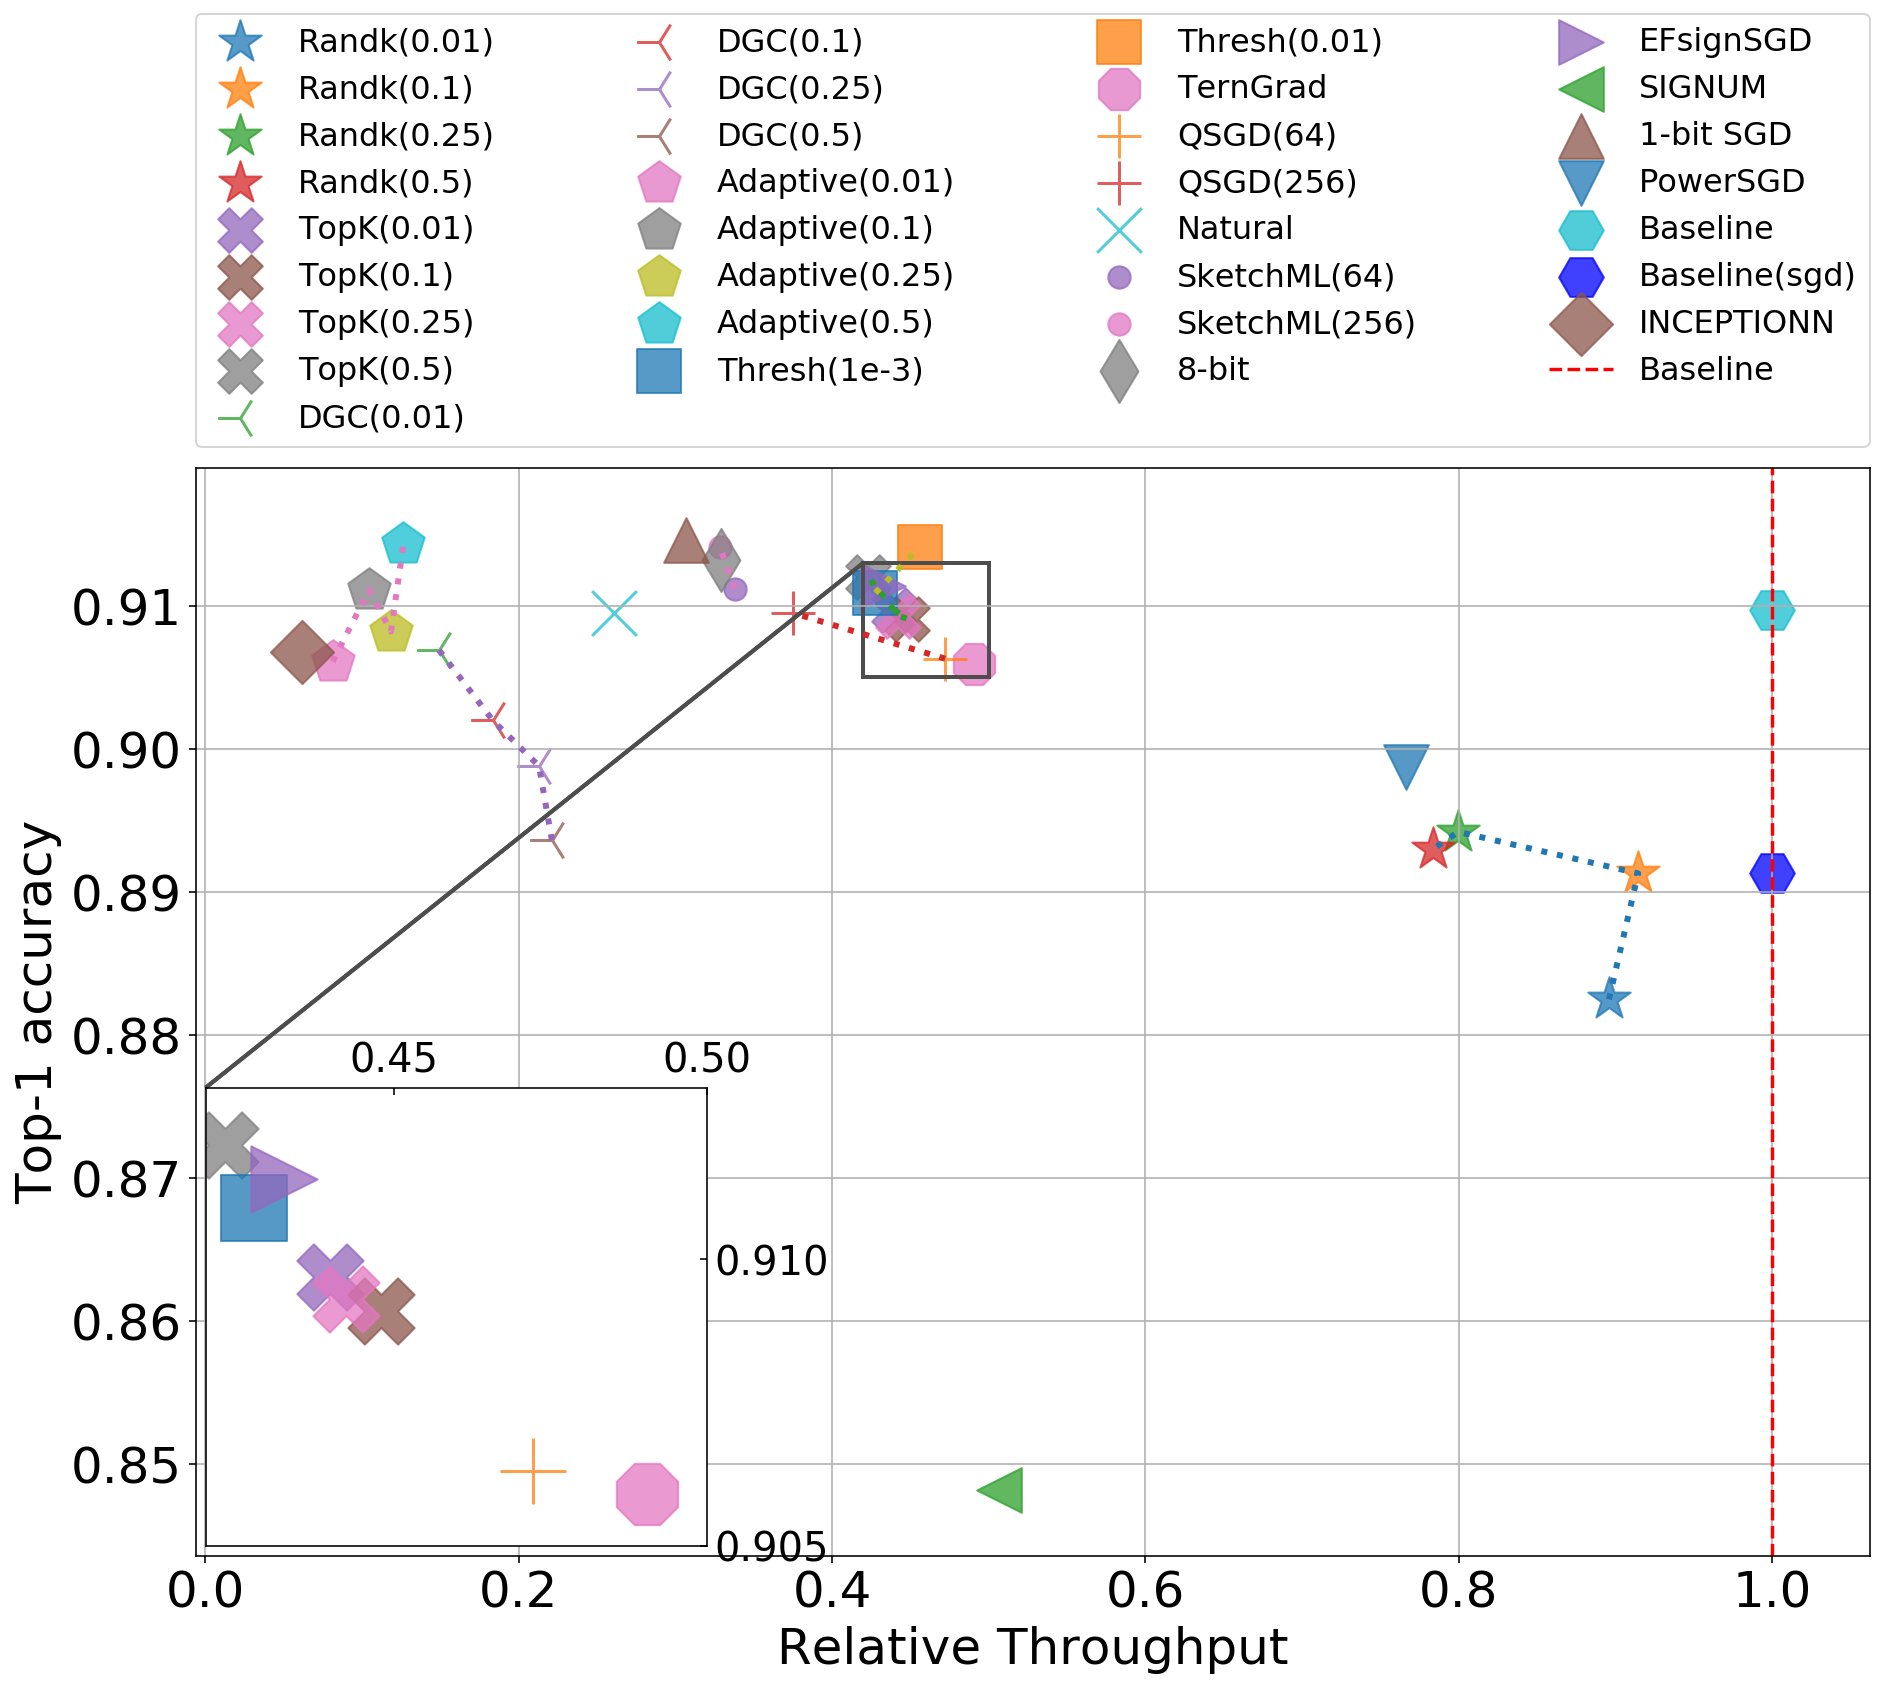

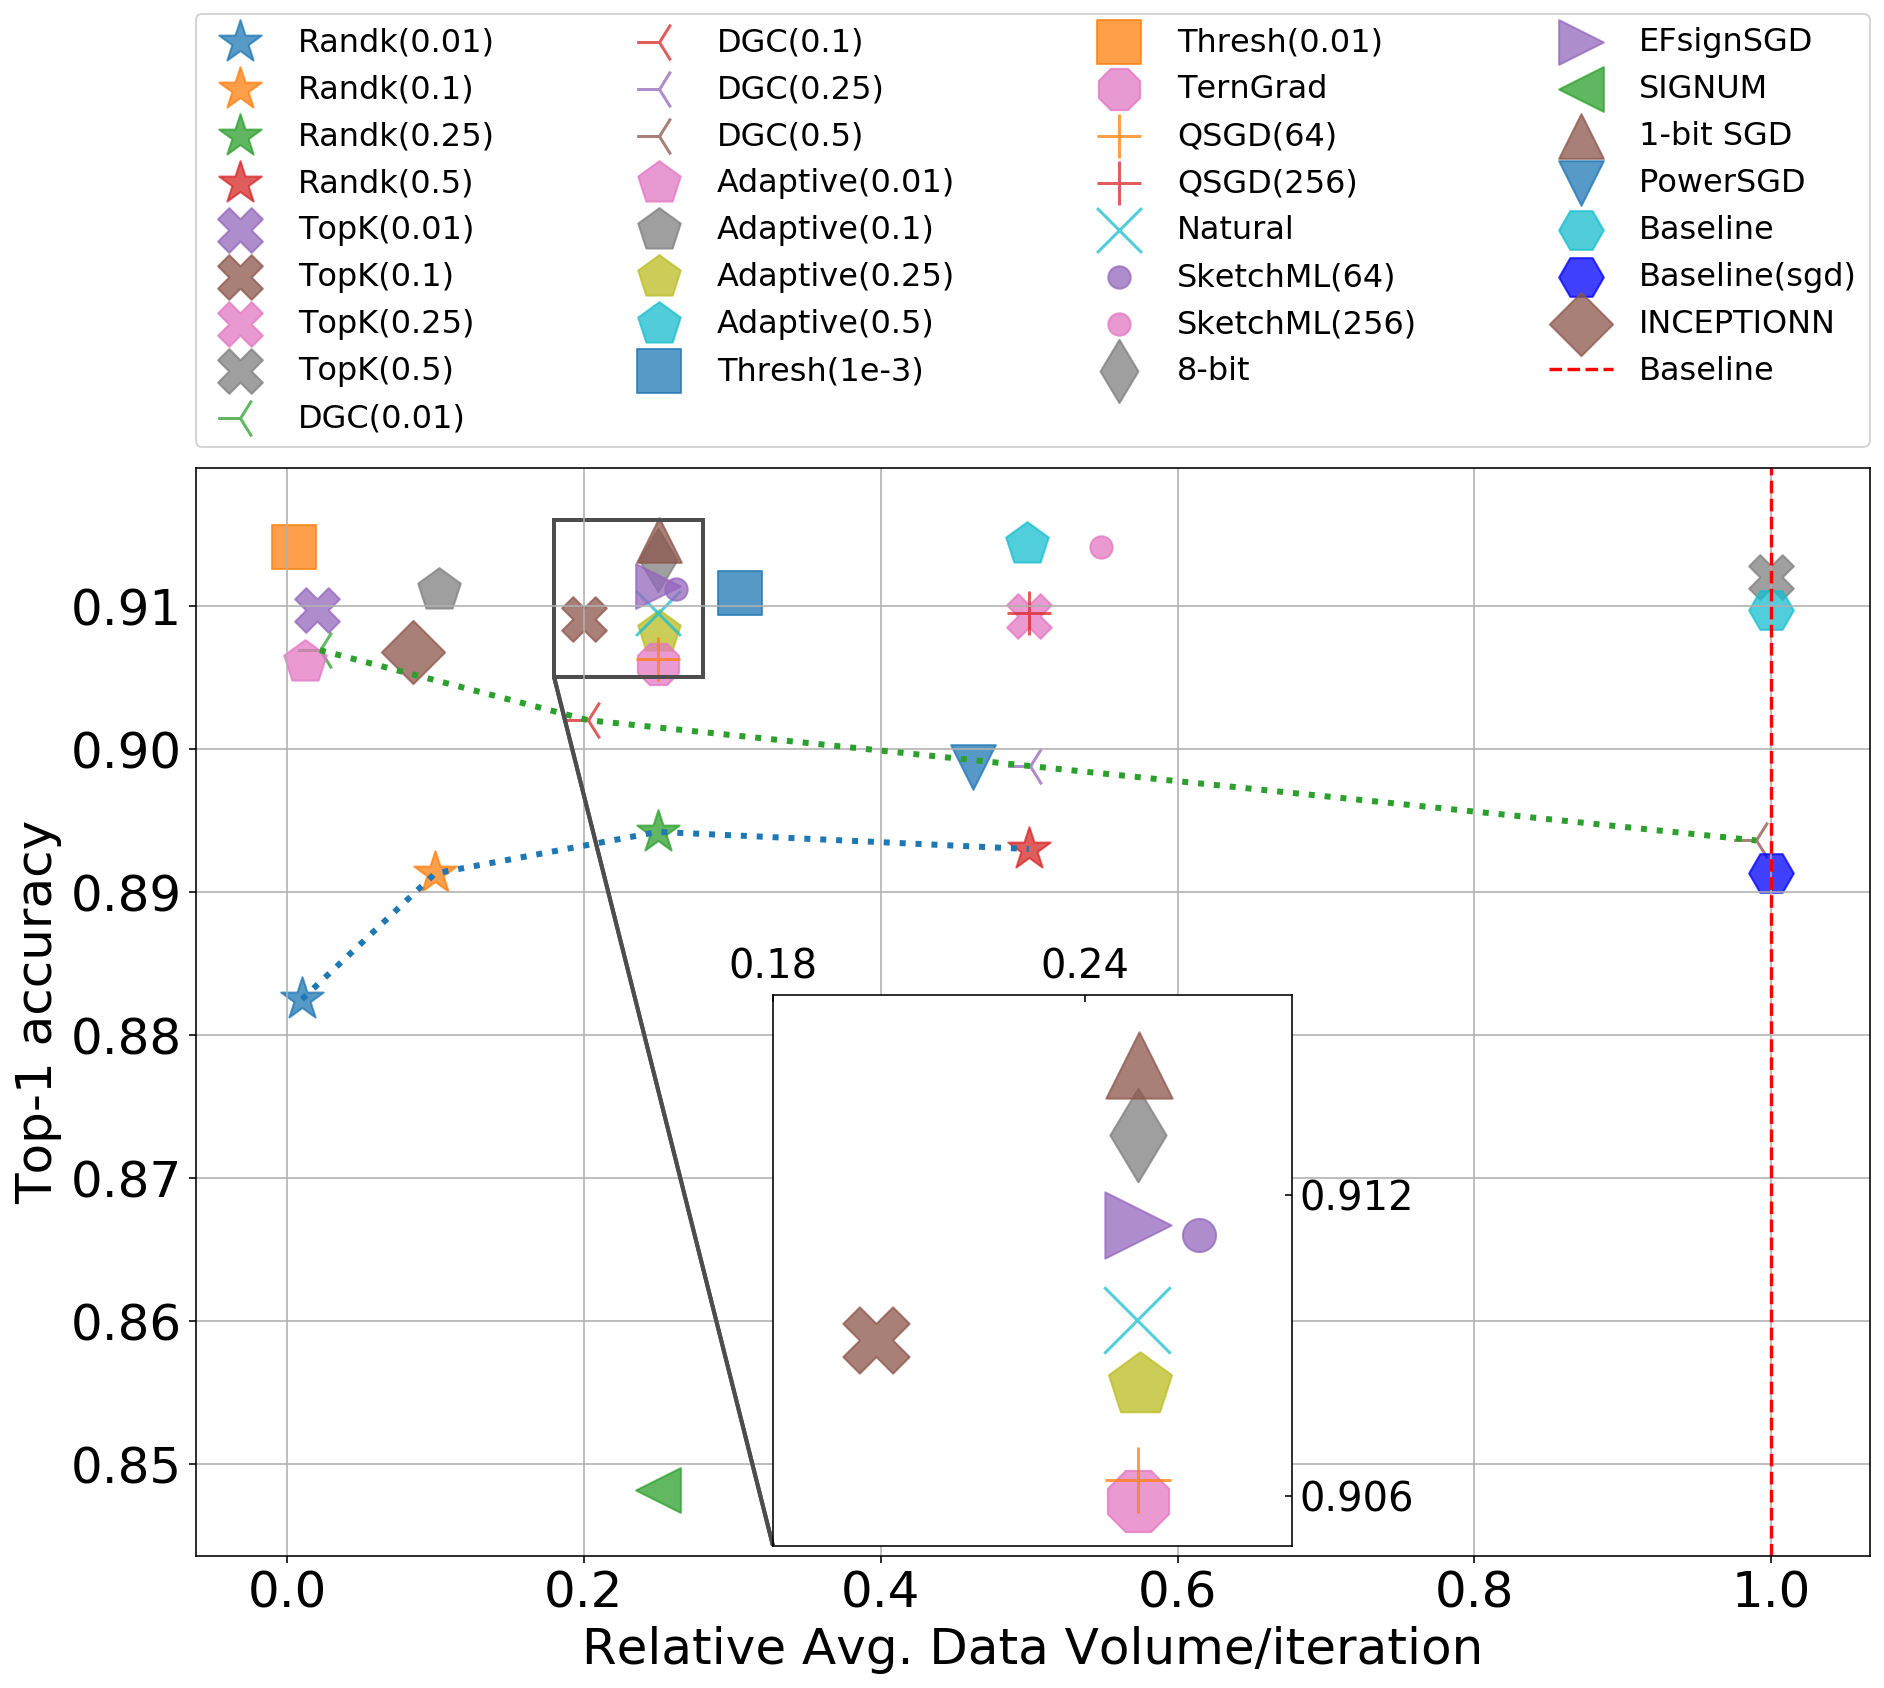

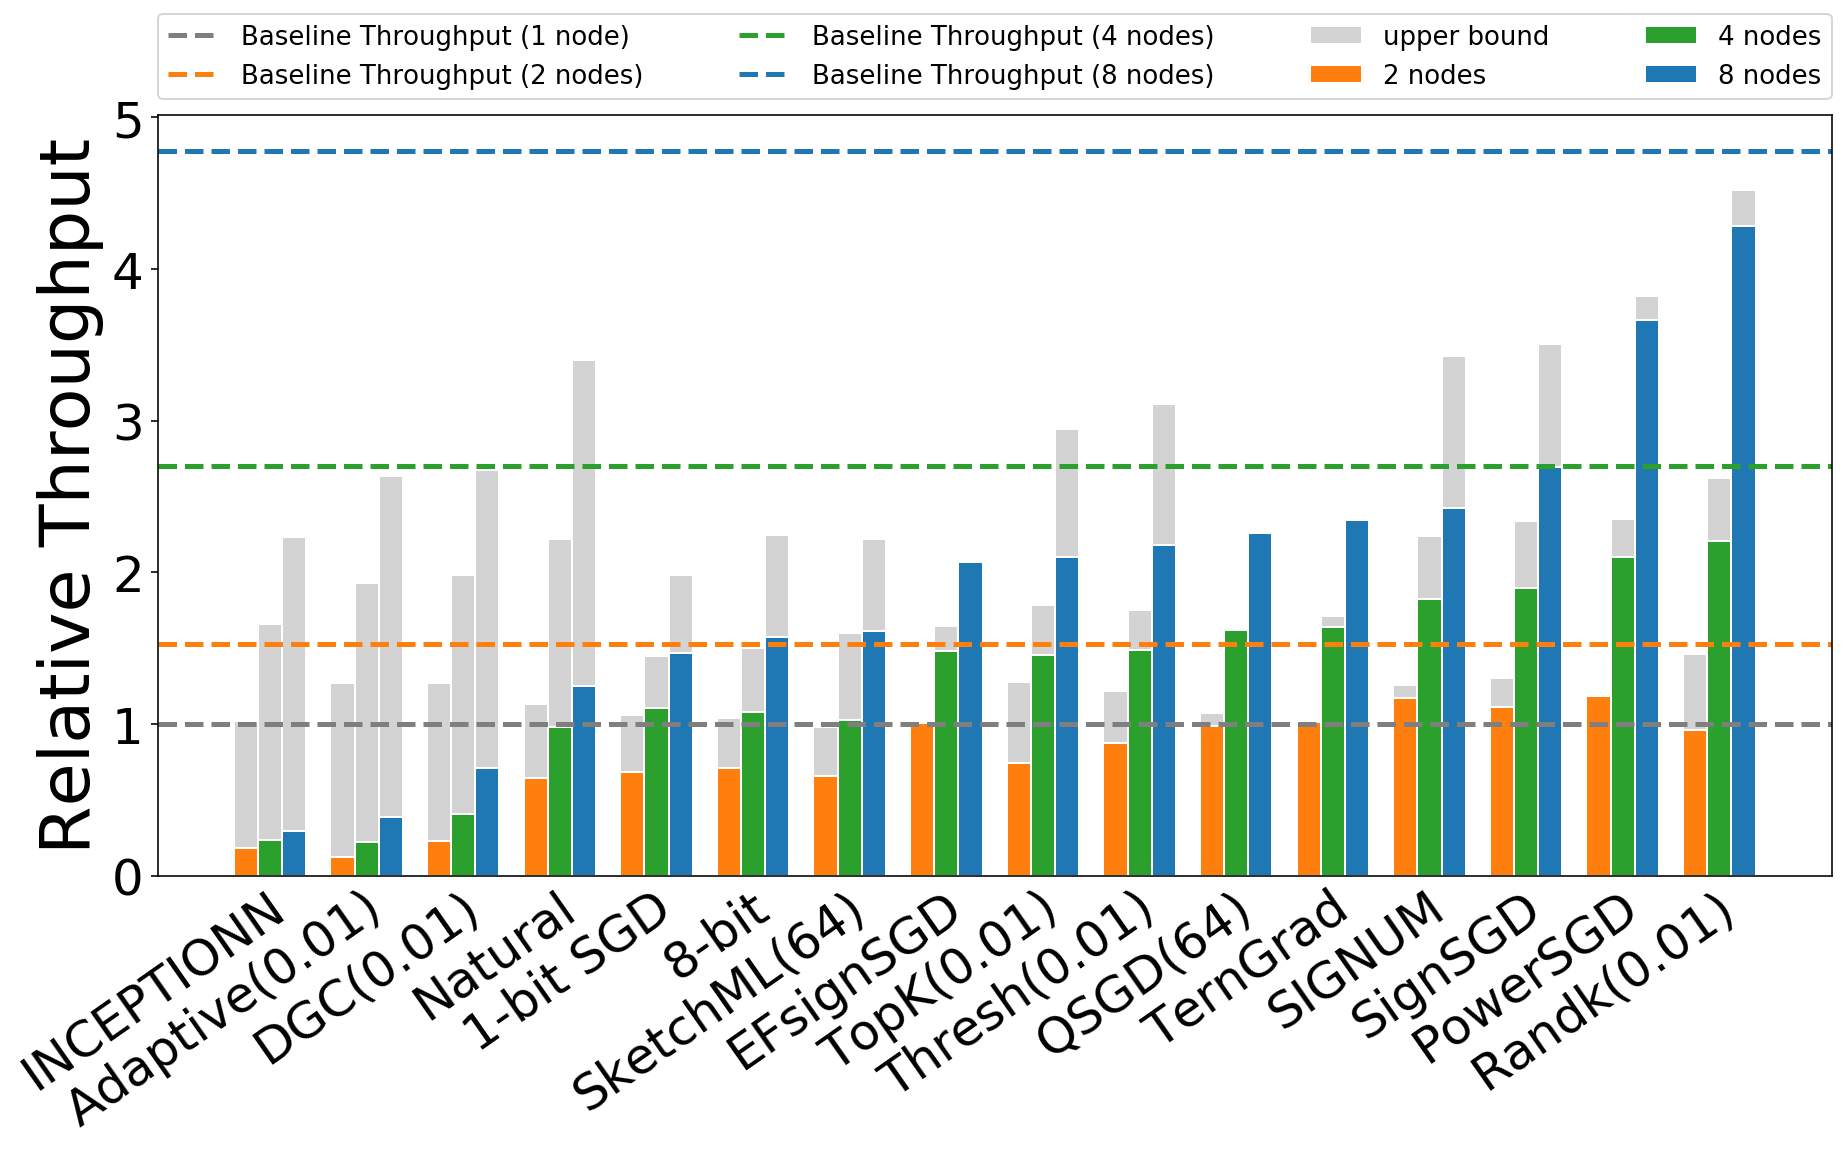

In [12]:
make_plot(new_df, 'throughput', 'top_1_accuracy',save_fig=False)
make_plot(new_df, 'data_volume', 'top_1_accuracy',save_fig=False)
scaling_plot(dt,ub,MODEL,'throughput', save_fig=False)

### Densenet

In [13]:
#MODEL='resnet20_v2'
MODEL='densenet40_k12'
new_d=row_filter(d,{'model':MODEL,'backend':'mpi'})
#new_d = new_d.rename(columns={"total_images_per_sec": "throughput"})
df=row_filter(new_d,{'mode':'accuracy'})
dv=row_filter(new_d,{'mode':'data-volume'})
dt=row_filter(new_d,{'mode':'throughput'})
ub=row_filter(new_d,{'mode':'upper-bound'})

df.shape,dv.shape,dt.shape, ub.shape,

((36, 26), (35, 26), (70, 26), (51, 26))

In [14]:
new_dt = row_filter(dt,{'bw':'10g','workers':8})
new_dv = row_filter(dv,{'workers':8})
print(new_dt.shape, new_dv.shape)
#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
new_df.shape

(35, 26) (35, 26)


(36, 29)

In [15]:
new_d.sort_values(by=['mode','workers','name']).to_excel(f"{project+'-'+MODEL}.xls")

df_shape: (36, 29)
num of plots: 32
df_shape: (36, 29)
num of plots: 32
dt2: (70, 26) num_methods 17
dt3: (52, 26)
dt3 remove none: (48, 26)
ub_2node (16, 26)
ub_3node (48, 26)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


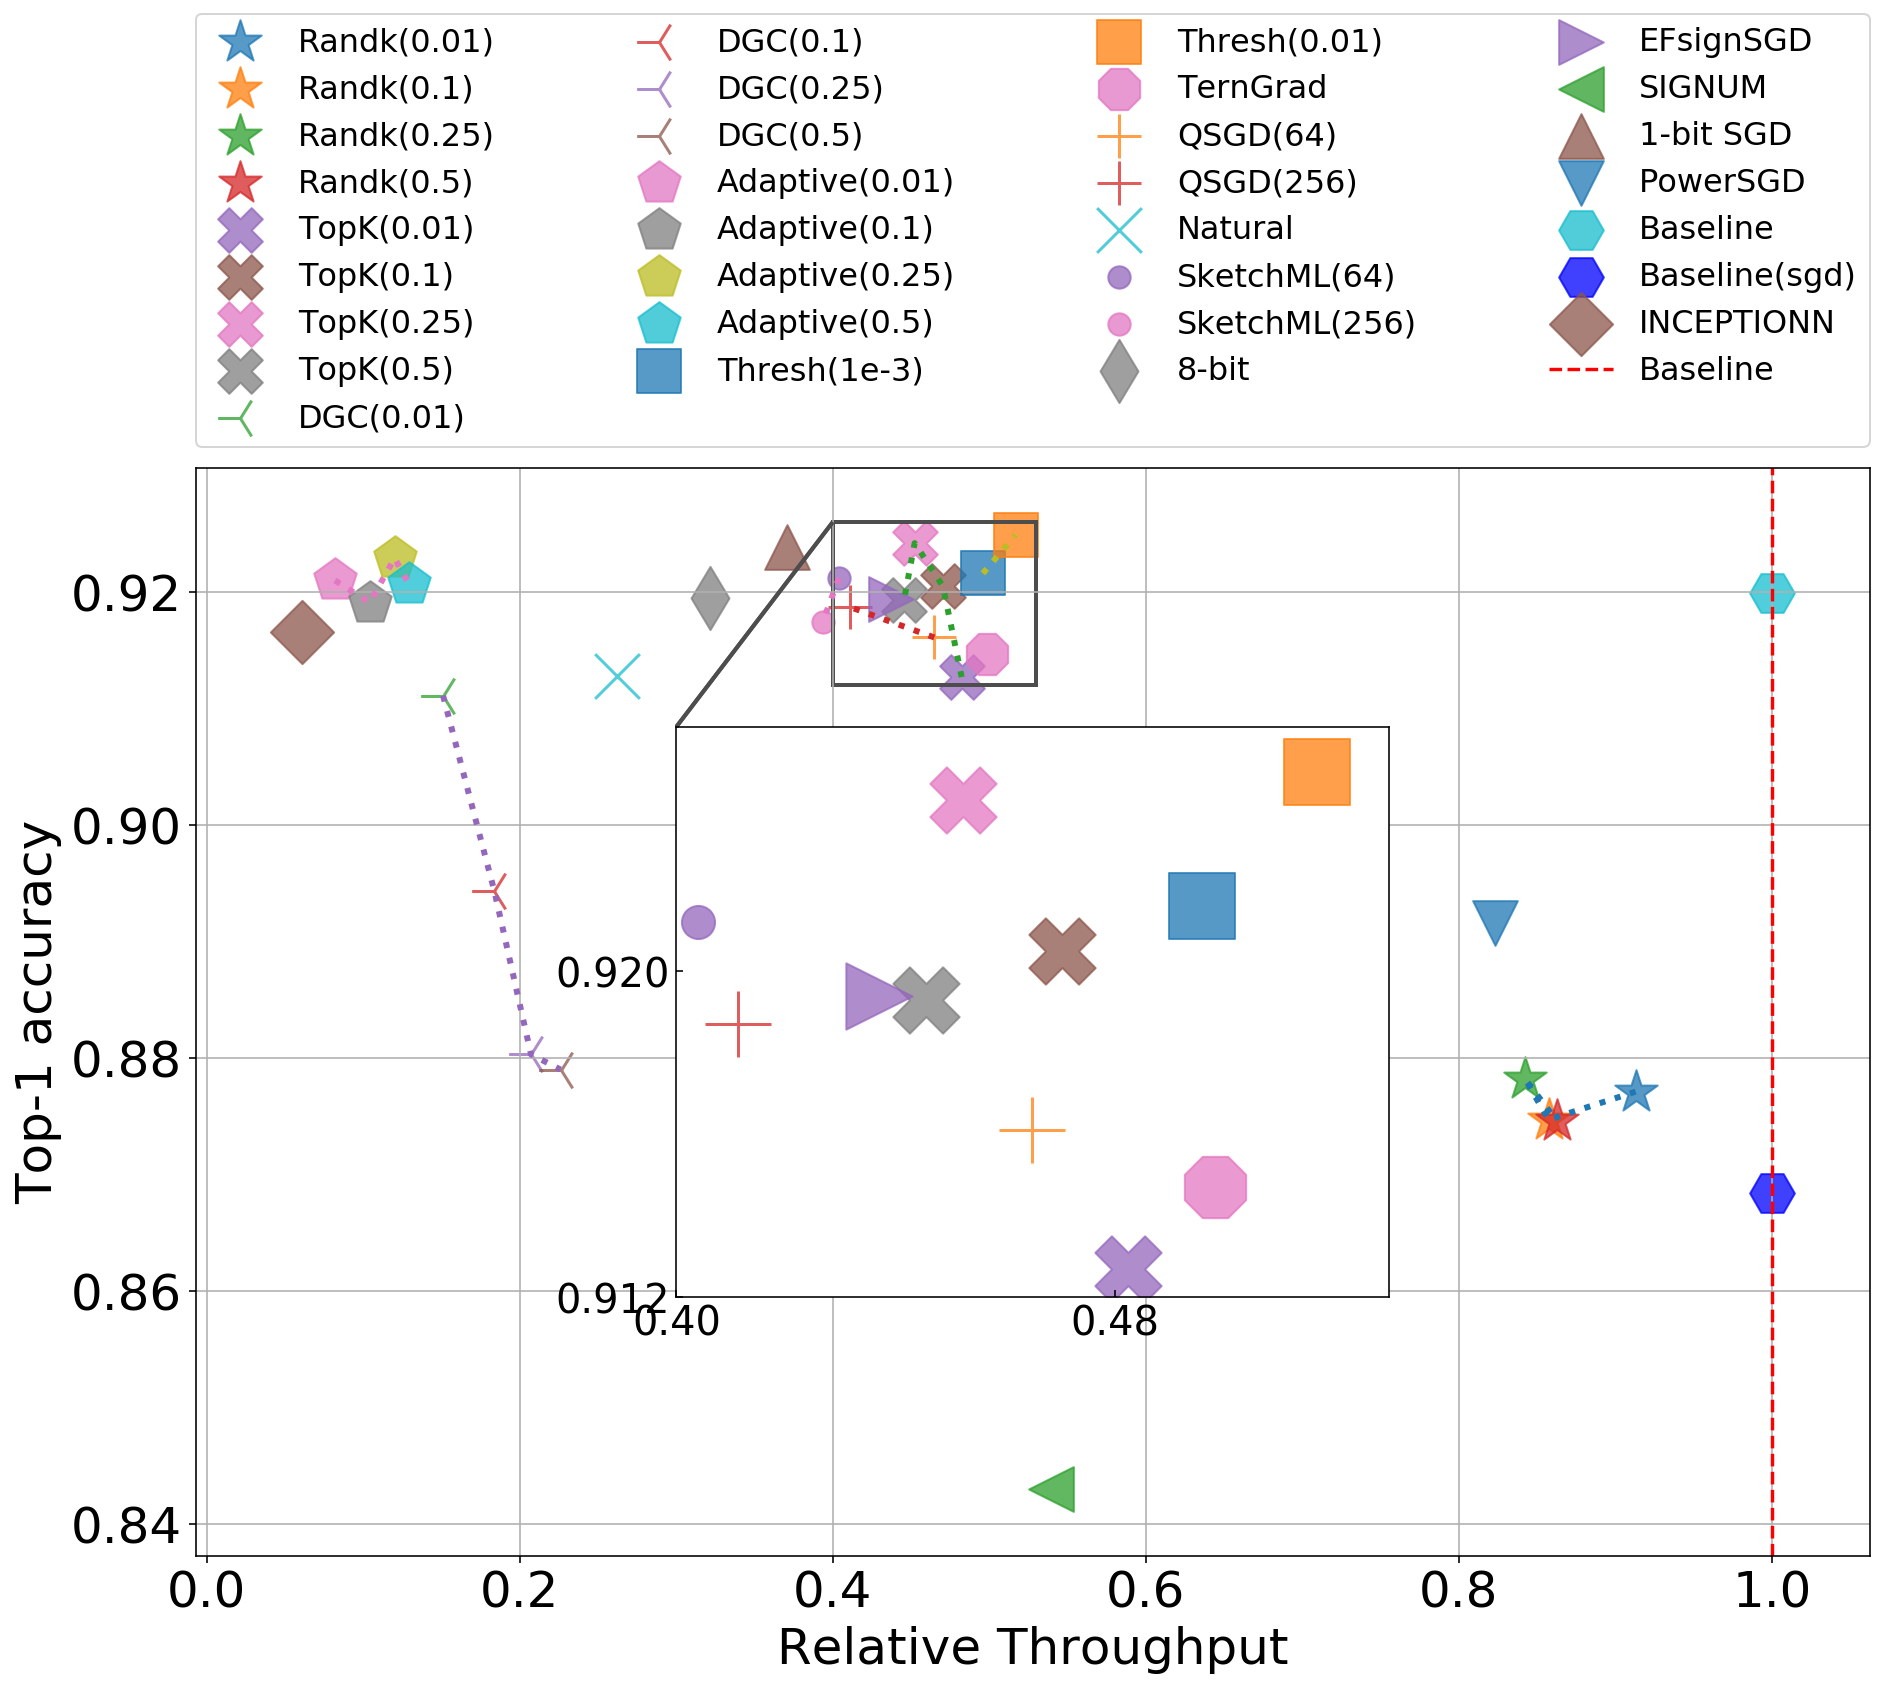

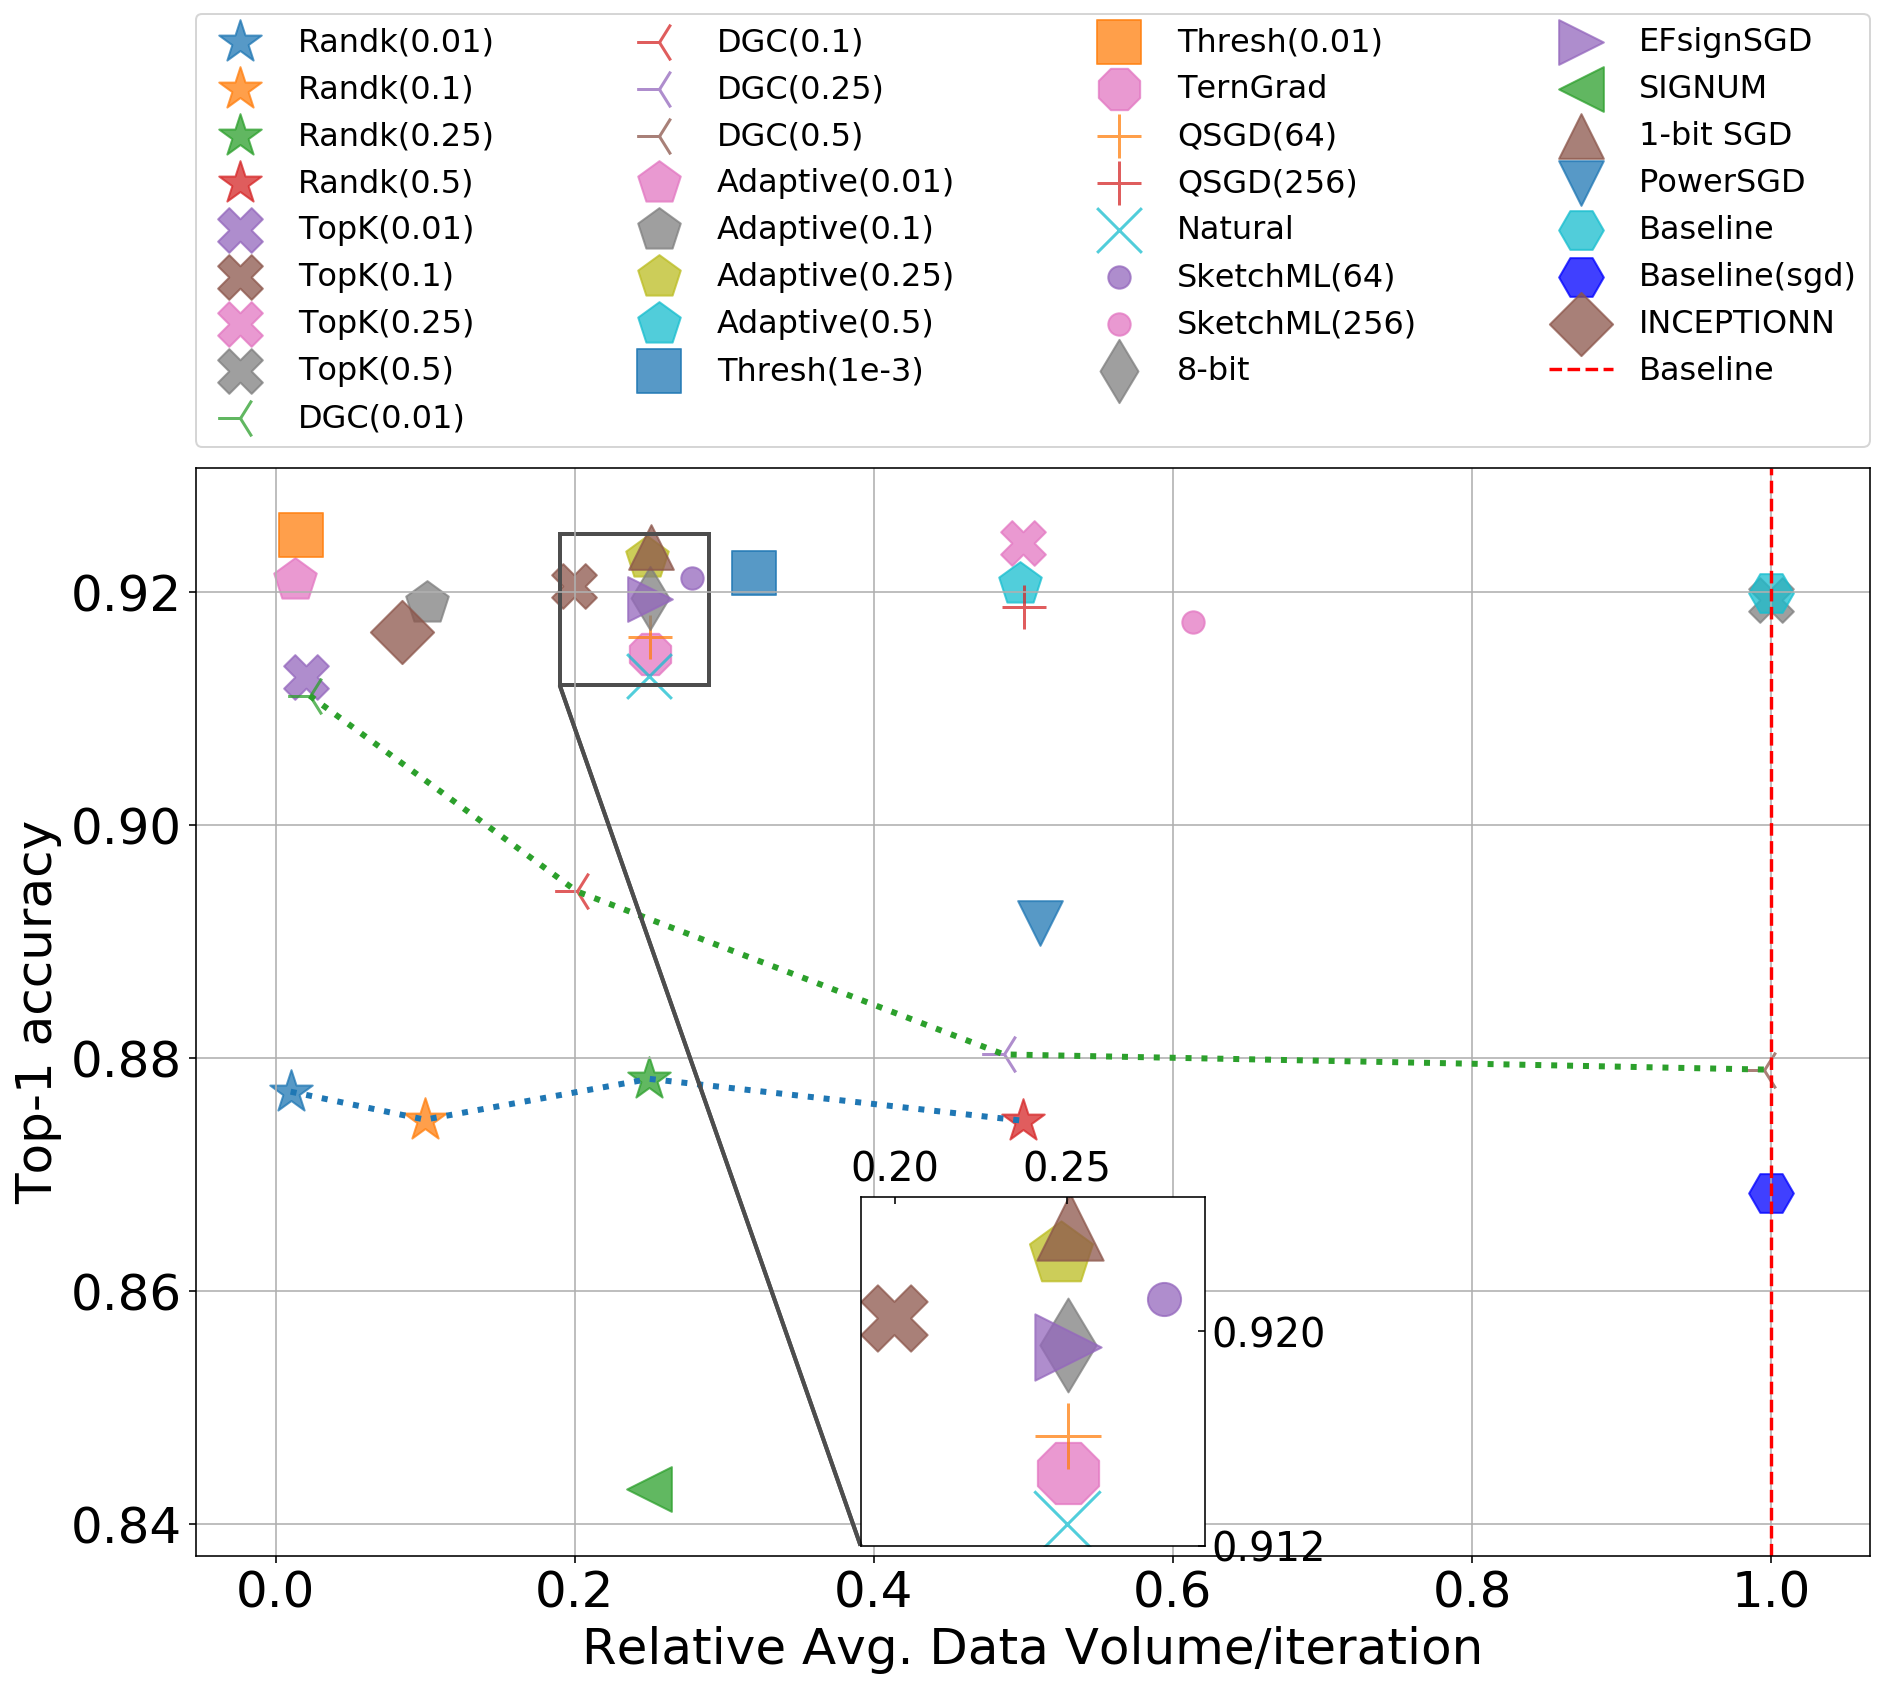

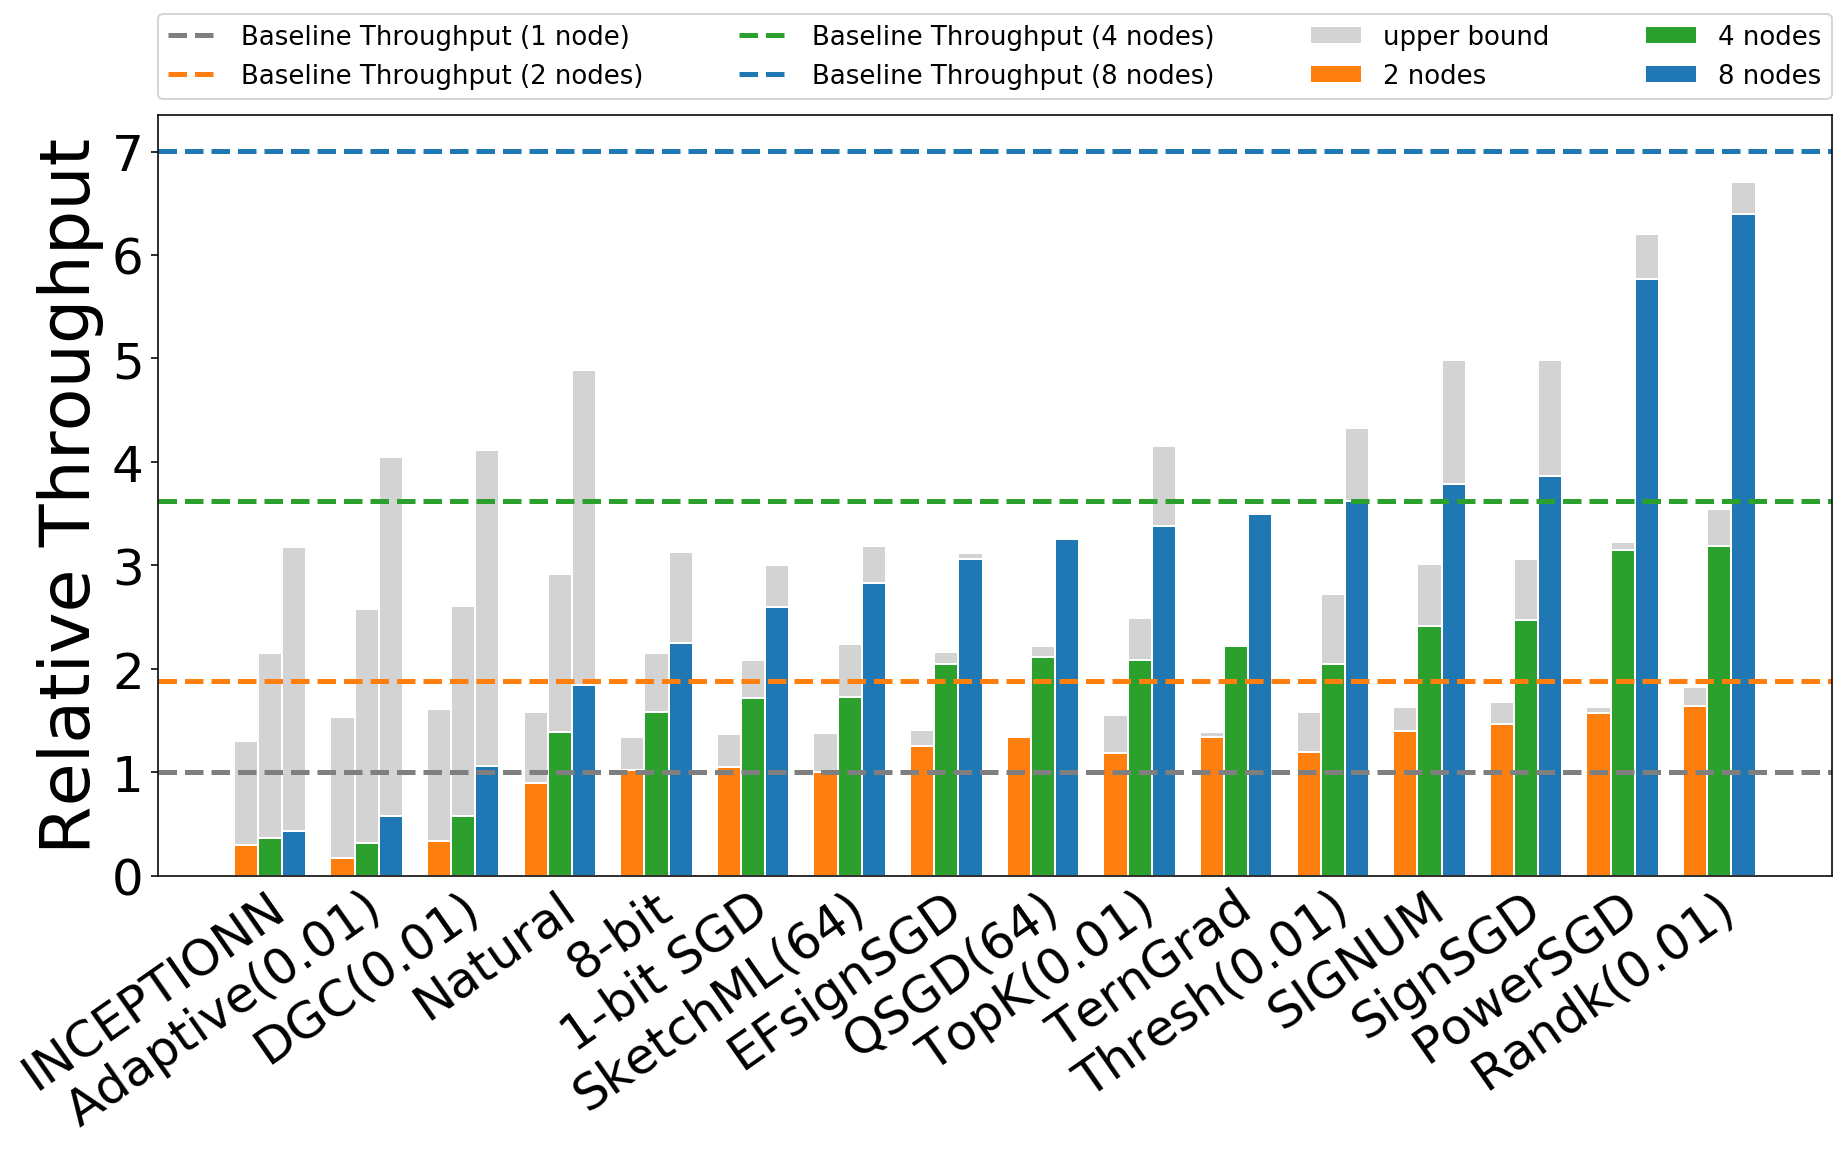

In [16]:
make_plot(new_df, 'throughput', 'top_1_accuracy',save_fig=False)
make_plot(new_df, 'data_volume', 'top_1_accuracy',save_fig=False)
scaling_plot(dt,ub,MODEL,'throughput', save_fig=False)

## ImageNet Resnet50

In [17]:
project = "imagenet-classification"
d = D[project]

d.shape, d.columns

((587, 26),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'momentum', 'id', 'run_no', 'job_id', 'step', 'runtime',
        'total_images_per_sec', 'top_1_accuracy', 'top_5_accuracy', 'loss',
        'data_volume', 'throughput'],
       dtype='object'))

In [18]:
#MODEL='vgg19'
MODEL='resnet50'
new_d=row_filter(d,{'model':MODEL,'backend':'mpi'})
#new_d = new_d.rename(columns={"total_images_per_sec": "throughput"})
df=row_filter(new_d,{'mode':'accuracy'})
dv=row_filter(new_d,{'mode':'data-volume'})
dt=row_filter(new_d,{'mode':'throughput'})
ub=row_filter(new_d,{'mode':'upper-bound'})

df.shape,dv.shape,dt.shape, ub.shape,

((62, 26), (59, 26), (215, 26), (139, 26))

In [19]:
new_dt = row_filter(dt,{'bw':'10g','workers':8})
new_dv = row_filter(dv,{'workers':8})
print(new_dt.shape, new_dv.shape)

#runtime fix for imagenet resnet50
for index, row in new_dt.iterrows():
    if row['name'].startswith('threshold'):
        new_dt.at[index,'runtime'] = row['runtime'] * 90
    elif row['name'].startswith('dgc') or row['name'].startswith('adaq') or row['name'].startswith('powersgd'):
        if row['workers'] == 8:
            new_dt.at[index,'runtime'] = row['runtime'] * 90
        else:
            new_dt.at[index,'runtime'] = row['runtime'] / row['workers'] * 10000/500*90
    else:
        new_dt.at[index,'runtime'] = row['runtime'] / row['workers'] * 10000/500*90

#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
new_df.shape

(61, 26) (59, 26)


(62, 29)

In [20]:
new_d.sort_values(by=['mode','bw','workers','name',]).to_excel(f"{project+'-'+MODEL}.xls")

df_shape: (62, 29)
num of plots: 31
df_shape: (62, 29)
num of plots: 31
dt2: (96, 26) num_methods 17
dt3: (52, 26)
dt3 remove none: (48, 26)
ub_2node (16, 26)
ub_3node (48, 26)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:361: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


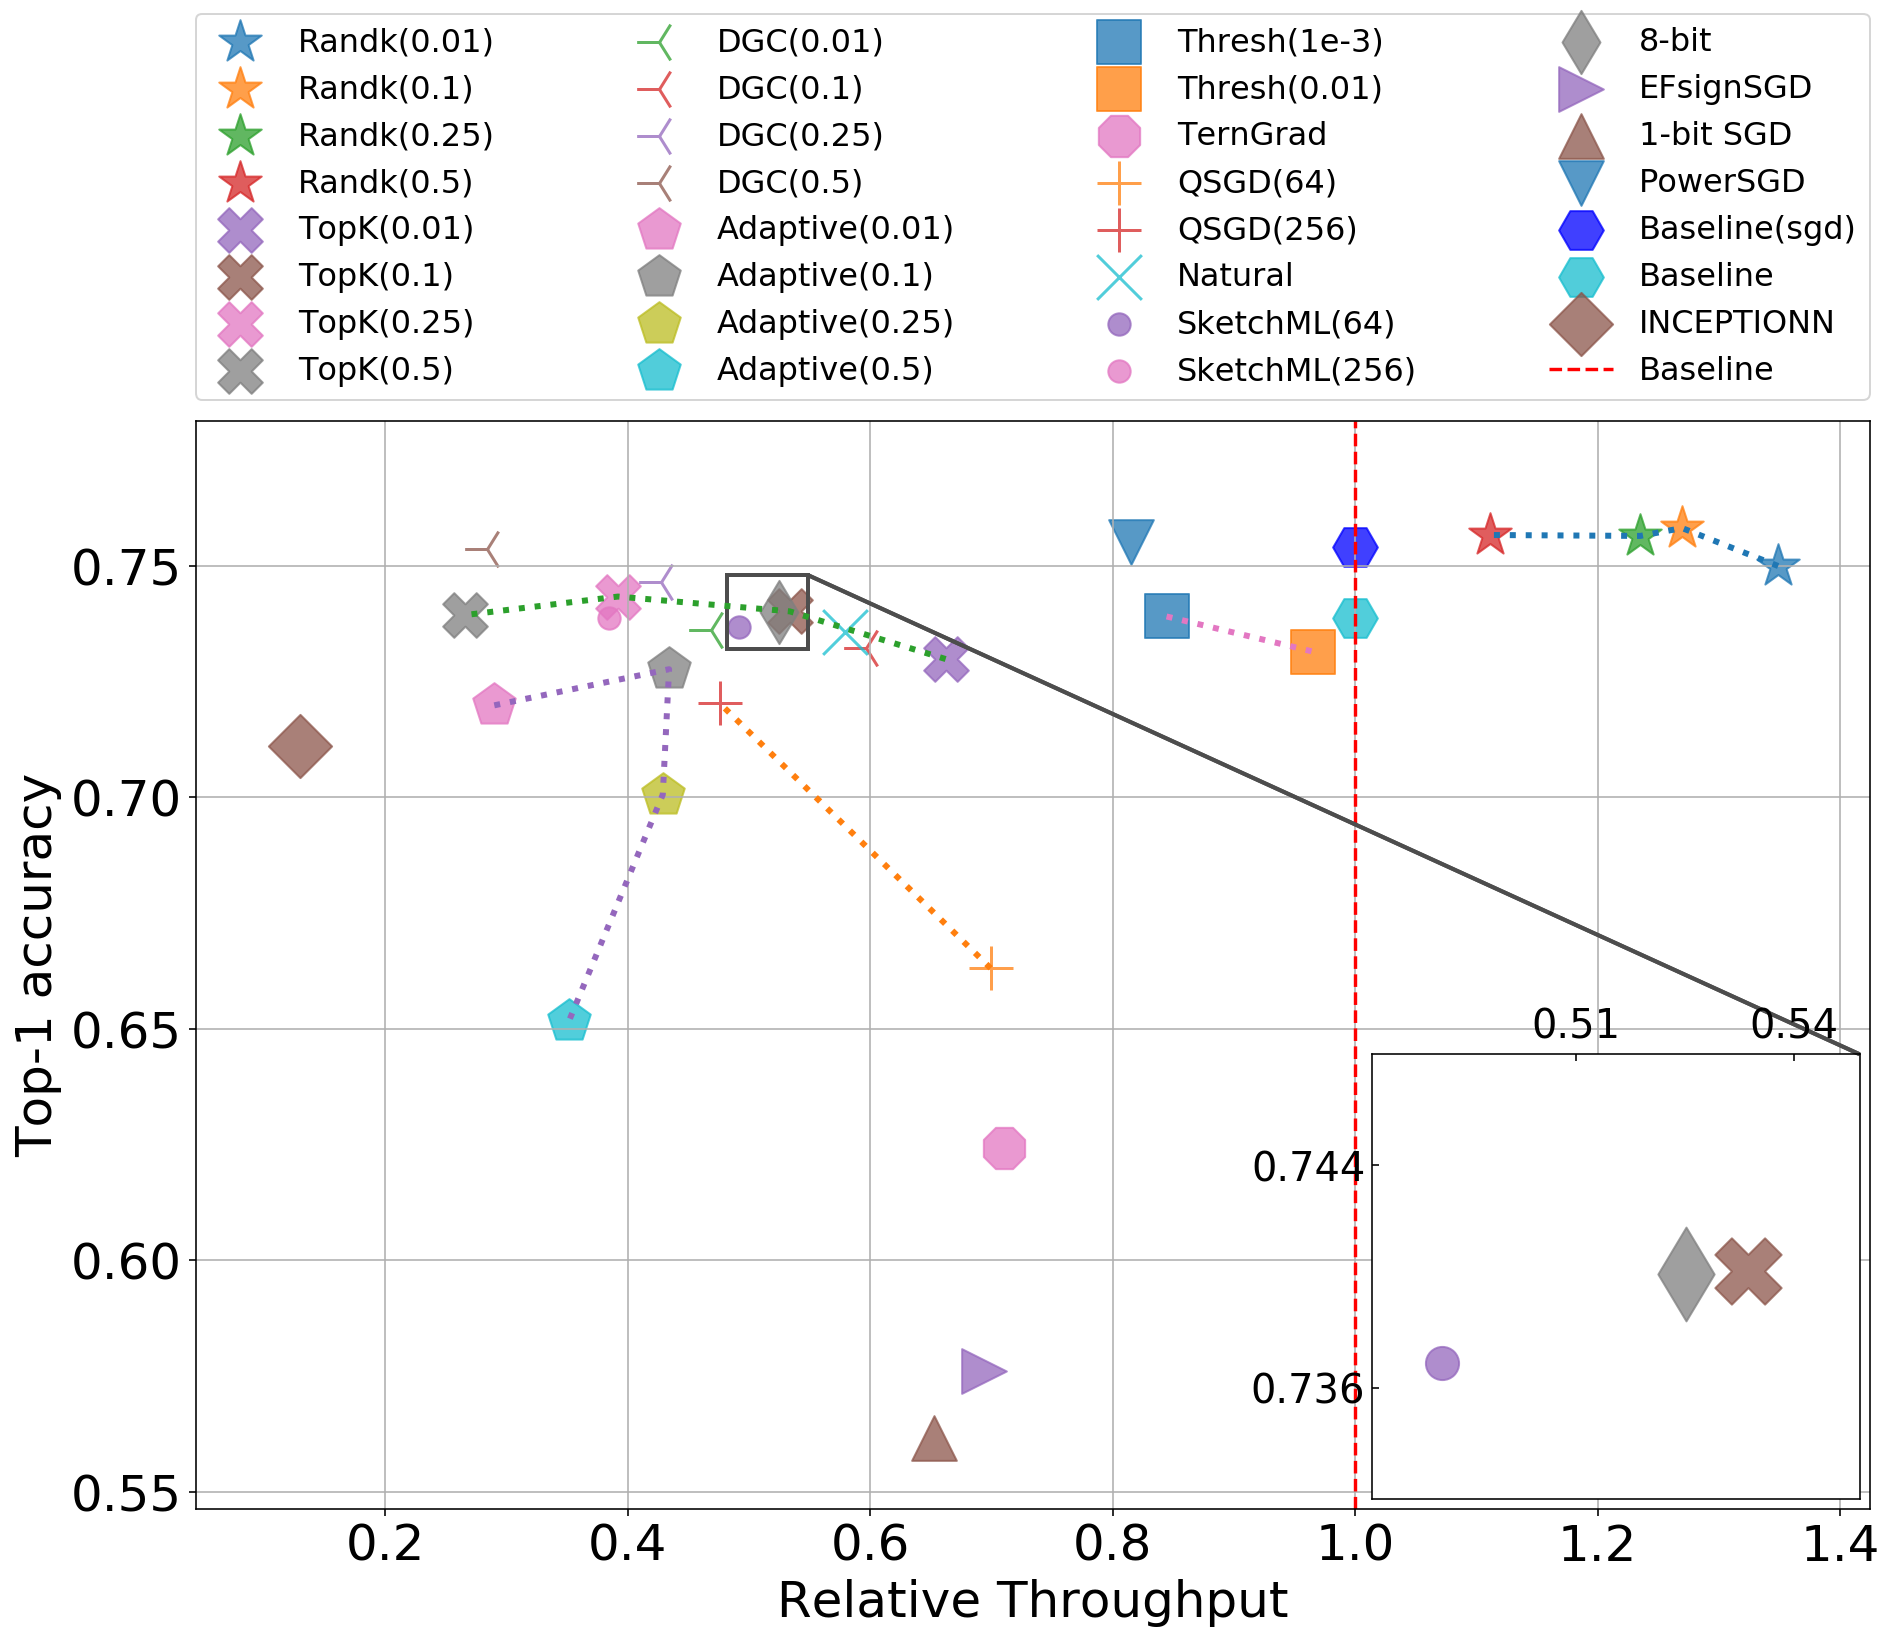

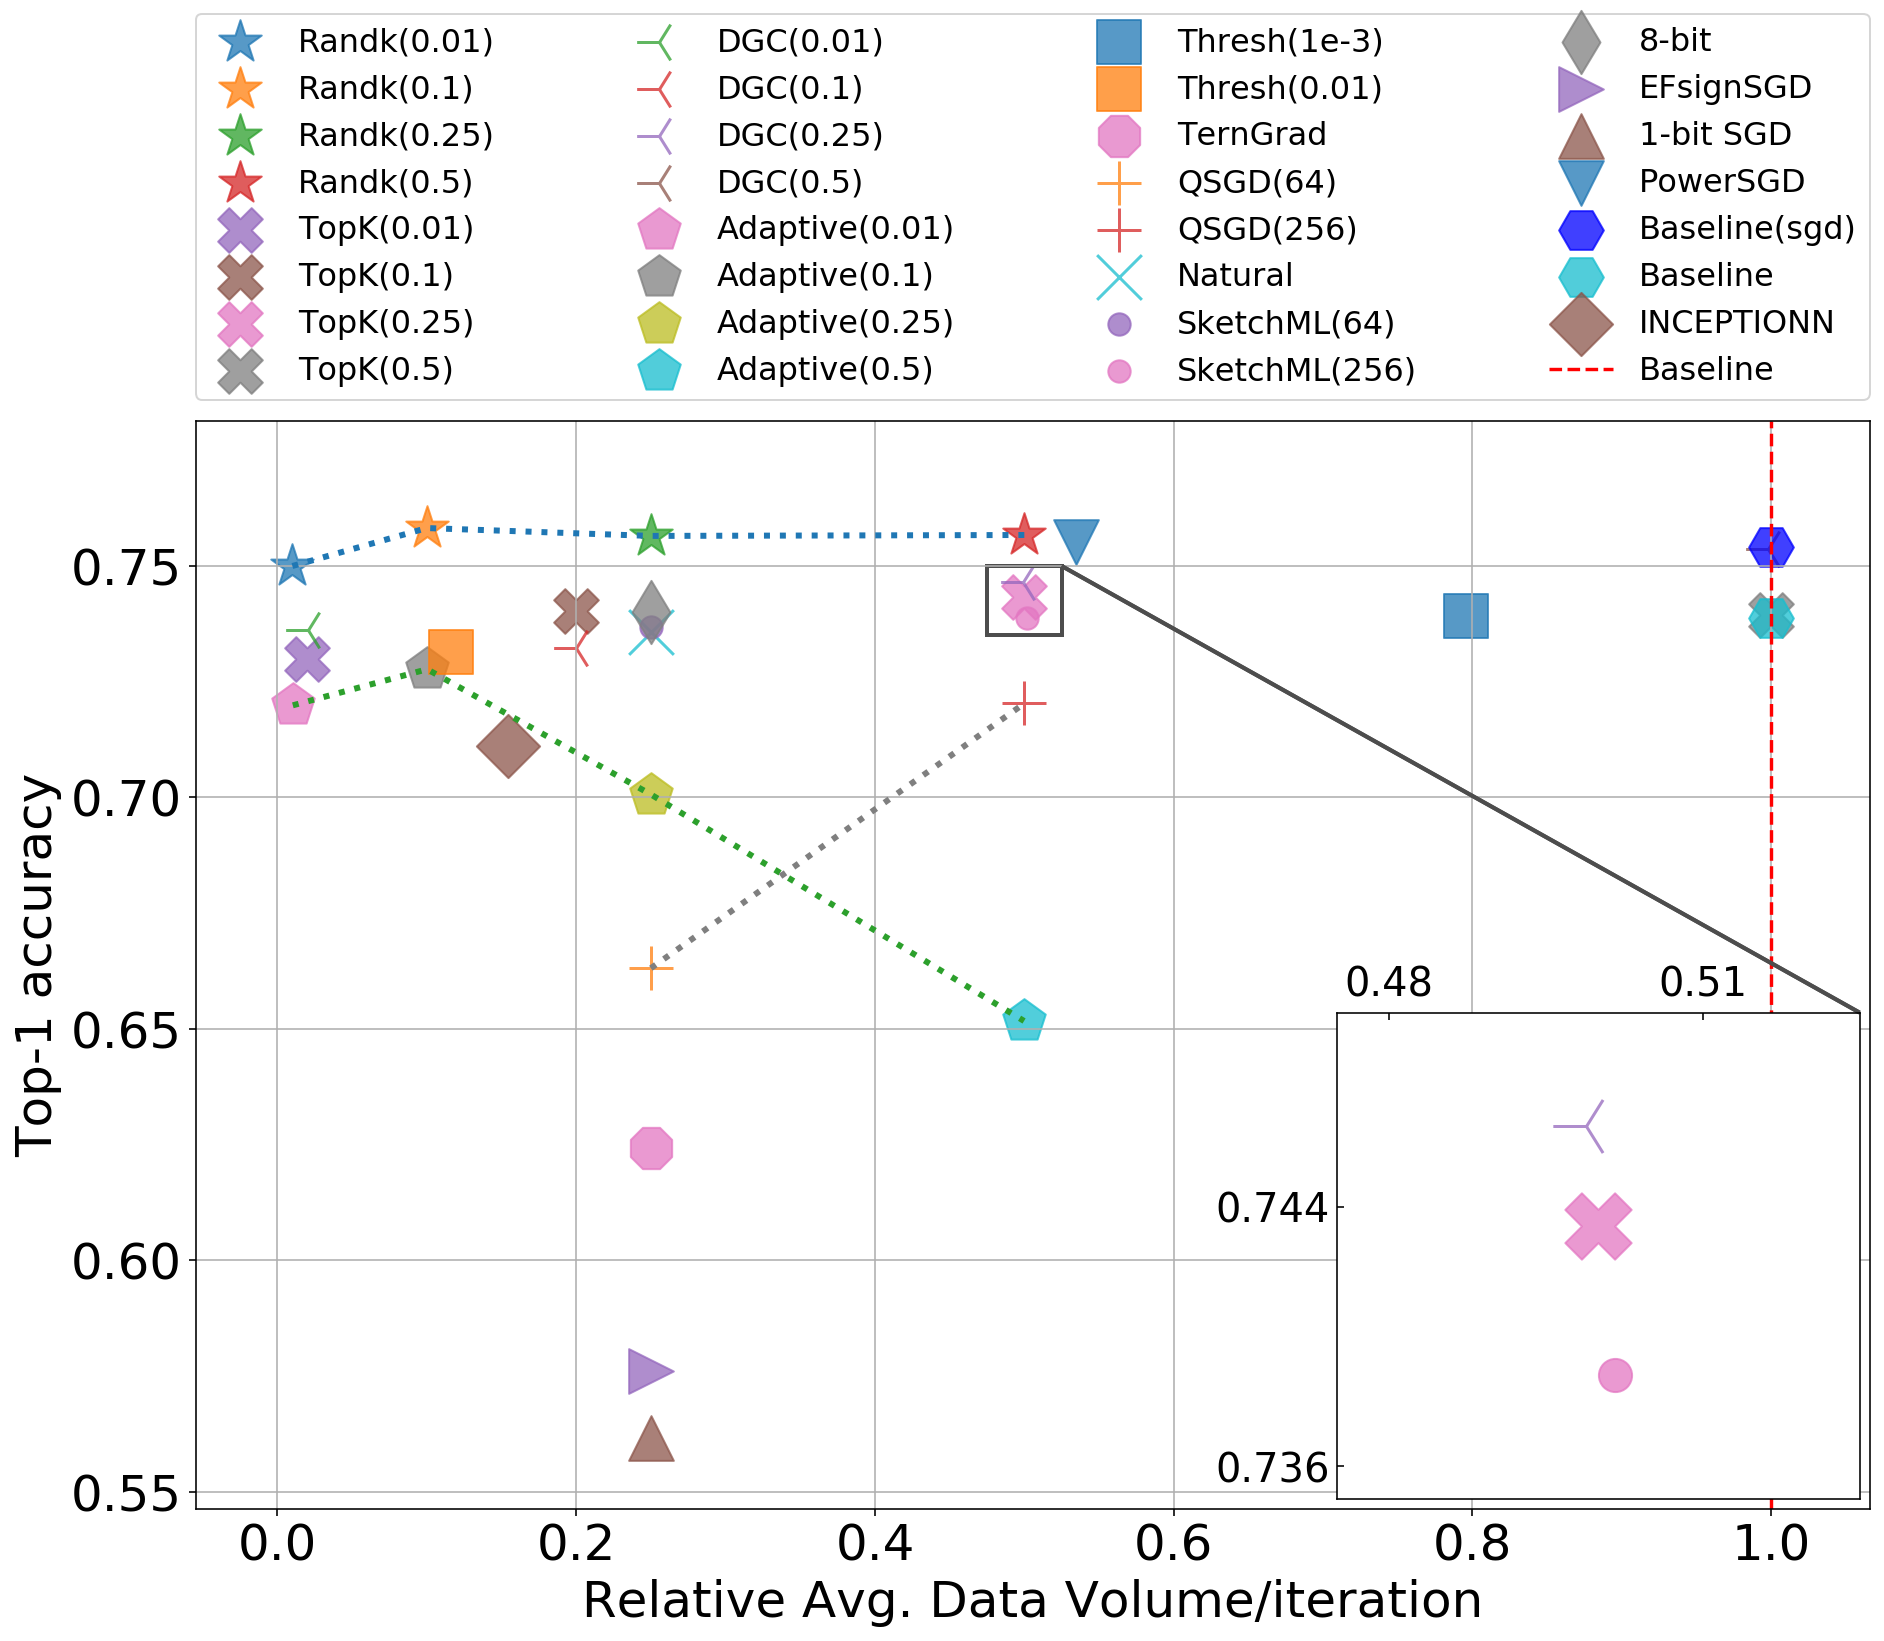

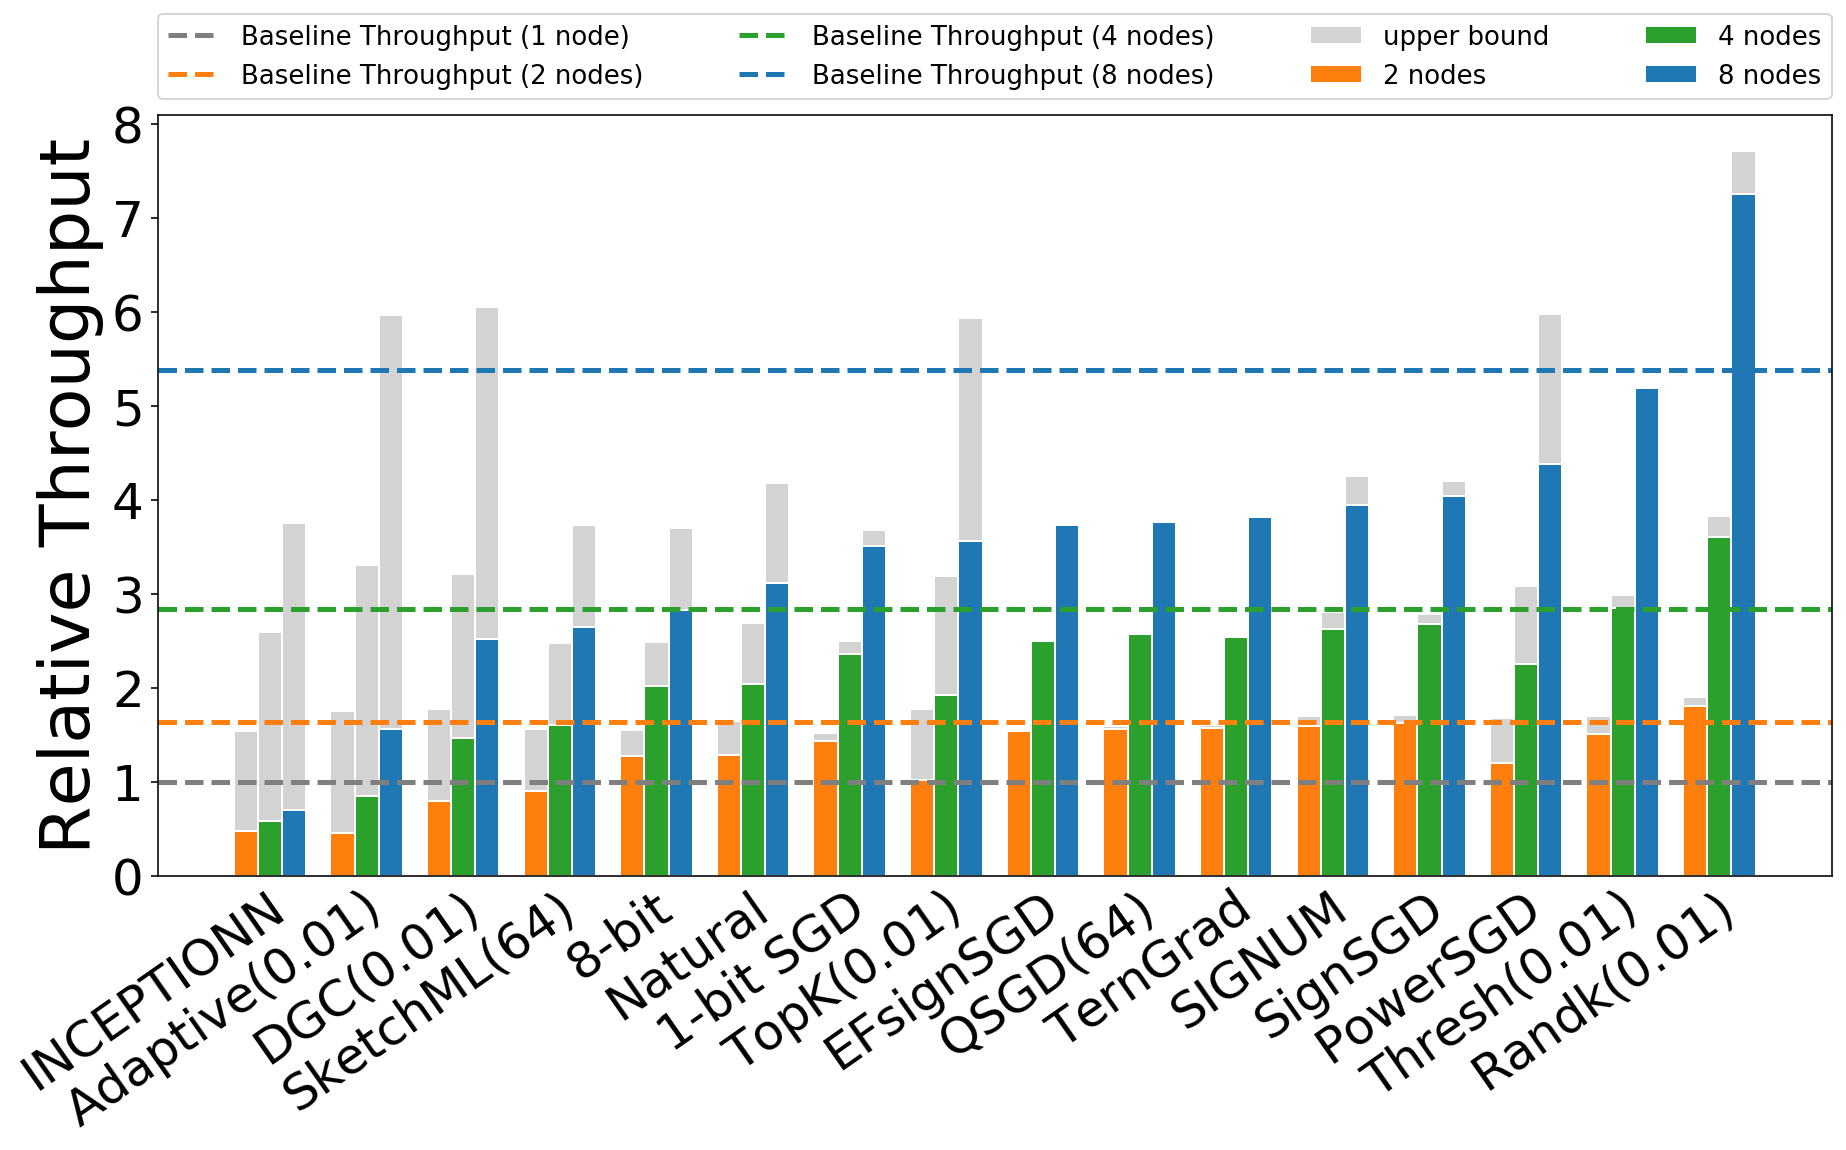

In [21]:
make_plot(new_df, 'throughput', 'top_1_accuracy',save_fig=False)
make_plot(new_df, 'data_volume', 'top_1_accuracy',save_fig=False)
scaling_plot(dt,ub,MODEL,'throughput', save_fig=False)

(59, 26) (59, 26)
df_shape: (62, 29)
num of plots: 31


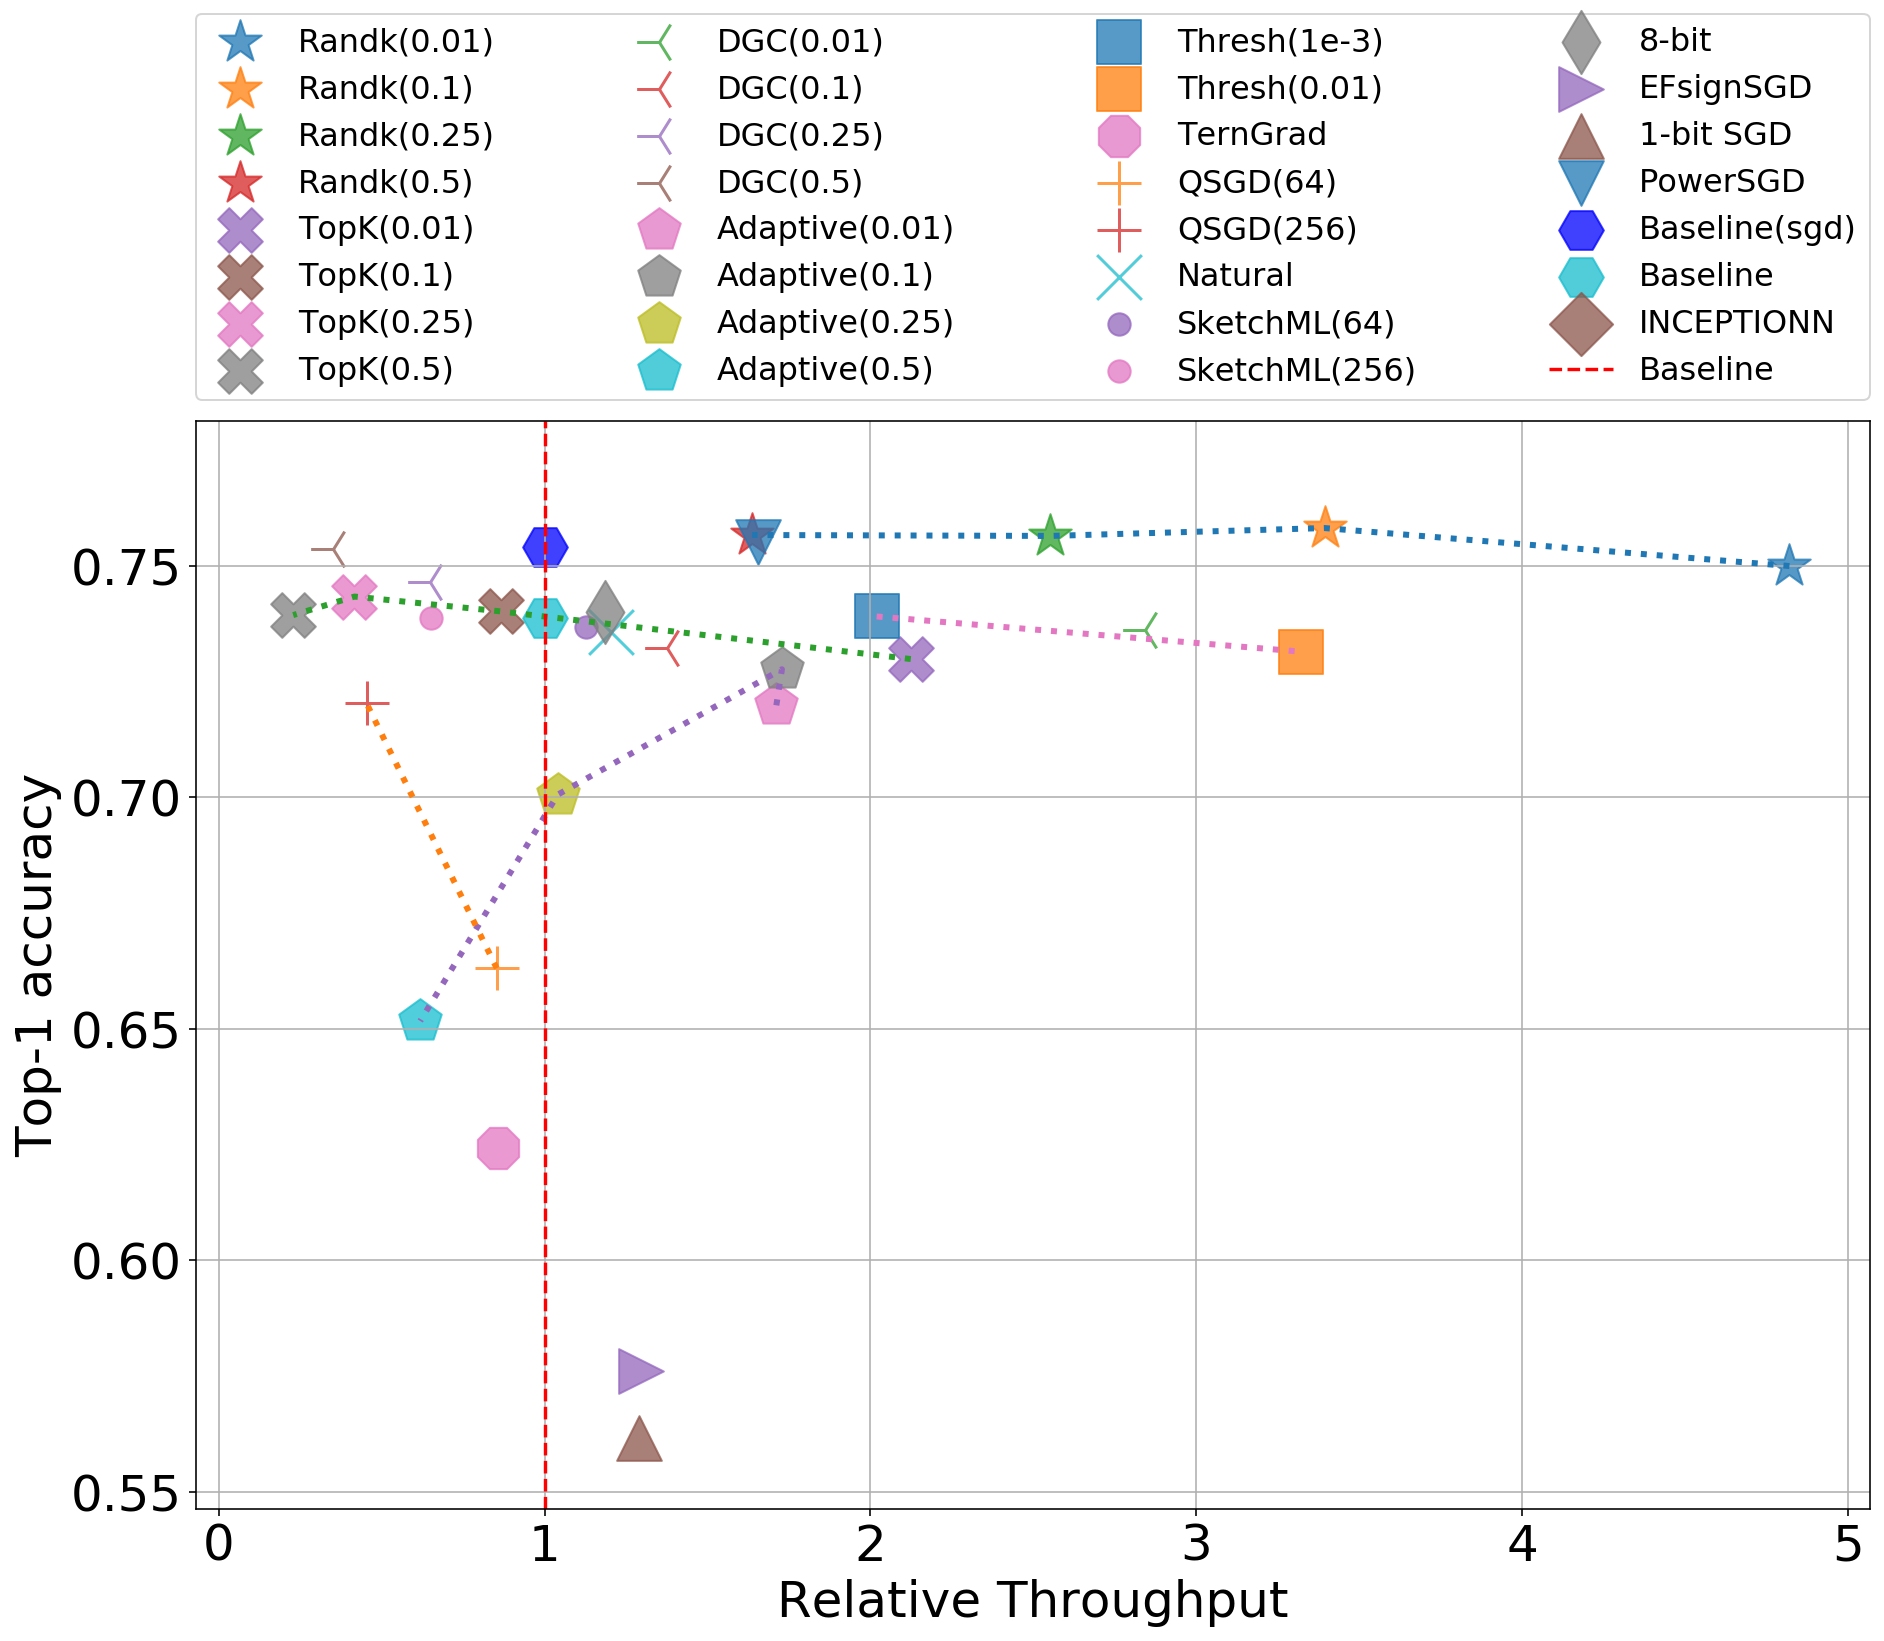

In [22]:
# 1G throughput
new_dt = row_filter(dt,{'bw':'1g','workers':8})
new_dv = row_filter(dv,{'workers':8})
print(new_dt.shape, new_dv.shape)

#runtime fix for imagenet resnet50
for index, row in new_dt.iterrows():
    if row['name'].startswith('threshold'):
        new_dt.at[index,'runtime'] = row['runtime'] * 90
    elif row['name'].startswith('dgc') or row['name'].startswith('adaq') or row['name'].startswith('powersgd'):
        if row['workers'] == 8:
            new_dt.at[index,'runtime'] = row['runtime'] * 90
        else:
            new_dt.at[index,'runtime'] = row['runtime'] / row['workers'] * 10000/500*90
    else:
        new_dt.at[index,'runtime'] = row['runtime'] / row['workers'] * 10000/500*90

#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
new_df.shape

make_plot(new_df, 'throughput', 'top_1_accuracy',save_fig=False,filename_suffix='-1G', cancel_insert=True)
# make_plot(new_df, 'data_volume', 'top_1_accuracy',save_fig=False)

## ml-20m-recommendation NCF

In [23]:
project = "ml-20m-recommendation"

d = D[project]
d.shape,d.columns #dv.shape

((272, 26),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'id', 'run_no', 'job_id', 'epoch', 'runtime', 'total_throughput',
        'hit_rate', 'ndcg', 'first_to_target', 'best_hit_rate', 'best_epoch',
        'data_volume'],
       dtype='object'))

In [24]:
d=d.rename(columns={"total_throughput": "throughput"})
d.columns

Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
       'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
       'id', 'run_no', 'job_id', 'epoch', 'runtime', 'throughput', 'hit_rate',
       'ndcg', 'first_to_target', 'best_hit_rate', 'best_epoch',
       'data_volume'],
      dtype='object')

In [25]:

MODEL='ncf'
new_d=row_filter(d,{'model':MODEL,'backend':'mpi'})
#new_d = new_d.rename(columns={"total_images_per_sec": "throughput"})
df=row_filter(new_d,{'mode':'accuracy'})
dv=row_filter(new_d,{'mode':'data-volume'})
dt=row_filter(new_d,{'mode':'throughput'})
ub=row_filter(new_d,{'mode':'upper-bound'})
df.shape,dv.shape,dt.shape, ub.shape,

((63, 26), (63, 26), (98, 26), (48, 26))

In [26]:
new_dt = row_filter(dt,{'bw':'10g','workers':8})
new_dv = row_filter(dv,{'workers':8})
print(new_dt.shape, new_dv.shape)
#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
# new_df.to_excel(f"{project+'-'+MODEL}.xls")
new_df.shape

(63, 26) (63, 26)


(63, 29)

In [27]:
new_d.sort_values(by=['mode','workers','name']).to_excel(f"{project+'-'+MODEL}.xls")

df_shape: (63, 29)
num of plots: 35
df_shape: (63, 29)
num of plots: 35
dt2: (98, 26) num_methods 17
dt3: (52, 26)
dt3 remove none: (48, 26)
ub_2node (16, 26)
ub_3node (48, 26)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


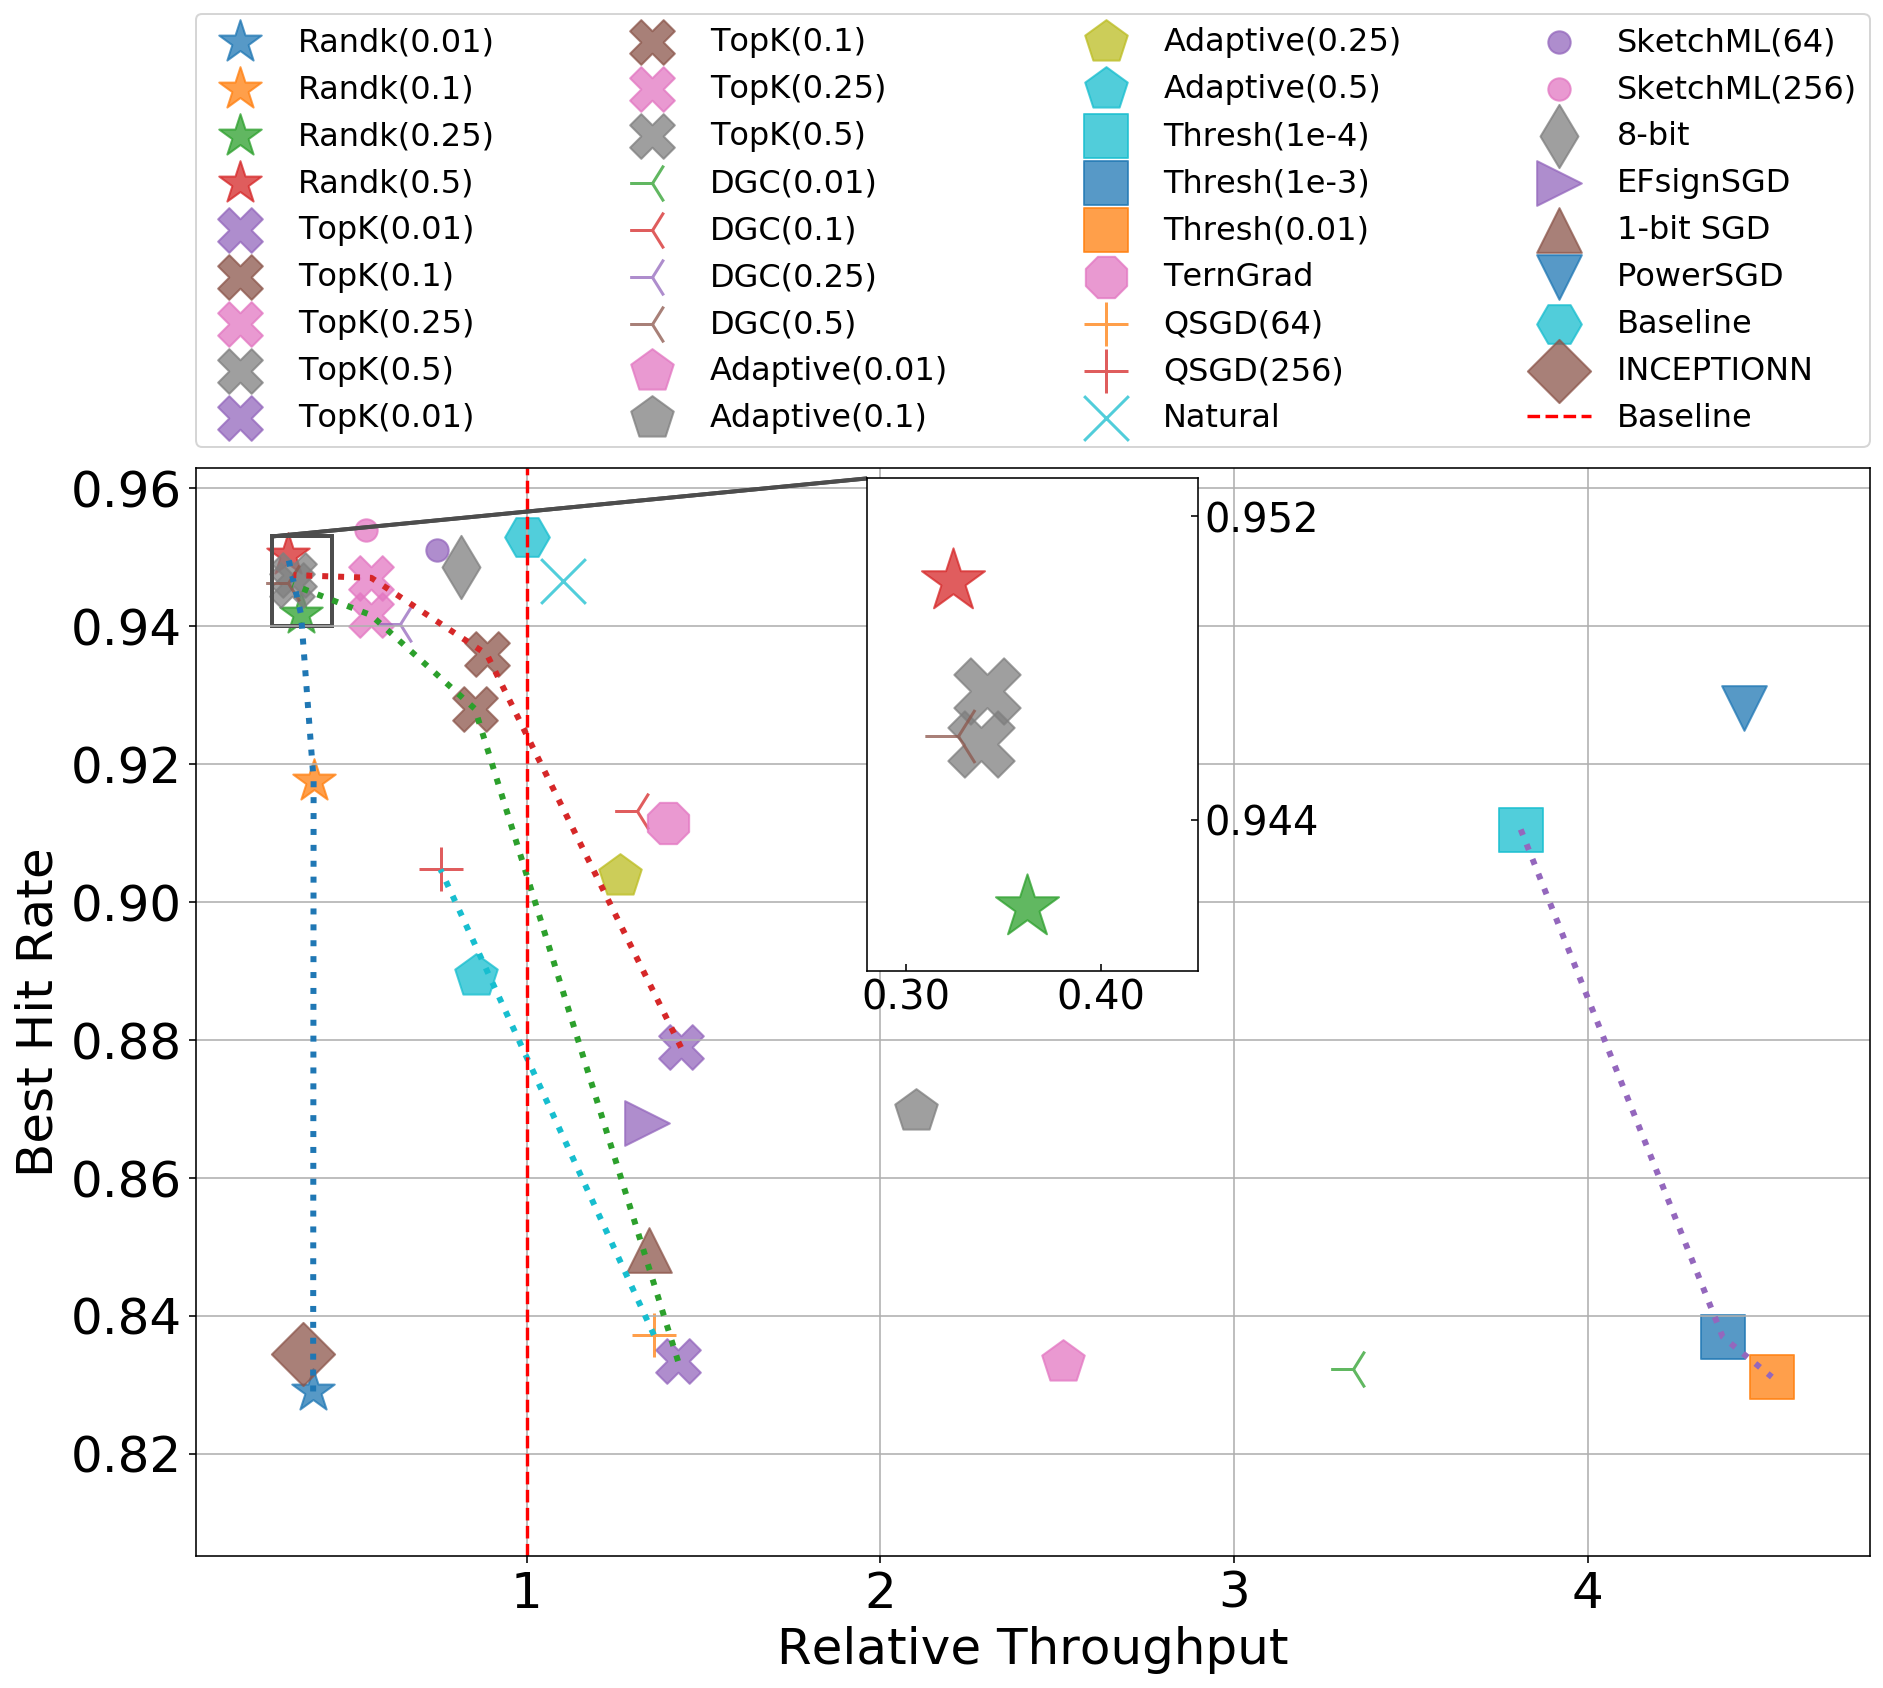

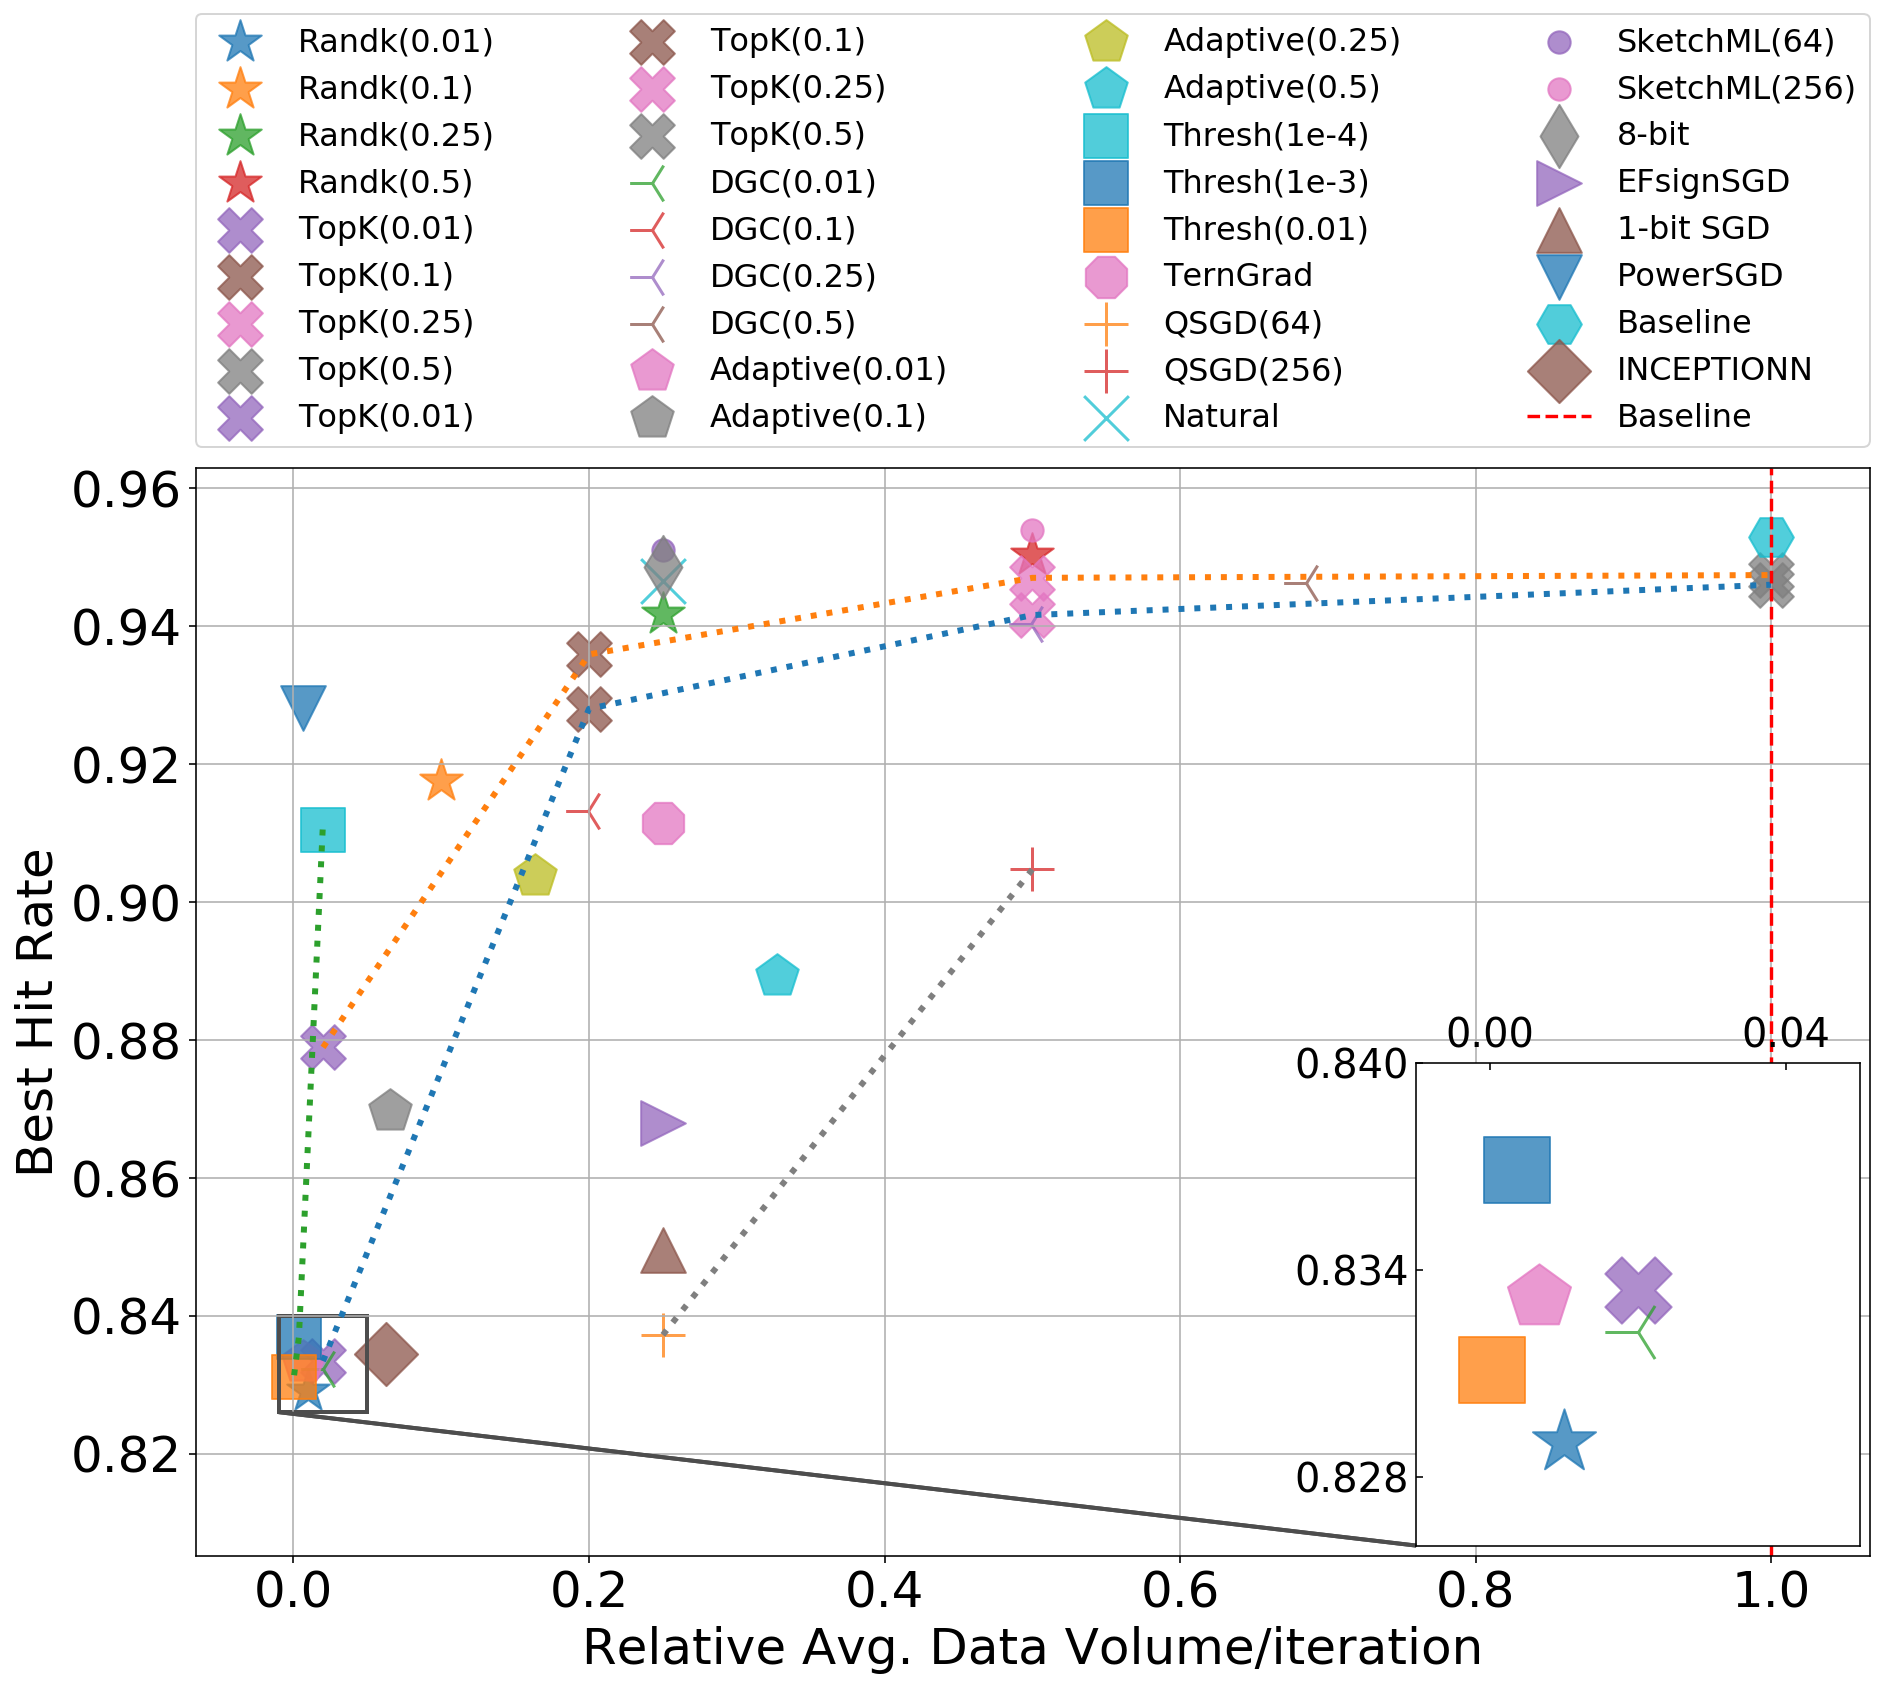

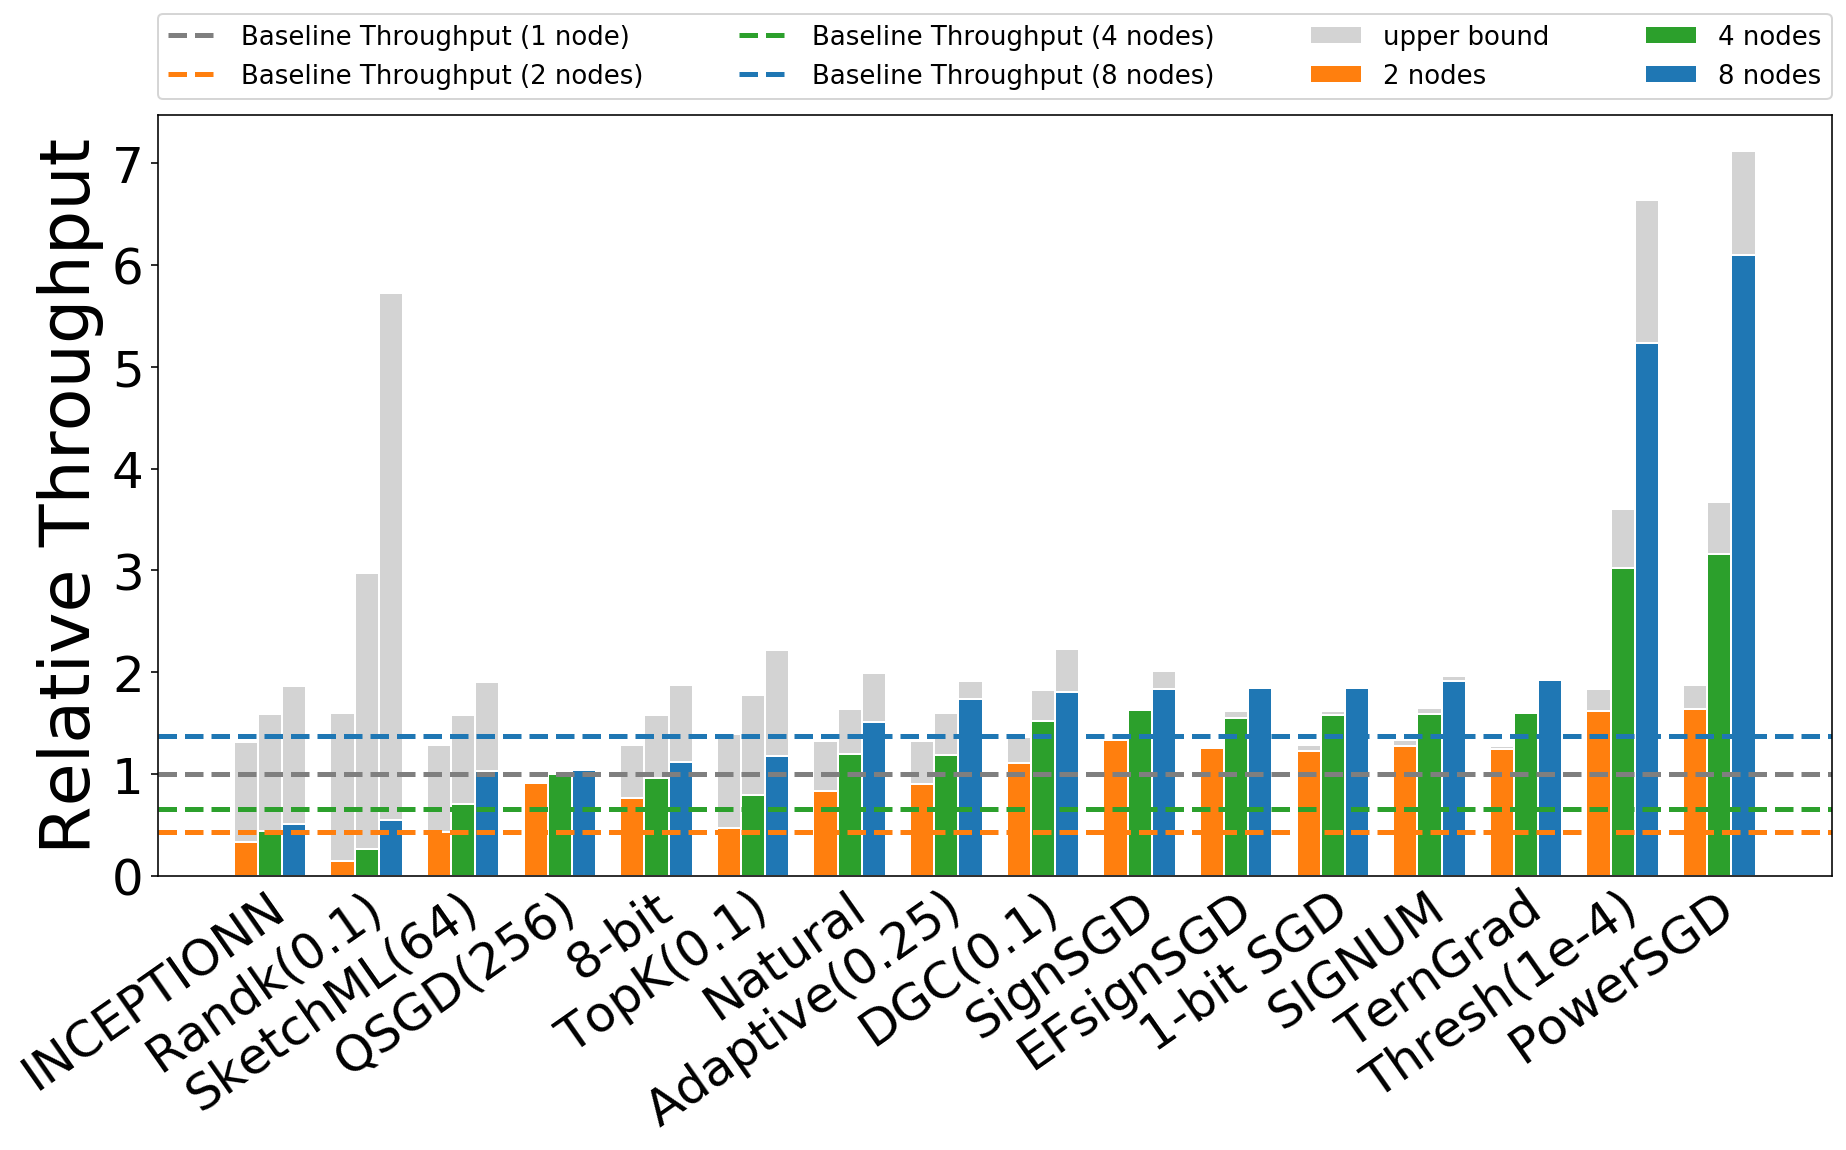

In [28]:
make_plot(new_df, 'throughput', 'best_hit_rate',save_fig=False)
make_plot(new_df, 'data_volume', 'best_hit_rate',save_fig=False)
scaling_plot(dt,ub,MODEL,'throughput', save_fig=False)

## PTB-language modeling

In [29]:
project = "PTB-language_modeling"
d = D[project]
d.shape,d.columns #dv.shape

((222, 28),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'id', 'run_no', 'job_id', 'step', 'global_step', 'runtime', 'cost',
        'test_cost', 'validation_cost', 'perplexity', 'test_perplexity',
        'validation_perplexity', 'throughput', 'data_volume'],
       dtype='object'))

In [30]:
df=row_filter(d,{'mode':'accuracy'})
dv=row_filter(d,{'mode':'data-volume'})
dt=row_filter(d,{'mode':'throughput'})
ub=row_filter(d,{'mode':'upper-bound'})

df.shape,dv.shape,dt.shape, ub.shape,

((35, 28), (35, 28), (104, 28), (48, 28))

In [31]:
MODEL = 'LSTM'

new_dt = row_filter(dt,{'model':'LSTM','workers':8,'bw':'10g'})
new_dv = row_filter(dv,{'model':'LSTM','workers':8})
new_dt.shape,new_dv.shape

((35, 28), (35, 28))

In [32]:
#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
# new_df.to_excel(f"{project+'-'+MODEL}.xls")
new_df.shape

(35, 31)

In [33]:
new_d.sort_values(by=['mode','workers','name']).to_excel(f"{project+'-'+MODEL}.xls")

df_shape: (35, 31)
num of plots: 28
df_shape: (35, 31)
num of plots: 28
dt2: (70, 28) num_methods 17
dt3: (52, 28)
dt3 remove none: (48, 28)
ub_2node (16, 28)
ub_3node (48, 28)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


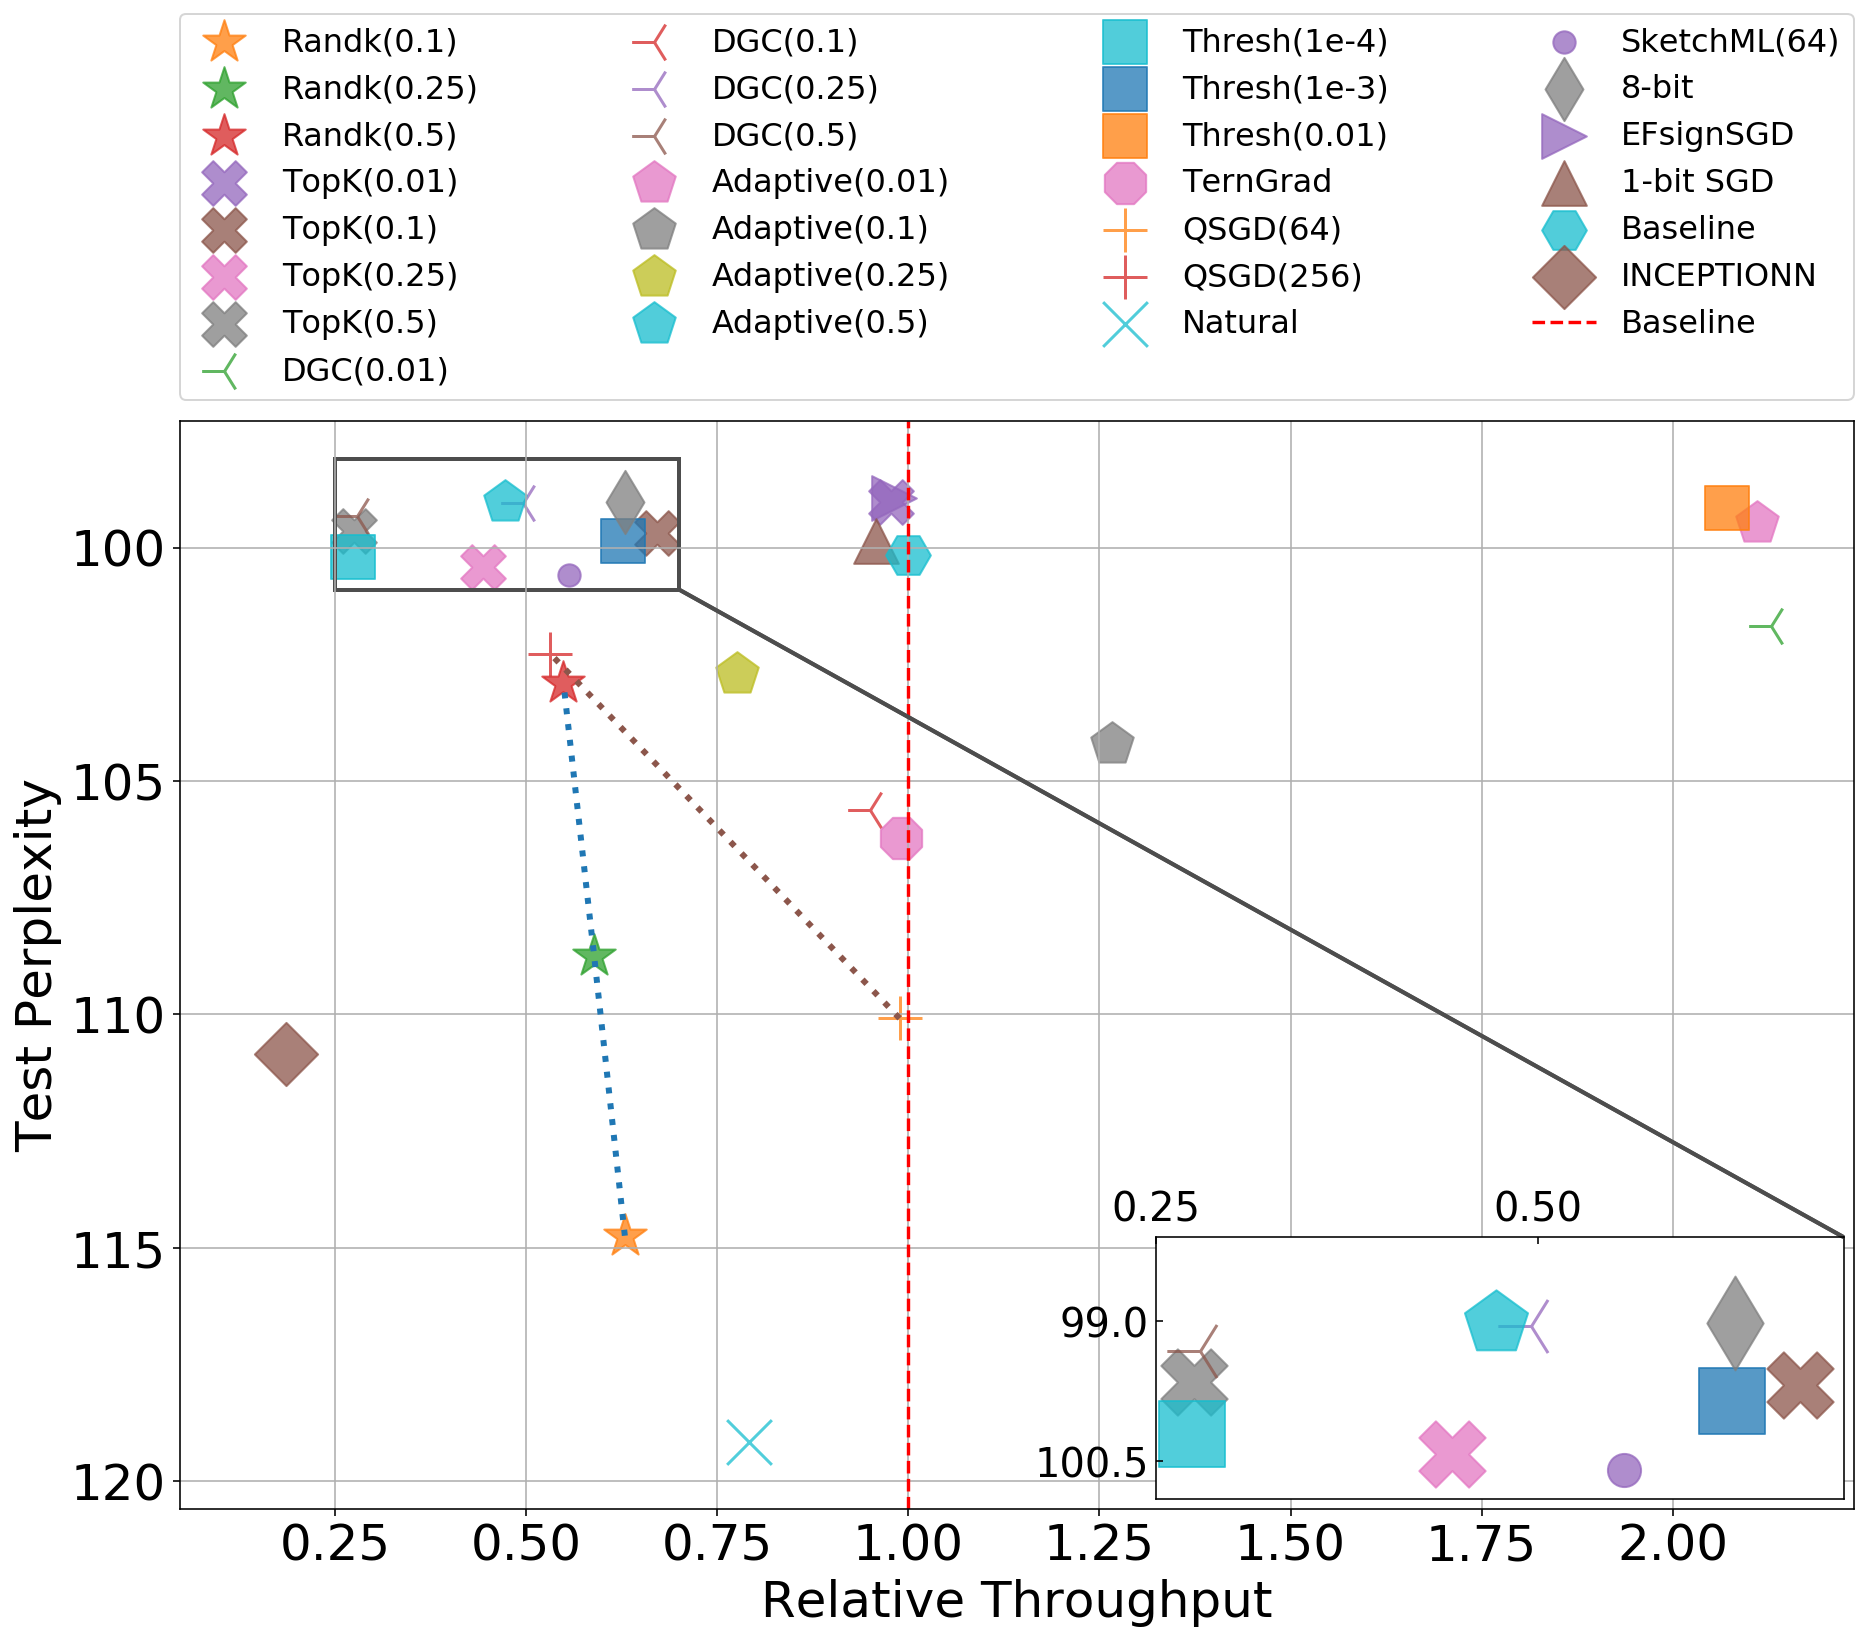

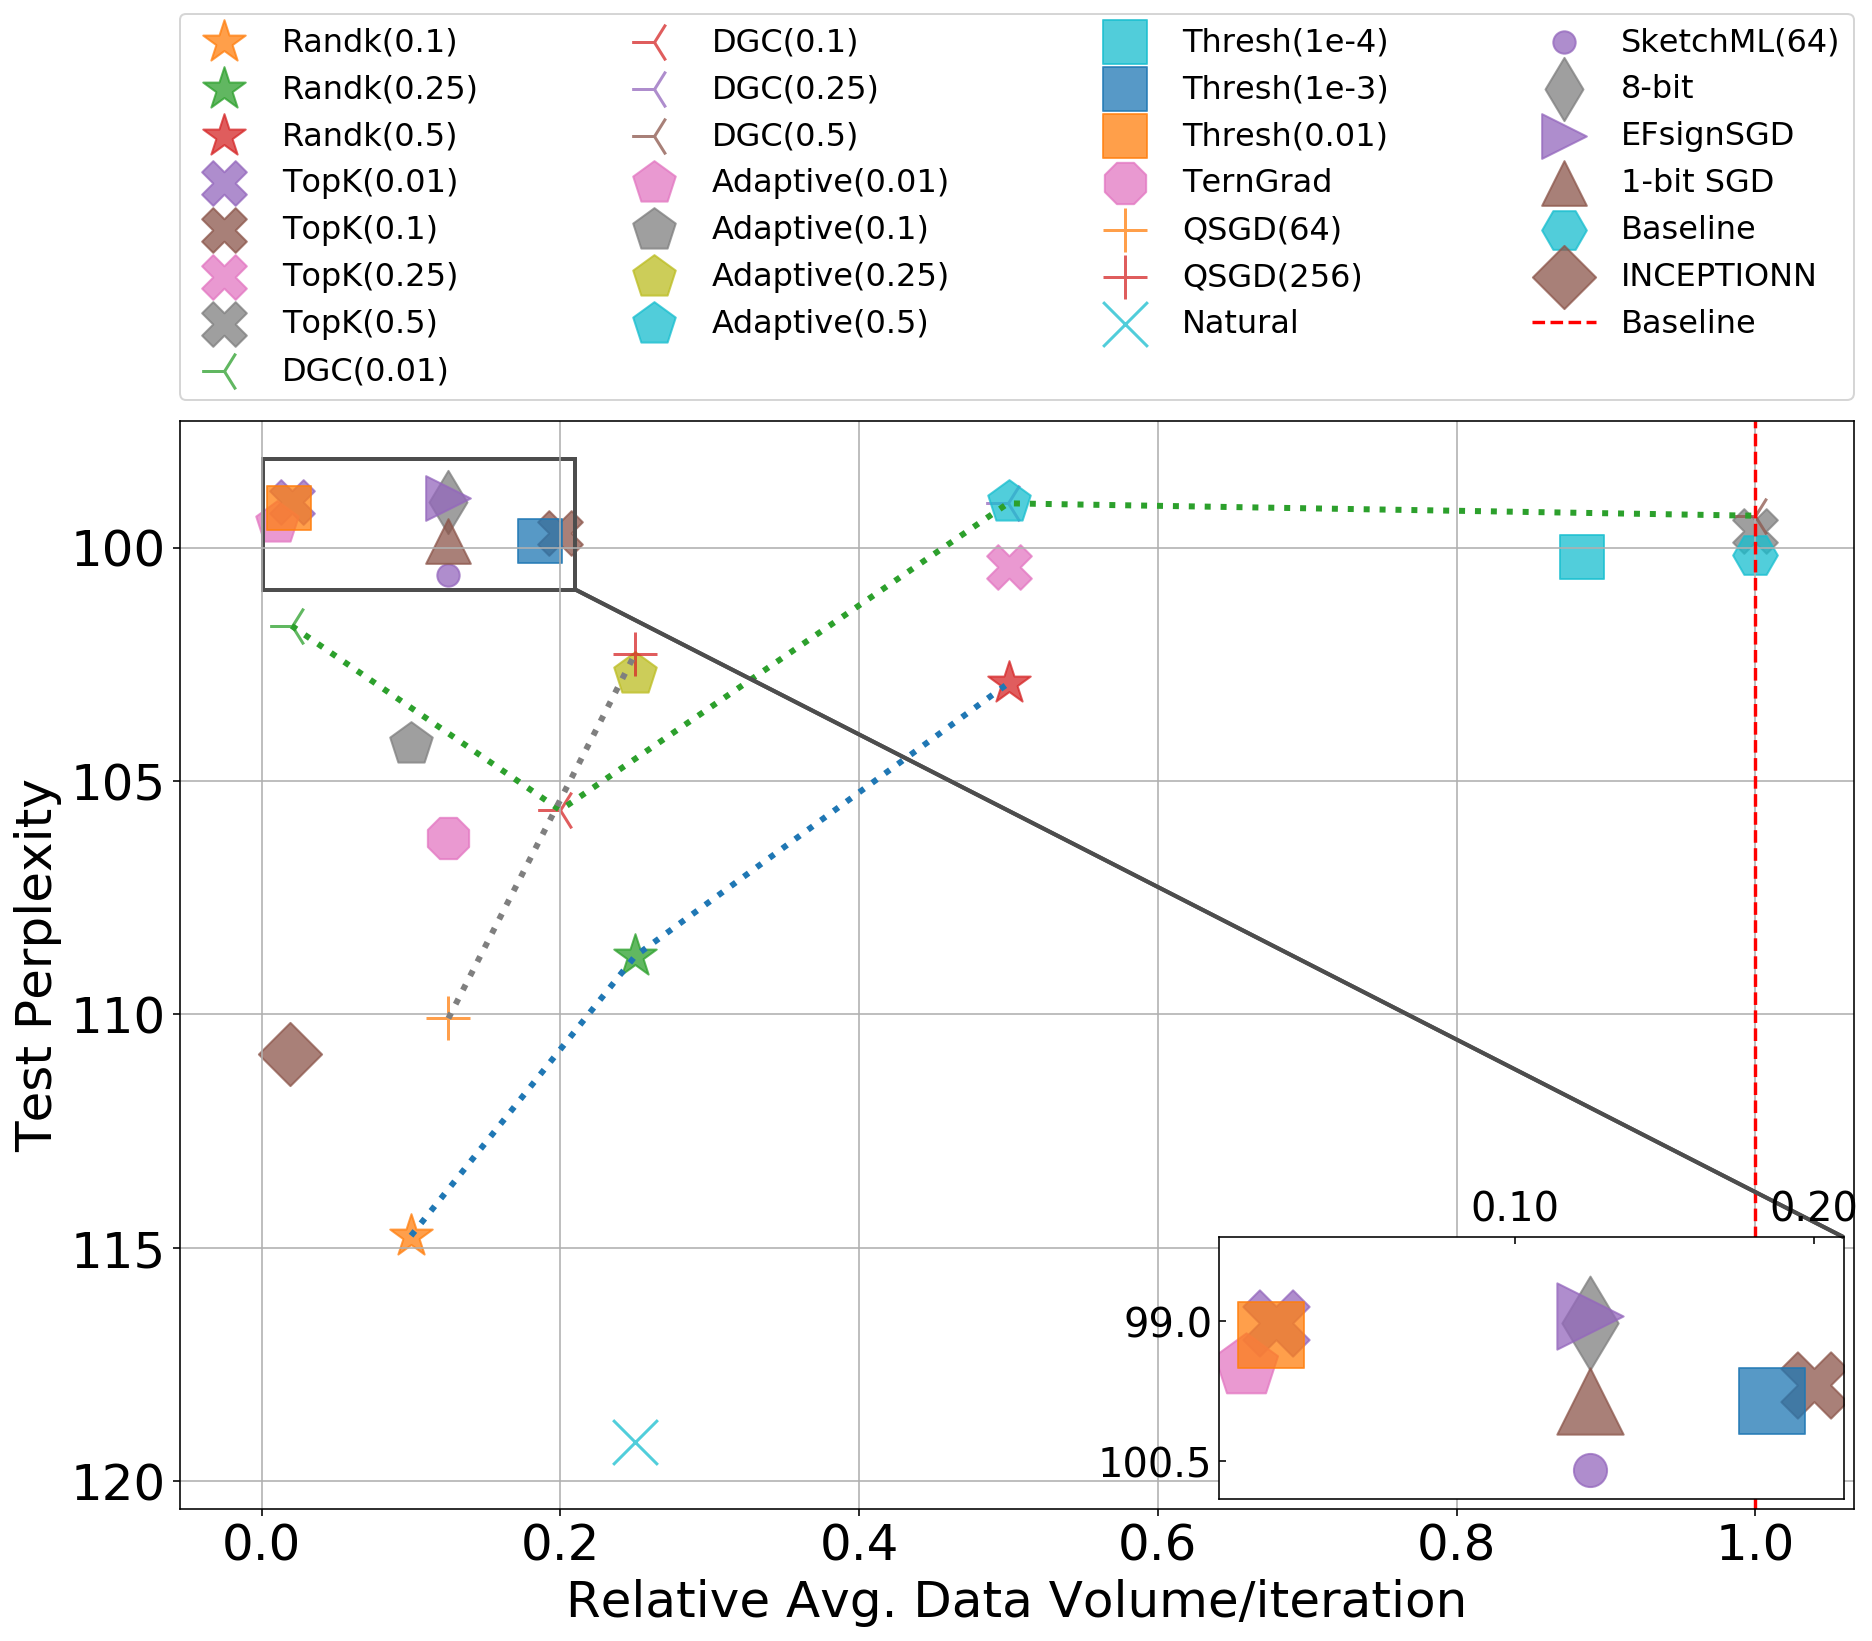

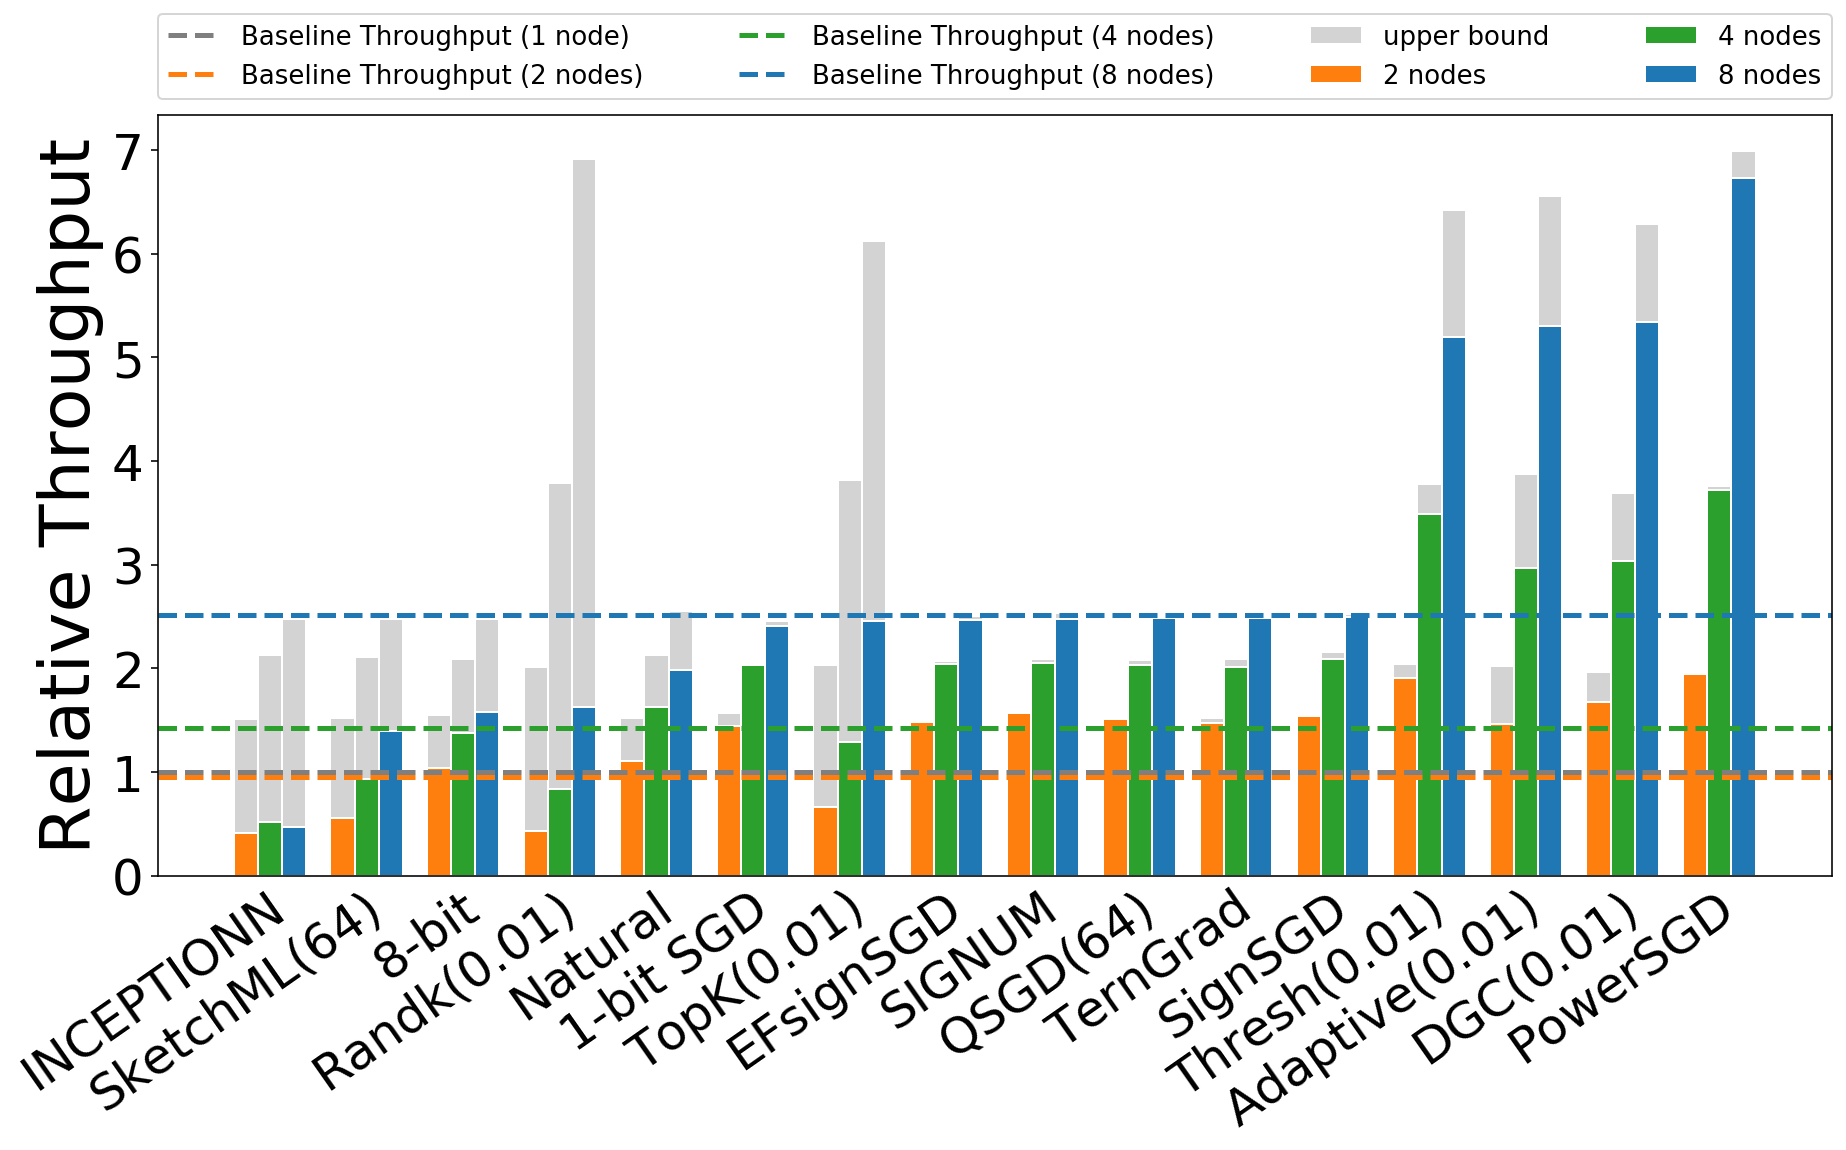

In [34]:
make_plot(new_df, 'throughput', 'test_perplexity',save_fig=False)
make_plot(new_df, 'data_volume', 'test_perplexity',save_fig=False)
scaling_plot(dt,ub,MODEL,'throughput', save_fig=False)

## ImageNet vgg19 throughput

In [35]:
project = "imagenet-classification"

d = D[project]
d.shape, d.columns

((587, 26),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'momentum', 'id', 'run_no', 'job_id', 'step', 'runtime',
        'total_images_per_sec', 'top_1_accuracy', 'top_5_accuracy', 'loss',
        'data_volume', 'throughput'],
       dtype='object'))

In [36]:
MODEL = 'vgg19'
new_d=row_filter(d,{'model':MODEL,'backend':'mpi'})
df=row_filter(new_d,{'mode':'accuracy'})
dv=row_filter(new_d,{'mode':'data-volume'})
dt=row_filter(new_d,{'mode':'throughput'})
ub=row_filter(new_d,{'mode':'upper-bound'})

new_d.shape,df.shape,dv.shape,dt.shape, ub.shape,

((103, 26), (0, 26), (0, 26), (52, 26), (51, 26))

In [37]:
new_d.sort_values(by=['mode','bw','workers','name',]).to_excel(f"{project+'-'+MODEL}.xls")

dt2: (52, 26) num_methods 17
dt3: (52, 26)
dt3 remove none: (48, 26)
ub_2node (16, 26)
ub_3node (48, 26)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


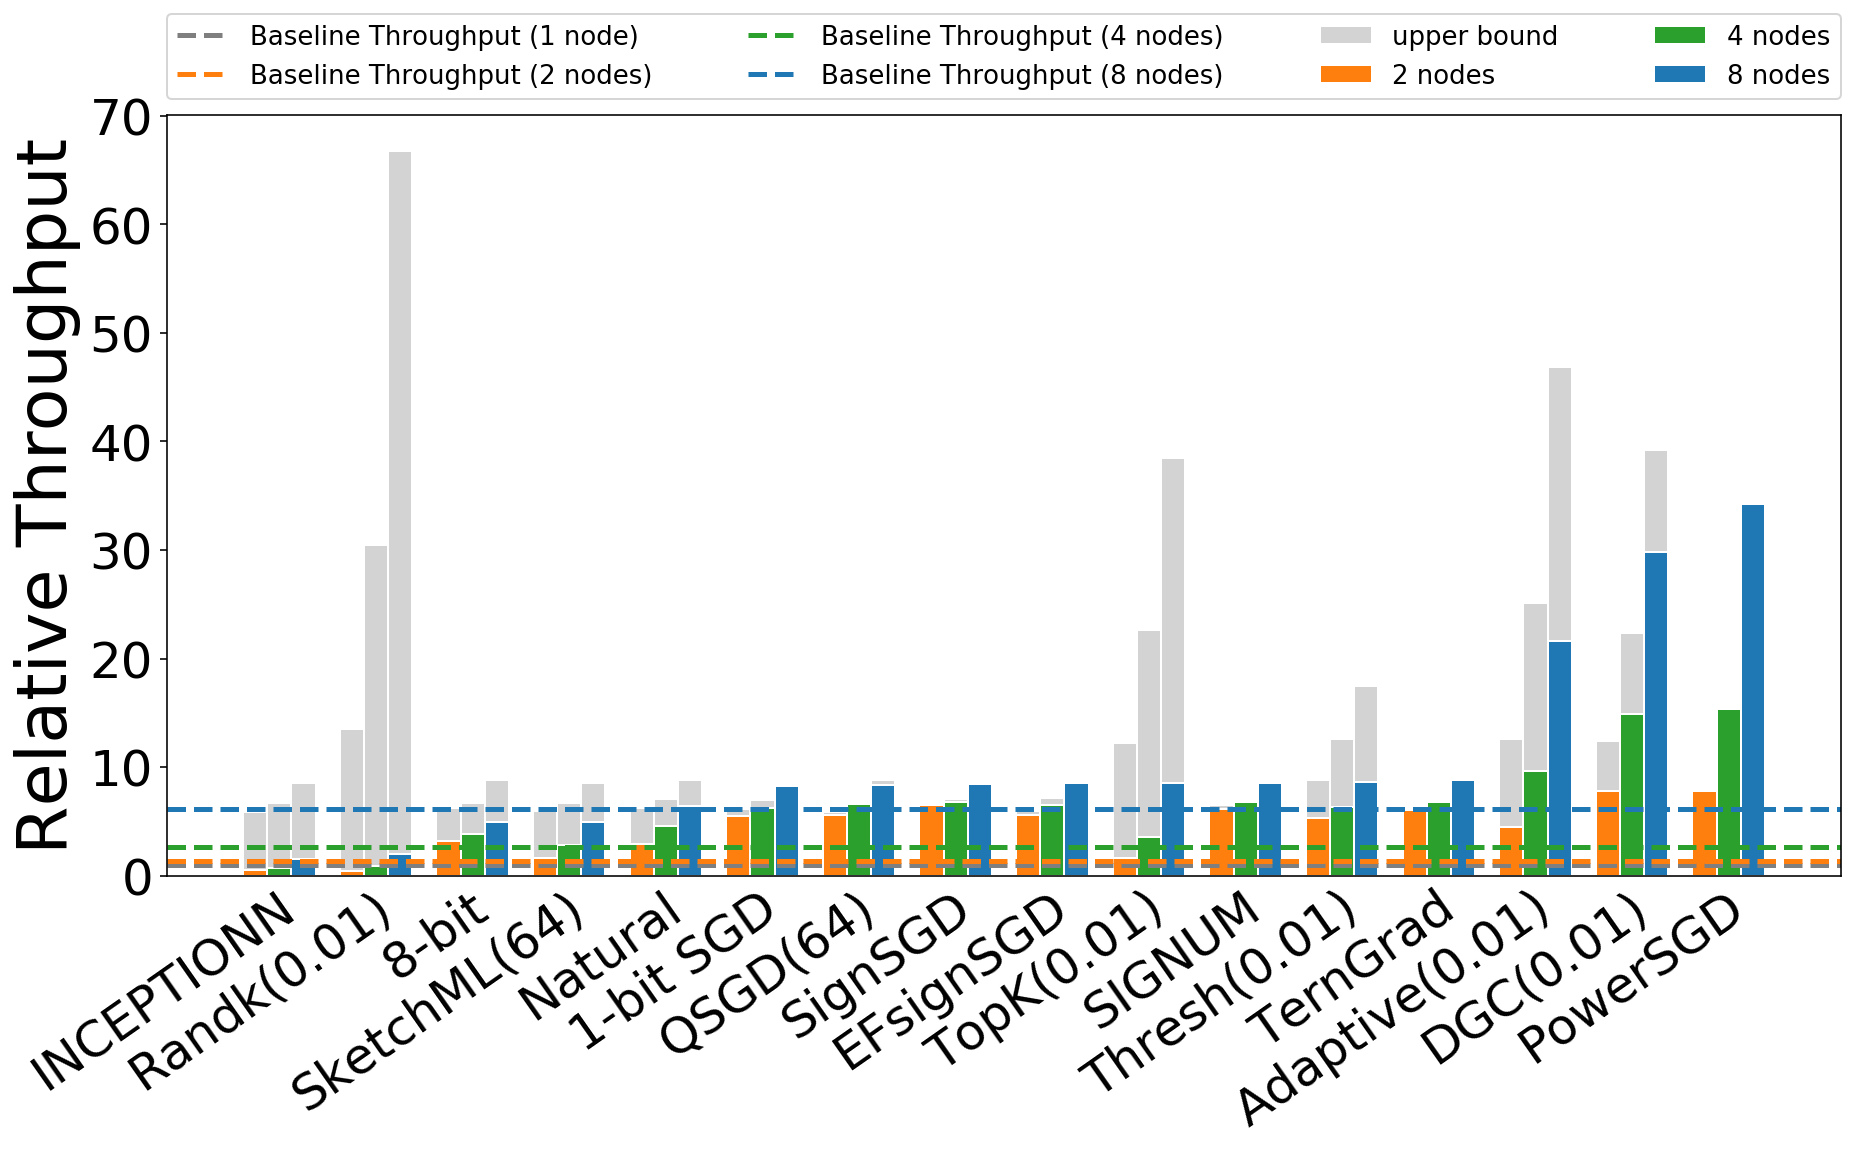

In [38]:
scaling_plot(dt,ub,MODEL,'throughput',save_fig=False)

## DAGM2007-segmentation

In [39]:

project = "DAGM2007-segmentation"

d = D[project]
d.shape, d.columns

((225, 30),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'id', 'run_no', 'job_id', 'runtime', 'step', 'global_step',
        'throughput', 'IoU_Metrics/iou_score_ths_0.05',
        'IoU_Metrics/iou_score_ths_0.125', 'IoU_Metrics/iou_score_ths_0.25',
        'IoU_Metrics/iou_score_ths_0.5', 'IoU_Metrics/iou_score_ths_0.75',
        'IoU_Metrics/iou_score_ths_0.85', 'IoU_Metrics/iou_score_ths_0.95',
        'IoU_Metrics/iou_score_ths_0.99', 'data_volume'],
       dtype='object'))

In [40]:

MODEL='unet'
new_d=row_filter(d,{'model':MODEL,'backend':'mpi'})
#new_d = new_d.rename(columns={"total_images_per_sec": "throughput"})
df=row_filter(new_d,{'mode':'accuracy'})
dv=row_filter(new_d,{'mode':'data-volume'})
dt=row_filter(new_d,{'mode':'throughput'})
ub=row_filter(new_d,{'mode':'upper-bound'})
df.shape,dv.shape,dt.shape, ub.shape,

((35, 30), (35, 30), (104, 30), (51, 30))

In [41]:
new_dt = row_filter(dt,{'bw':'10g','workers':8})
new_dv = row_filter(dv,{'workers':8})
print(new_dt.shape, new_dv.shape)
#join throughput runtime and data volume
d2 = df.merge(new_dt[['name','throughput','runtime']], how='left', on=['name'])
d3 = d2.merge(new_dv[['name','data_volume']], how='left', on=['name'])

d3.rename(columns={"runtime_y": "runtime"}, inplace=True)
d3.rename(columns={"throughput_y": "throughput"}, inplace=True)
d3.rename(columns={"data_volume_y": "data_volume"}, inplace=True)

new_df=d3
# new_df.to_excel(f"{project+'-'+MODEL}.xls")
new_df.shape

(35, 30) (35, 30)


(35, 33)

In [42]:
new_d.sort_values(by=['mode','workers','name']).to_excel(f"{project+'-'+MODEL}.xls")

df_shape: (35, 33)
num of plots: 28
df_shape: (35, 33)
num of plots: 28
dt2: (70, 30) num_methods 17
dt3: (52, 30)
dt3 remove none: (48, 30)
ub_2node (16, 30)
ub_3node (48, 30)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


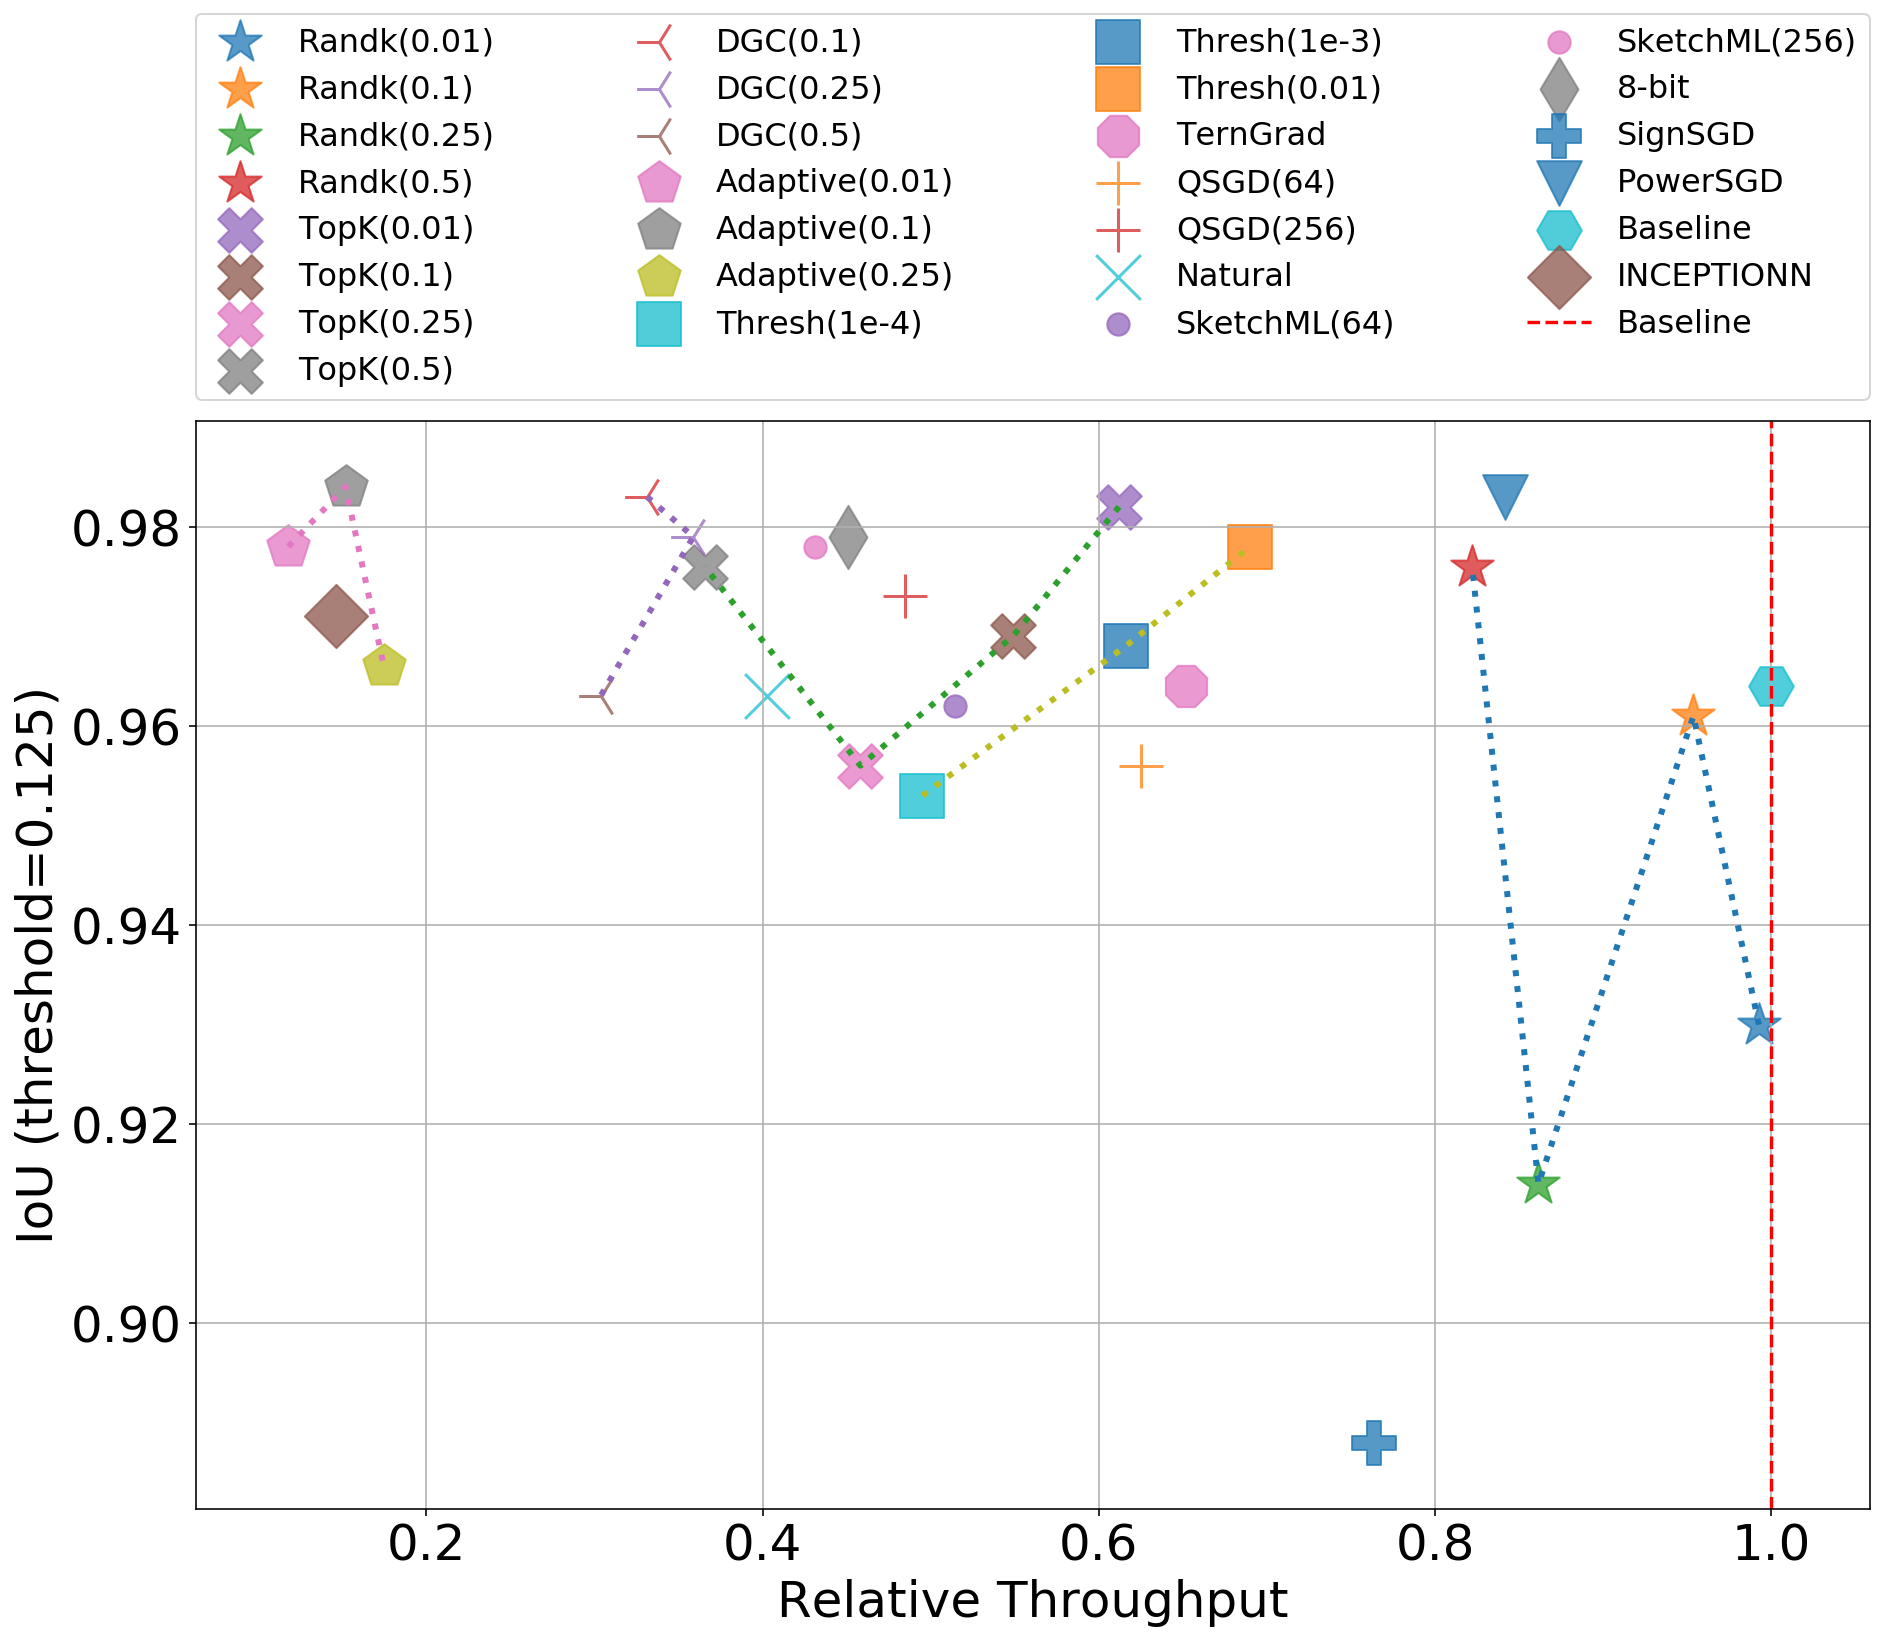

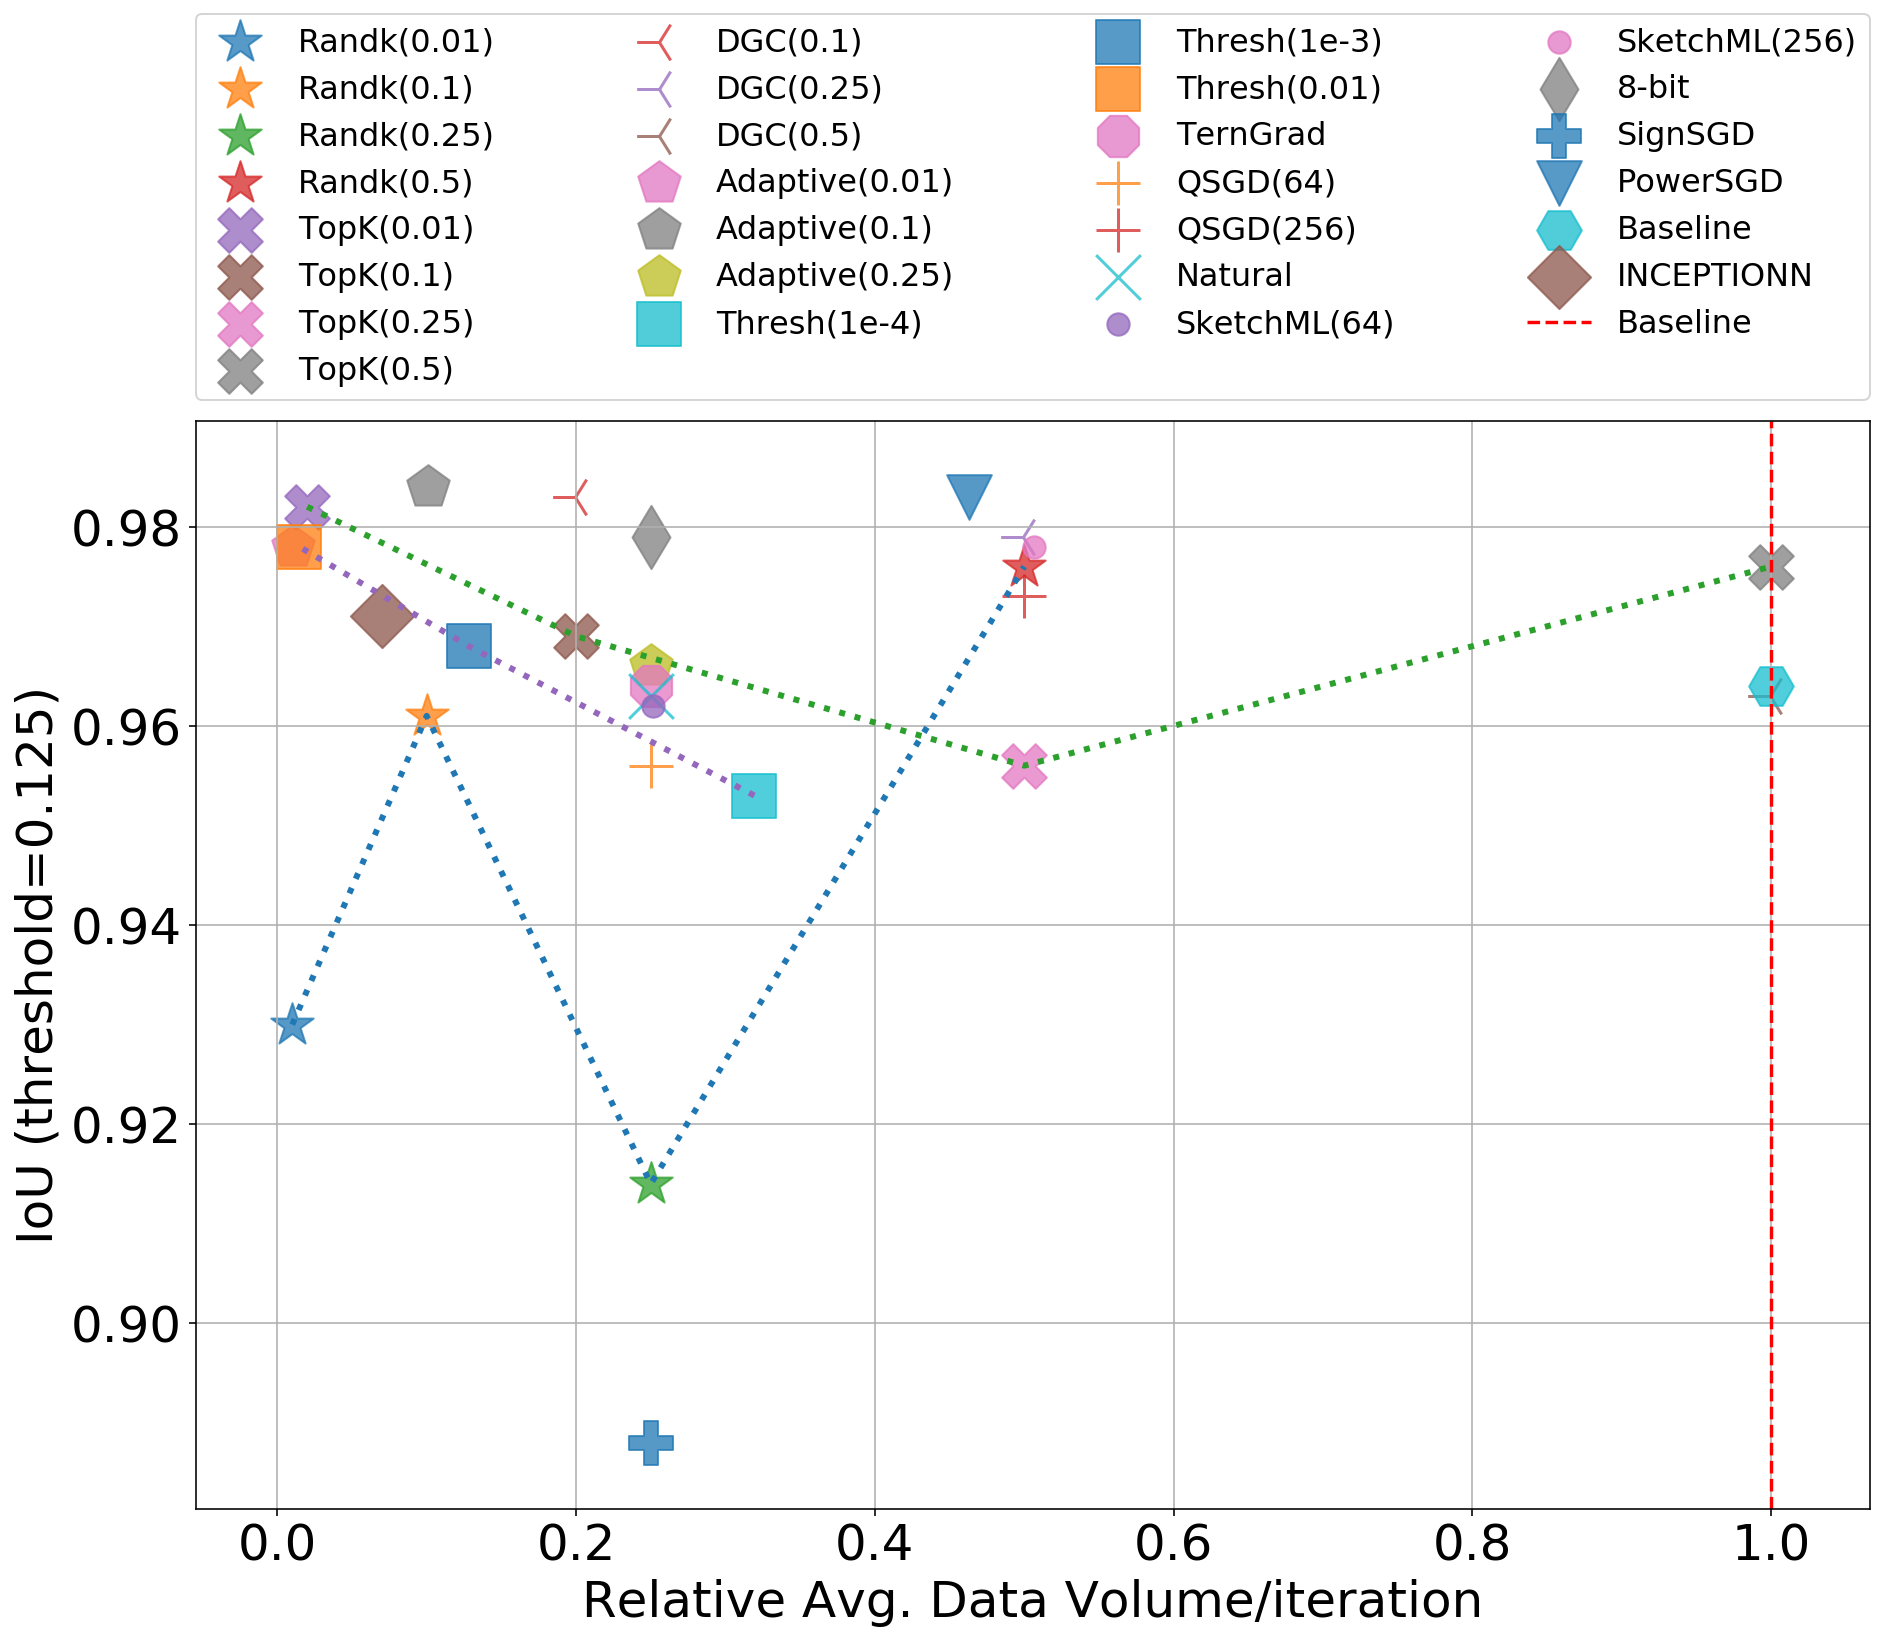

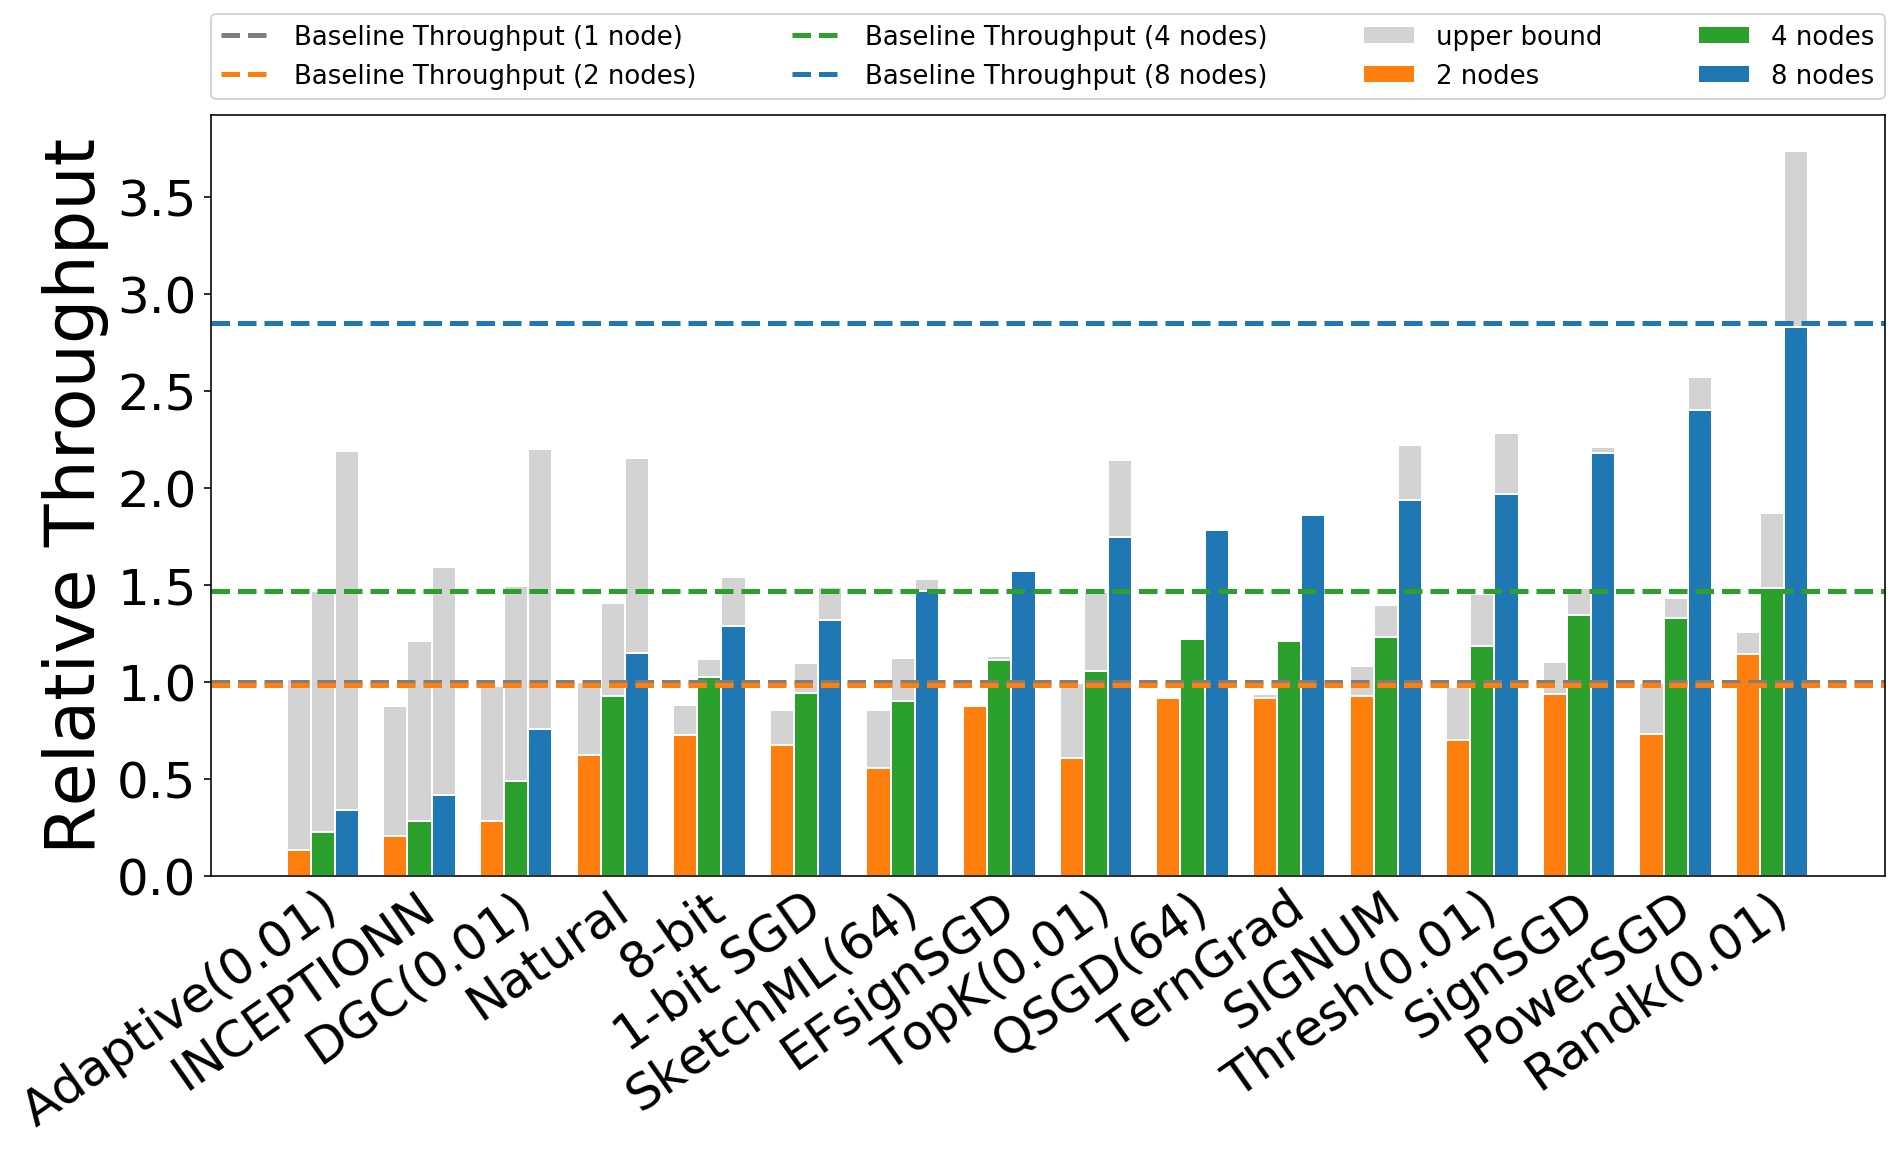

In [43]:
make_plot(new_df, 'throughput', 'IoU_Metrics/iou_score_ths_0.125',save_fig=False)
make_plot(new_df, 'data_volume', 'IoU_Metrics/iou_score_ths_0.125',save_fig=False)
scaling_plot(dt,ub,MODEL,'throughput', save_fig=False)

##  Cifar10 DAWNbench Pytorch

In [44]:
project = "cifar10-classification-pytorch"
MODEL='Resnet9'
d = D[project]
d.rename
d.shape,d.columns

((118, 23),
 Index(['name', 'mode', 'backend', 'method', 'ratio', 'memory', 'workers',
        'dataset', 'env', 'gpu_type', 'bw', 'comm_method', 'model', 'optimizer',
        'id', 'run_no', 'job_id', 'epoch', 'top_1_accuracy', 'runtime',
        'throughput', 'loss', 'RDMA'],
       dtype='object'))

In [45]:
row_filter(d,{'RDMA':'true','bw':'25g'}).shape, row_filter(d,{'RDMA':'false','bw':'25g'}).shape

((39, 23), (39, 23))

In [46]:
dt_rdma = row_filter(d,{'RDMA':'true','bw':'25g','workers':8})
dt_tcp = row_filter(d,{'RDMA':'false','bw':'25g','workers':8})

dt3 = dt_rdma.append(dt_tcp)

throuput_sorter = dt3[dt3['RDMA']=='true'].sort_values(by=['throughput']).method
dt3.method = dt3.method.astype("category")
dt3.method.cat.set_categories(throuput_sorter, inplace=True)
dt3=dt3.sort_values(by=['RDMA','method'])

In [47]:
d.sort_values(by=['mode','RDMA','bw','workers','name',]).to_excel(f"{project+'-'+MODEL}.xls")

dt3: (26, 23)
dt3 remove none: (24, 23)


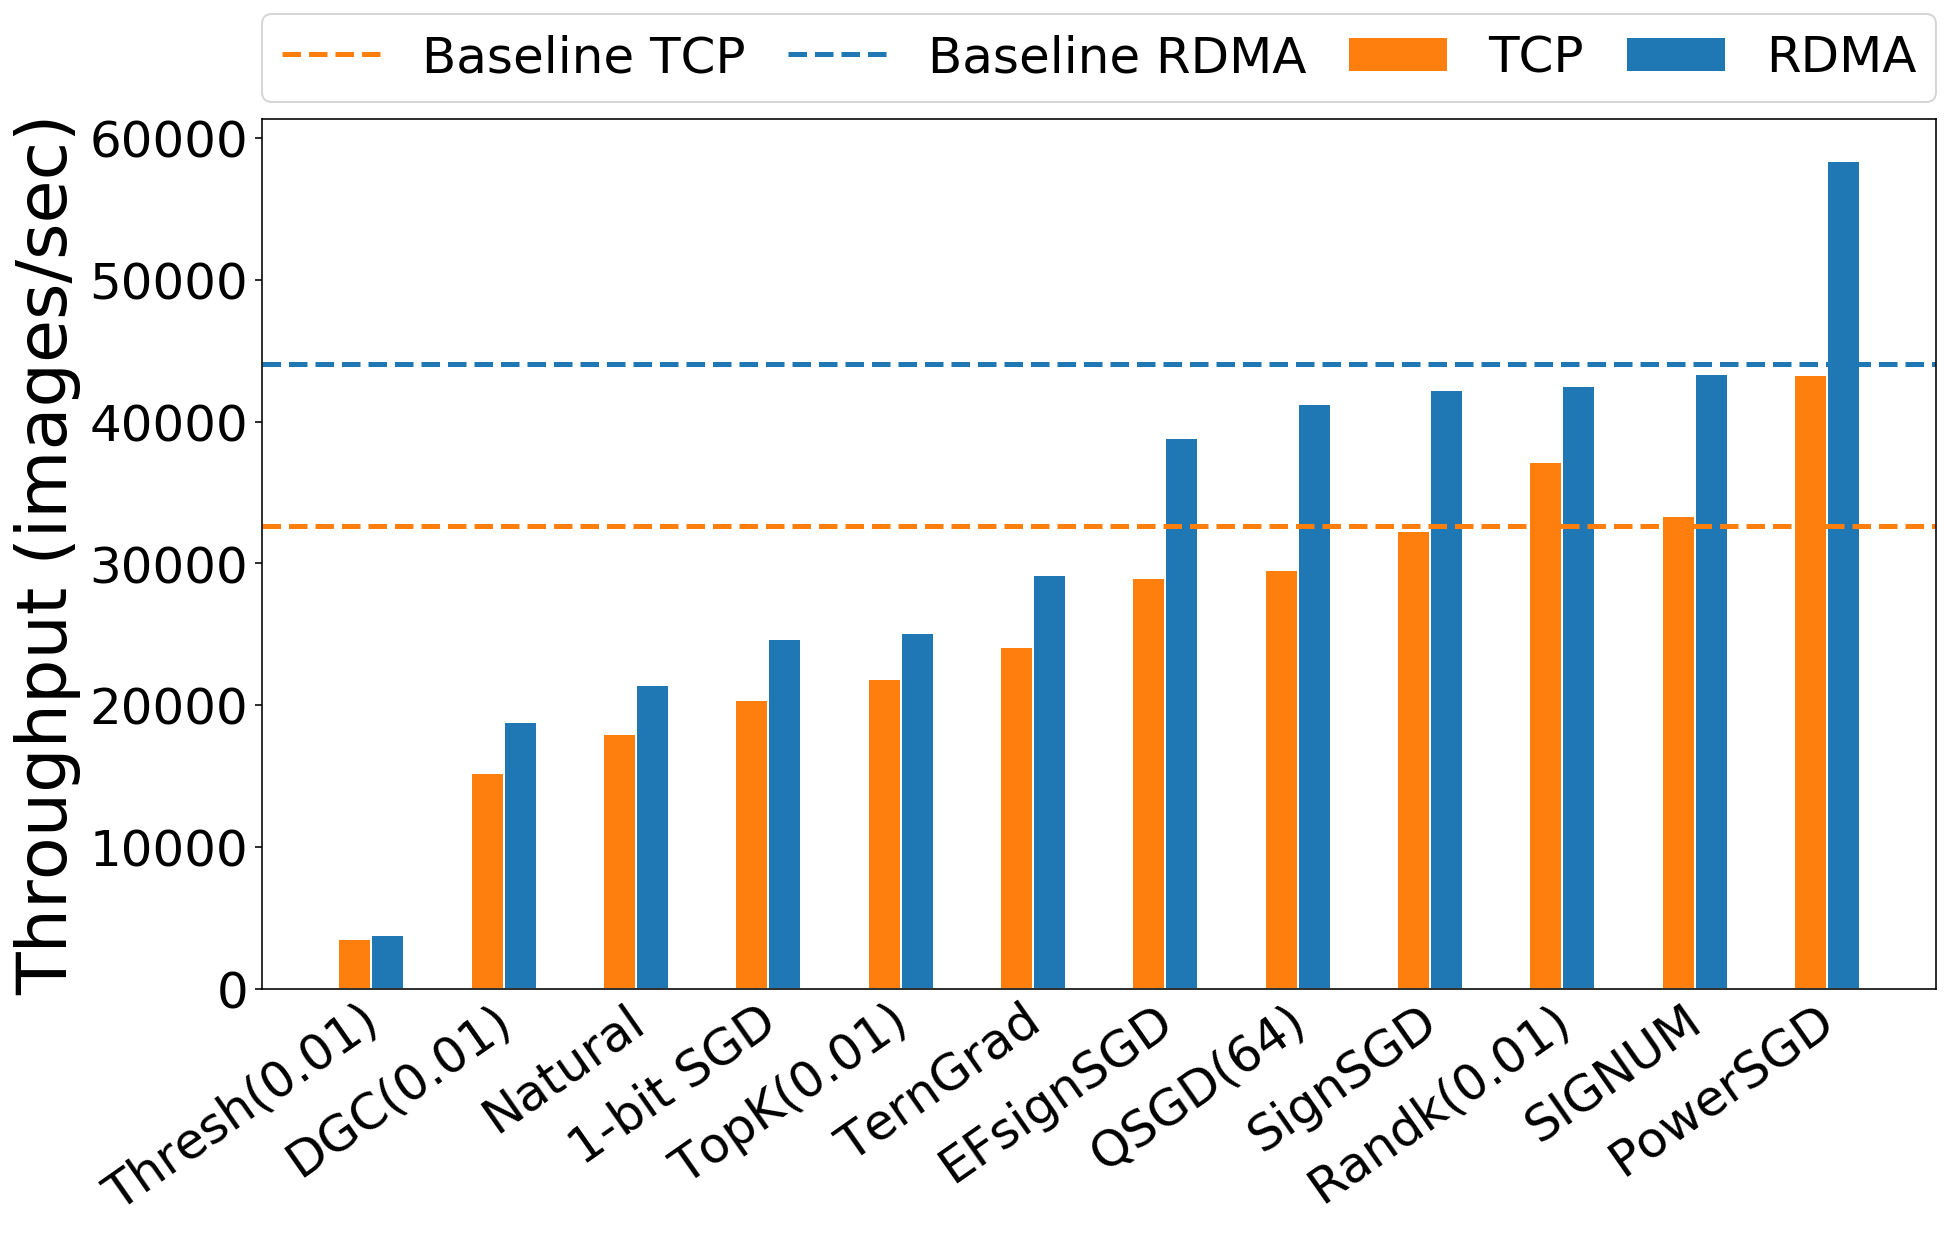

In [48]:
def scaling_plot_rdma(dt, y_axis,save_fig=False,bw='10g',filename_suffix=''):
    global show_legend
    baseline = 1.0
    save_fig = True
    fig, ax = plt.subplots(figsize=(15, 8))
    legend_dict = {'throughput':'Throughput', 'runtime':'Runtime', 'data_volume': 'Data Volume'}
    color_dict = {1:'tab:gray', 2:'tab:orange', 4:'tab:green', 8:'tab:blue','false':'tab:orange', 'true':'tab:green'}
    
    
    dt3 = dt
    
    throuput_sorter = dt3[dt3['RDMA']=='true'].sort_values(by=['throughput']).method
    dt3.method = dt3.method.astype("category")
    dt3.method.cat.set_categories(throuput_sorter, inplace=True)
    dt3=dt3.sort_values(by=['RDMA','method'])
    
    
    print("dt3:",dt3.shape)
    # custom for each model


    
    for index, row in dt3.iterrows():
        if row['method'] == 'none':
            label = 'Baseline RDMA' if row['RDMA']=='true' else 'Baseline TCP'
            color = 'tab:blue' if row['RDMA']=='true' else 'tab:orange'
            none_tput = row[y_axis]
            ax.axhline(y=none_tput / baseline, linestyle='--', color=color, label= label, linewidth=2.5)

    none_index = [index for index, row in dt3.iterrows() if row['method']=='none']
    dt3.drop(none_index, inplace=True)
    print("dt3 remove none:",dt3.shape)
    # set width of bar
    barWidth = 0.25

    # set height of bar
    i = int(dt3.shape[0] / 2)
    bars1 = dt3[0:i][y_axis] / baseline
    bars2 = dt3[i:2*i][y_axis] / baseline
#     bars3 = dt3[2*i:3*i][y_axis] / baseline
    #bars4 = dt3[3*i:4*i][y_axis] / baseline
    
    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = r1 + barWidth
#     r3 = r2 + barWidth
    #r4 = r3 + barWidth

#     if y_axis == 'throughput' and ub is not None:
#         none_index = [index for index, row in ub.iterrows() if row['method']=='none']
#         ub.drop(none_index, inplace=True)
#         model = ub['model'] == MODEL
#         bw = ub['bw'] == '10g'
#         two_node = ub['workers'] == 2
#         not_one_node = ub['workers'] != 1
#         ub2 = ub[model & bw]
#         ub_2node = ub2[two_node]
#         print("ub_2node",ub_2node.shape,)
#         unique_name = list(ub_2node['name'].unique())
#         num_methods = len(unique_name)
#         ub3=ub2[ub2['name'].isin(unique_name)].sort_values(by=['workers','name'])
#         print("ub_3node",ub3.shape)
#         ub3.method = ub3.method.astype("category")
#         ub3.method.cat.set_categories(throuput_sorter, inplace=True)
#         ub3=ub3.sort_values(by=['workers','method'])
#         bars1_ub = ub3[0:i][y_axis] / baseline
#         bars2_ub = ub3[i:2*i][y_axis] / baseline
#         bars3_ub = ub3[2*i:3*i][y_axis] / baseline
#         ax.bar(r1, bars1_ub, color='lightgrey', width=barWidth, edgecolor='white')
#         ax.bar(r2, bars2_ub, color='lightgrey', width=barWidth, edgecolor='white')
#         ax.bar(r3, bars3_ub, color='lightgrey', width=barWidth, edgecolor='white', label='upper bound')
    # Make the plot
    #ax.bar(r4, bars1, color=color_dict[1], width=barWidth, edgecolor='white', label='1 node')
    ax.bar(r1, bars1, color='tab:orange', width=barWidth, edgecolor='white', label='TCP')
    ax.bar(r2, bars2, color='tab:blue', width=barWidth, edgecolor='white', label='RDMA')
#     ax.bar(r3, bars3, color=color_dict[8], width=barWidth, edgecolor='white', label='8 node')

    # Add xticks on the middle of the group bars
    #plt.ylabel(MODEL+' '+y_axis, fontweight='bold',fontsize=12)
    #plt.xticks(r2, dt3[0:16]['name'],rotation=-80,fontweight='bold',fontsize=12)
    ax.set_ylabel('Throughput (images/sec)',fontsize=35)
    ax.set_xticks(r2)
    ax.set_xticklabels([method_dict[x] for x in dt3[0:i]['name']], rotation=35, ha='right')
    ax.tick_params(axis="x",direction="in",bottom=False,top=False,labelbottom=True, labeltop=False,)    
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25)

    # Create legend & Show graphic

    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                   ncol=4, mode="expand", borderaxespad=0, fontsize=25)
    fig.savefig(f"Pytorch-Resnet9-RDMA-TCP-throughput-bar_chart{filename_suffix}.pdf", bbox_inches = 'tight')
    
scaling_plot_rdma(dt_rdma.append(dt_tcp),'throughput')

## END